## **Problem Statement**
In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.


**Buisness Objective:-**You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants. Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.


**Our Objective:-**In this project, we will analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.

### **Data Dictionary for Credit Card Transactions**
    index - Unique Identifier for each row
    transdatetrans_time - Transaction DateTime
    cc_num - Credit Card Number of Customer
    merchant - Merchant Name
    category - Category of Merchant
    amt - Amount of Transaction
    first - First Name of Credit Card Holder
    last - Last Name of Credit Card Holder
    gender - Gender of Credit Card Holder
    street - Street Address of Credit Card Holder
    city - City of Credit Card Holder
    state - State of Credit Card Holder
    zip - Zip of Credit Card Holder
    lat - Latitude Location of Credit Card Holder
    long - Longitude Location of Credit Card Holder
    city_pop - Credit Card Holder's City Population
    job - Job of Credit Card Holder
    dob - Date of Birth of Credit Card Holder
    trans_num - Transaction Number
    unix_time - UNIX Time of transaction
    merch_lat - Latitude Location of Merchant
    merch_long - Longitude Location of Merchant
    is_fraud - Fraud Flag <--- Target Class

## **Importing necessary libraries**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,f1_score, classification_report
from scipy.stats import skew,norm

import imblearn
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Data Reading and understanding**

In [26]:
# reading training set
train_df= pd.read_csv('/kaggle/input/creditcard-fraud-ds/fraudTrain.csv',index_col=0)
train_df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [27]:
# reading testing set
test_df= pd.read_csv('/kaggle/input/creditcard-fraud-ds/fraudTest.csv',index_col=0)
test_df.head()

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city  ...      lat  \
0   Elliott      M            351 Darlene Green    Columbia  ...  33.9659   
1  Williams      F             3638 Marsh Union     Altonah  ...  40.3207   
2     Lopez      F         9333 Valentine Point    Bellmore  ...  40.6729   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville  ...  28.5697   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth  ...  44.2529   

       long  city_pop                     job         dob  \
0  -80.9355    333497     Mechanical engineer  1968-03-19   
1 -110.4360       302  Sales professional, IT  1990-01-17   
2  -73.5365     34496       Librarian, public  1970-10-21   
3  -80.8191     54767            Set designer  1987-07-25   
4  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [28]:
# merge both datasets
df = pd.concat([train_df,test_df],axis=0)

In [29]:
# checking the dimension of the dataset
df.shape

(1852394, 22)

In [30]:
#checking data types of each feature and its non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [31]:
# checking null value count
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [32]:
# checking duplicates in the data
df.duplicated().sum()

0

In [33]:
# checking summary statistics of numerical features
df.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [34]:
# number format change from scientific notation to standard notation
pd.options.display.float_format = '{:.5f}'.format

In [35]:
df.describe()

cc_num           amt           zip           lat  \
count             1852394.00000 1852394.00000 1852394.00000 1852394.00000   
mean   417386038393710400.00000      70.06357   48813.25819      38.53931   
std   1309115265318734848.00000     159.25397   26881.84597       5.07147   
min           60416207185.00000       1.00000    1257.00000      20.02710   
25%       180042946491150.00000       9.64000   26237.00000      34.66890   
50%      3521417320836166.00000      47.45000   48174.00000      39.35430   
75%      4642255475285942.00000      83.10000   72042.00000      41.94040   
max   4992346398065154048.00000   28948.90000   99921.00000      66.69330   

               long      city_pop        unix_time     merch_lat  \
count 1852394.00000 1852394.00000    1852394.00000 1852394.00000   
mean      -90.22783   88643.67451 1358674218.83436      38.53898   
std        13.74789  301487.61834   18195081.38756       5.10560   
min      -165.67230      23.00000 1325376018.00000      19.02742   
25%       -96.79800     741.00000 1343016823.75000      34.74012   
50%       -87.47690    2443.00000 1357089331.00000      39.36890   
75%       -80.15800   20328.00000 1374581485.25000      41.95626   
max       -67.95030 2906700.00000 1388534374.00000      67.51027   

         merch_long      is_fraud  
count 1852394.00000 1852394.00000  
mean      -90.22794       0.00521  
std        13.75969       0.07199  
min      -166.67157       0.00000  
25%       -96.89944       0.00000  
50%       -87.44069       0.00000  
75%       -80.24511       0.00000  
max       -66.95090       1.00000

In [36]:
# checking summary statistics of categorical features
df.describe(include='object')

trans_date_trans_time           merchant       category        first  \
count                1852394            1852394        1852394      1852394   
unique               1819551                693             14          355   
top      2019-04-22 16:02:01  fraud_Kilback LLC  gas_transport  Christopher   
freq                       4               6262         188029        38112   

           last   gender           street        city    state  \
count   1852394  1852394          1852394     1852394  1852394   
unique      486        2              999         906       51   
top       Smith        F  444 Robert Mews  Birmingham       TX   
freq      40940  1014749             4392        8040   135269   

                      job         dob                         trans_num  
count             1852394     1852394                           1852394  
unique                497         984                           1852394  
top     Film/video editor  1977-03-23  0b242abb623afc578575680df30655b9  
freq                13898        8044                                 1

#### **Insight**

- **There are 22 features and 1.8 millions records in the data set**

- **dataset does not have any null and duplicate value**

- **there is object data type for date columns that should casted to datetime format**

- **It seems transaction amount and city population has outliers**

## **Data Cleaning**

### **Dropping Irrelavant Features**

In [37]:
# dropping following irrelevant features that wont help for predicting fraudulent transactions:
# discrete features such as transaction number,
# credit card holder demographic details such as name, zip code, street name,
# other features such as unix time,and merchants where the credit card swiped
drop_col = ['first','last','street','zip','trans_num','unix_time','merchant']
df1 = df.drop(drop_col,axis=1)
df1.shape

(1852394, 15)

### **Renaming Features**
##### rename feature to easy understanding

In [38]:
df1.rename(columns={'category':'spending_category','amt':'transaction_amount'},inplace=True)
df1.head()

trans_date_trans_time            cc_num spending_category  \
0   2019-01-01 00:00:18  2703186189652095          misc_net   
1   2019-01-01 00:00:44      630423337322       grocery_pos   
2   2019-01-01 00:00:51    38859492057661     entertainment   
3   2019-01-01 00:01:16  3534093764340240     gas_transport   
4   2019-01-01 00:03:06   375534208663984          misc_pos   

   transaction_amount gender            city state      lat       long  \
0             4.97000      F  Moravian Falls    NC 36.07880  -81.17810   
1           107.23000      F          Orient    WA 48.88780 -118.21050   
2           220.11000      M      Malad City    ID 42.18080 -112.26200   
3            45.00000      M         Boulder    MT 46.23060 -112.11380   
4            41.96000      M        Doe Hill    VA 38.42070  -79.46290   

   city_pop                                job         dob  merch_lat  \
0      3495          Psychologist, counselling  1988-03-09   36.01129   
1       149  Special educational needs teacher  1978-06-21   49.15905   
2      4154        Nature conservation officer  1962-01-19   43.15070   
3      1939                    Patent attorney  1967-01-12   47.03433   
4        99     Dance movement psychotherapist  1986-03-28   38.67500   

   merch_long  is_fraud  
0   -82.04832         0  
1  -118.18646         0  
2  -112.15448         0  
3  -112.56107         0  
4   -78.63246         0

### **Data Type Change**

In [39]:
df1.dtypes

trans_date_trans_time     object
cc_num                     int64
spending_category         object
transaction_amount       float64
gender                    object
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [40]:
# object data type to datetime
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
df1['dob'] = pd.to_datetime(df1['dob'])
df1.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
spending_category                object
transaction_amount              float64
gender                           object
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

## **Feature Engineering**

In [41]:
# deriving new time intelligence features from the data
df1['TxnDayOfWeek'] = df1['trans_date_trans_time'].dt.day_name()
df1['TxnYear'] = df1['trans_date_trans_time'].dt.year
df1['TxnMonth'] = df1['trans_date_trans_time'].dt.strftime('%B')
df1['DOBYear'] = df1['dob'].dt.year
df1.head()

trans_date_trans_time            cc_num spending_category  \
0   2019-01-01 00:00:18  2703186189652095          misc_net   
1   2019-01-01 00:00:44      630423337322       grocery_pos   
2   2019-01-01 00:00:51    38859492057661     entertainment   
3   2019-01-01 00:01:16  3534093764340240     gas_transport   
4   2019-01-01 00:03:06   375534208663984          misc_pos   

   transaction_amount gender            city state      lat       long  \
0             4.97000      F  Moravian Falls    NC 36.07880  -81.17810   
1           107.23000      F          Orient    WA 48.88780 -118.21050   
2           220.11000      M      Malad City    ID 42.18080 -112.26200   
3            45.00000      M         Boulder    MT 46.23060 -112.11380   
4            41.96000      M        Doe Hill    VA 38.42070  -79.46290   

   city_pop                                job        dob  merch_lat  \
0      3495          Psychologist, counselling 1988-03-09   36.01129   
1       149  Special educational needs teacher 1978-06-21   49.15905   
2      4154        Nature conservation officer 1962-01-19   43.15070   
3      1939                    Patent attorney 1967-01-12   47.03433   
4        99     Dance movement psychotherapist 1986-03-28   38.67500   

   merch_long  is_fraud TxnDayOfWeek  TxnYear TxnMonth  DOBYear  
0   -82.04832         0      Tuesday     2019  January     1988  
1  -118.18646         0      Tuesday     2019  January     1978  
2  -112.15448         0      Tuesday     2019  January     1962  
3  -112.56107         0      Tuesday     2019  January     1967  
4   -78.63246         0      Tuesday     2019  January     1986

In [42]:
# function to create categories of time
def time_category(timestamp):
  hour = timestamp.hour
  if 6 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 20:
    return 'Evening'
  elif 20 <= hour < 24:
    return 'Night'
  else:
    return 'Midnight'

df1['time_category'] = df1['trans_date_trans_time'].apply(time_category)

In [43]:
# deriving customer age
df1['customer_age'] = df1['TxnYear'] - df1['DOBYear']

# grouping the customers into age buckets
df1['cust_age_group'] = pd.cut(x=df1['customer_age'],bins=[0,17,30,60,100],
                                    labels=['Teenage','Young Adults','Middle Aged Adults','Old Adults'])

In [44]:
# calculate distance between customer base and merchant where card is swiped using Haversine formula

from math import radians, sin, cos, sqrt, atan2
def calculate_distance(lat1,lon1,lat2,lon2):
  R = 6371
  # Convert latitude and longitude to radians
  lat1_rad, lon1_rad = radians(lat1), radians(lon1)
  lat2_rad, lon2_rad = radians(lat2), radians(lon2)

  # Calculate the differences in latitude and longitude
  dlat = lat2_rad - lat1_rad
  dlon = lon2_rad - lon1_rad

  # Apply the Haversine formula
  a = sin(dlat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2) ** 2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  # Calculate the distance
  distance = R * c

  return distance

df1['distance(km)'] = df1.apply(lambda row: calculate_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [45]:
# binning the distance into categories
def distance_category(distance):
  if distance > 0 and distance <= 25:
    return '0-25km'
  elif distance > 25 and distance <= 50:
    return '26-50km'
  elif distance > 50 and distance <= 75:
    return '51-75km'
  elif distance > 75 and distance <= 100:
    return '76-100km'
  else:
    return '>100km'
df1['distance_category'] = df1['distance(km)'].apply(distance_category)

In [46]:
# the dataset belongs to USA so we can group states into regions to reduce dimensions of the data
#there are some official government regions, according to the U.S. Census Bureau
#they are four regions - Northeast, South, Midwest and West`.
def regions(x):
    if x['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if x['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if x['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

df1['usa_regions'] = df1.apply(lambda x: regions(x), axis=1)

##### Deriving Historical variables such as `24 Hours Orders by Customers`, `30 Day Transactions by Customers`,`30 Day Orders Amt Avg by Customers`,`24 Hours Orders Amt Avg by Customers`, `

##### calculating the rolling moving avearge of previous data and then calculatig the avearge of the amt, amt_by_moving_avearge will help in deciding the bar , where after that fraud, alarm will be sent to the customers

In [47]:
df_hist = df1.copy()
df_hist.index = df_hist['trans_date_trans_time']
df_hist = df_hist.rename_axis(index={'trans_date_trans_time': 'time_index'})
df_hist = df_hist.sort_index()
df_hist.head()

trans_date_trans_time            cc_num spending_category  \
time_index                                                                      
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095          misc_net   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322       grocery_pos   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661     entertainment   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240     gas_transport   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984          misc_pos   

                     transaction_amount gender            city state      lat  \
time_index                                                                      
2019-01-01 00:00:18             4.97000      F  Moravian Falls    NC 36.07880   
2019-01-01 00:00:44           107.23000      F          Orient    WA 48.88780   
2019-01-01 00:00:51           220.11000      M      Malad City    ID 42.18080   
2019-01-01 00:01:16            45.00000      M         Boulder    MT 46.23060   
2019-01-01 00:03:06            41.96000      M        Doe Hill    VA 38.42070   

                          long  city_pop  ... TxnDayOfWeek TxnYear  TxnMonth  \
time_index                                ...                                  
2019-01-01 00:00:18  -81.17810      3495  ...      Tuesday    2019   January   
2019-01-01 00:00:44 -118.21050       149  ...      Tuesday    2019   January   
2019-01-01 00:00:51 -112.26200      4154  ...      Tuesday    2019   January   
2019-01-01 00:01:16 -112.11380      1939  ...      Tuesday    2019   January   
2019-01-01 00:03:06  -79.46290        99  ...      Tuesday    2019   January   

                     DOBYear  time_category customer_age      cust_age_group  \
time_index                                                                     
2019-01-01 00:00:18     1988       Midnight           31  Middle Aged Adults   
2019-01-01 00:00:44     1978       Midnight           41  Middle Aged Adults   
2019-01-01 00:00:51     1962       Midnight           57  Middle Aged Adults   
2019-01-01 00:01:16     1967       Midnight           52  Middle Aged Adults   
2019-01-01 00:03:06     1986       Midnight           33  Middle Aged Adults   

                    distance(km)  distance_category usa_regions  
time_index                                                       
2019-01-01 00:00:18     78.59757           76-100km       South  
2019-01-01 00:00:44     30.21218            26-50km        West  
2019-01-01 00:00:51    108.20608             >100km        West  
2019-01-01 00:01:16     95.67323           76-100km        West  
2019-01-01 00:03:06     77.55674           76-100km       South  

[5 rows x 25 columns]

In [48]:
# 30 Day Transactions by Customers

df_hist['val_for_agg'] = 1

df_hist_trans_30d = \
    df_hist \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

In [49]:
# 24 Hours Orders by Customers
df_hist_orders_24h = \
    df_hist \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()

In [50]:
# 30 Day Orders Amt Avg by Customers

df_hist_trans_amt_avg_30d = \
    df_hist \
    .groupby(['cc_num'])['transaction_amount']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()

In [51]:
# 24 Hours Orders Amt Avg by Customers
df_hist_trans_amt_avg_24h = \
    df_hist \
    .groupby(['cc_num'])['transaction_amount']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()

In [52]:
# add all historical derived features to the dataset
df1=pd.merge(df1, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
df1=pd.merge(df1, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df1=pd.merge(df1, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
df1=pd.merge(df1, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
df1.head()

trans_date_trans_time            cc_num spending_category  \
0   2019-01-01 00:00:18  2703186189652095          misc_net   
1   2019-01-01 00:00:44      630423337322       grocery_pos   
2   2019-01-01 00:00:51    38859492057661     entertainment   
3   2019-01-01 00:01:16  3534093764340240     gas_transport   
4   2019-01-01 00:03:06   375534208663984          misc_pos   

   transaction_amount gender            city state      lat       long  \
0             4.97000      F  Moravian Falls    NC 36.07880  -81.17810   
1           107.23000      F          Orient    WA 48.88780 -118.21050   
2           220.11000      M      Malad City    ID 42.18080 -112.26200   
3            45.00000      M         Boulder    MT 46.23060 -112.11380   
4            41.96000      M        Doe Hill    VA 38.42070  -79.46290   

   city_pop  ... time_category customer_age      cust_age_group  distance(km)  \
0      3495  ...      Midnight           31  Middle Aged Adults      78.59757   
1       149  ...      Midnight           41  Middle Aged Adults      30.21218   
2      4154  ...      Midnight           57  Middle Aged Adults     108.20608   
3      1939  ...      Midnight           52  Middle Aged Adults      95.67323   
4        99  ...      Midnight           33  Middle Aged Adults      77.55674   

   distance_category usa_regions  hist_trans_30d hist_trans_24h  \
0           76-100km       South       109.00000        6.00000   
1            26-50km        West        53.00000        1.00000   
2             >100km        West         8.00000        5.00000   
3           76-100km        West       181.00000        5.00000   
4           76-100km       South       218.00000        6.00000   

   hist_trans_avg_amt_30d hist_trans_avg_amt_24h  
0                70.97459               95.64167  
1                50.88396               12.11000  
2               377.92500              445.77800  
3                59.30740               42.45400  
4                67.14899               78.12000  

[5 rows x 29 columns]

In [53]:
# drop redundant and unnecessary features after feature engineering
df2 = df1.drop(['trans_date_trans_time','cc_num','lat','long','dob','merch_lat','merch_long','DOBYear','customer_age','state'],axis=1)
df2.head()

spending_category  transaction_amount gender            city  city_pop  \
0          misc_net             4.97000      F  Moravian Falls      3495   
1       grocery_pos           107.23000      F          Orient       149   
2     entertainment           220.11000      M      Malad City      4154   
3     gas_transport            45.00000      M         Boulder      1939   
4          misc_pos            41.96000      M        Doe Hill        99   

                                 job  is_fraud TxnDayOfWeek  TxnYear TxnMonth  \
0          Psychologist, counselling         0      Tuesday     2019  January   
1  Special educational needs teacher         0      Tuesday     2019  January   
2        Nature conservation officer         0      Tuesday     2019  January   
3                    Patent attorney         0      Tuesday     2019  January   
4     Dance movement psychotherapist         0      Tuesday     2019  January   

  time_category      cust_age_group  distance(km) distance_category  \
0      Midnight  Middle Aged Adults      78.59757          76-100km   
1      Midnight  Middle Aged Adults      30.21218           26-50km   
2      Midnight  Middle Aged Adults     108.20608            >100km   
3      Midnight  Middle Aged Adults      95.67323          76-100km   
4      Midnight  Middle Aged Adults      77.55674          76-100km   

  usa_regions  hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
0       South       109.00000         6.00000                70.97459   
1        West        53.00000         1.00000                50.88396   
2        West         8.00000         5.00000               377.92500   
3        West       181.00000         5.00000                59.30740   
4       South       218.00000         6.00000                67.14899   

   hist_trans_avg_amt_24h  
0                95.64167  
1                12.11000  
2               445.77800  
3                42.45400  
4                78.12000

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   spending_category       object  
 1   transaction_amount      float64 
 2   gender                  object  
 3   city                    object  
 4   city_pop                int64   
 5   job                     object  
 6   is_fraud                int64   
 7   TxnDayOfWeek            object  
 8   TxnYear                 int64   
 9   TxnMonth                object  
 10  time_category           object  
 11  cust_age_group          category
 12  distance(km)            float64 
 13  distance_category       object  
 14  usa_regions             object  
 15  hist_trans_30d          float64 
 16  hist_trans_24h          float64 
 17  hist_trans_avg_amt_30d  float64 
 18  hist_trans_avg_amt_24h  float64 
dtypes: category(1), float64(6), int64(3), object(9)
memory usage: 270.3+ MB


#### **Change all object datatypes to category datatypes to save memory usage and speed up data operation**

In [55]:
for i in df2.select_dtypes(include='object').columns:
  df2[i] = df2[i].astype('category')

# change datatype for 'TxnYear' to category
df2['TxnYear'] = df2['TxnYear'].astype('category')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   spending_category       category
 1   transaction_amount      float64 
 2   gender                  category
 3   city                    category
 4   city_pop                int64   
 5   job                     category
 6   is_fraud                int64   
 7   TxnDayOfWeek            category
 8   TxnYear                 category
 9   TxnMonth                category
 10  time_category           category
 11  cust_age_group          category
 12  distance(km)            float64 
 13  distance_category       category
 14  usa_regions             category
 15  hist_trans_30d          float64 
 16  hist_trans_24h          float64 
 17  hist_trans_avg_amt_30d  float64 
 18  hist_trans_avg_amt_24h  float64 
dtypes: category(11), float64(6), int64(2)
memory usage: 150.2 MB


### ****The memory usage reduced****

## **Exploratory Data Analysis**

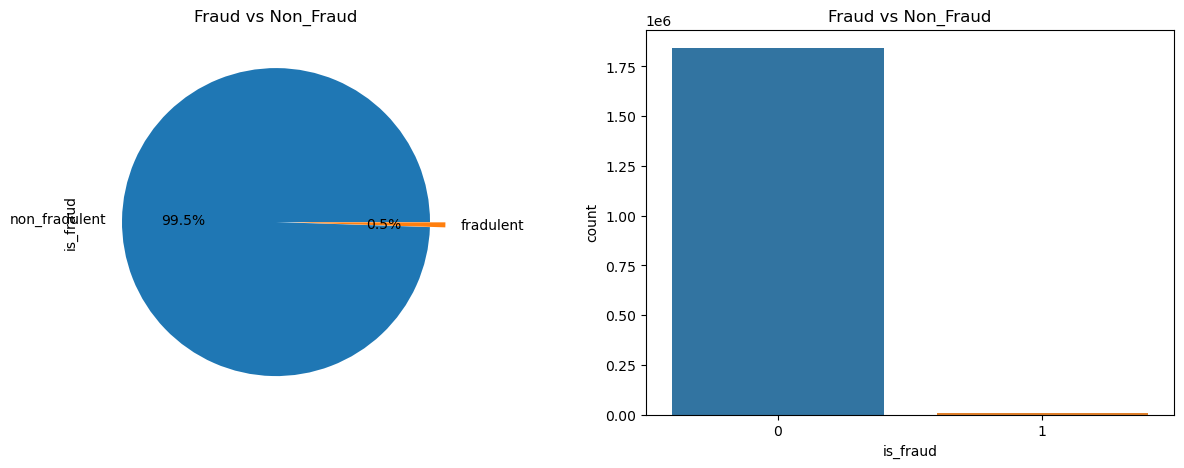

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
explode = (0,0.1)
df2.is_fraud.value_counts().plot.pie(labels = ["non_fradulent","fradulent"],autopct = "%1.1f%%",explode = explode)
plt.title("Fraud vs Non_Fraud",loc="center")
plt.subplot(1,2,2)
sns.countplot(x=df2.is_fraud)
plt.title("Fraud vs Non_Fraud",loc="center")
plt.show()

In [33]:
# imbalance ratio - majority class vs minority class
IR = round(len(df2[df2.is_fraud == 0]) / len(df2[df2.is_fraud == 1]),2)
IR

190.94

#### **It is highly imbalanced data**

### **Univariate Analysis**

#### **Categorical Variables**

In [34]:
cat_var = df2.select_dtypes(include=['category']).columns
print(cat_var)

Index(['spending_category', 'gender', 'city', 'job', 'TxnDayOfWeek', 'TxnYear',
       'TxnMonth', 'time_category', 'cust_age_group', 'distance_category',
       'usa_regions'],
      dtype='object')


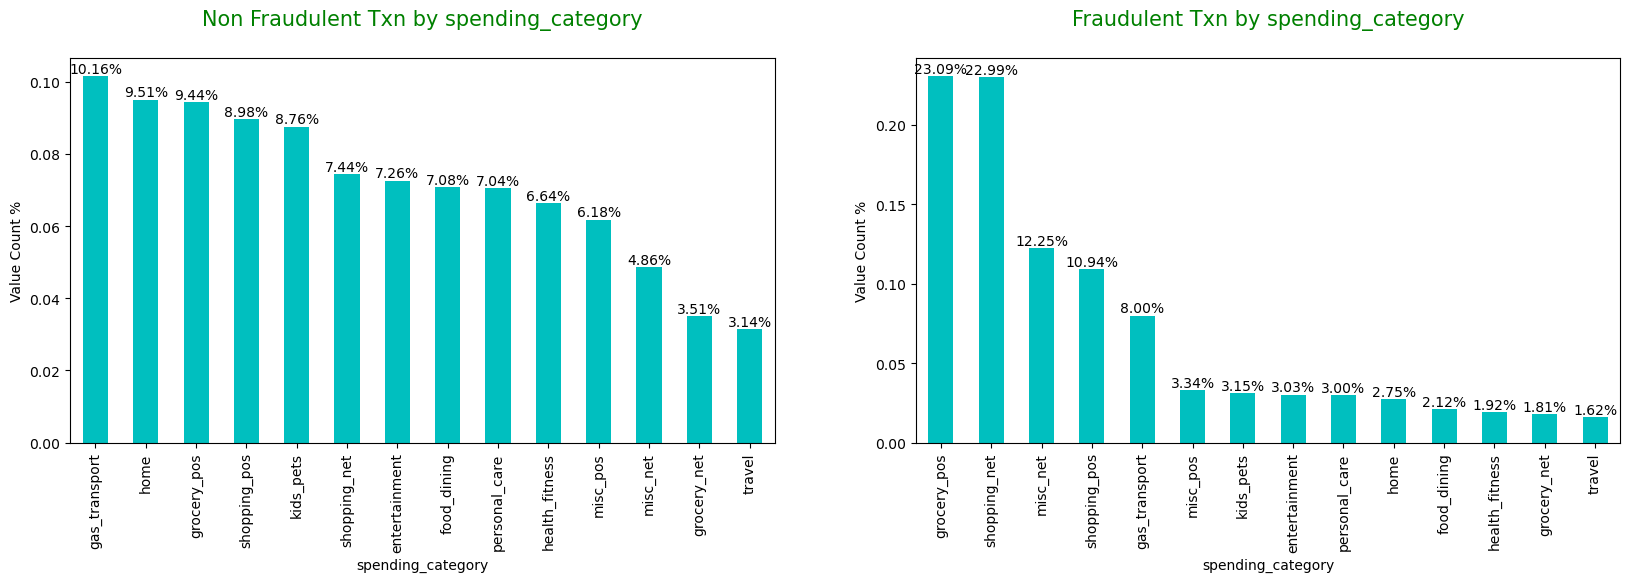

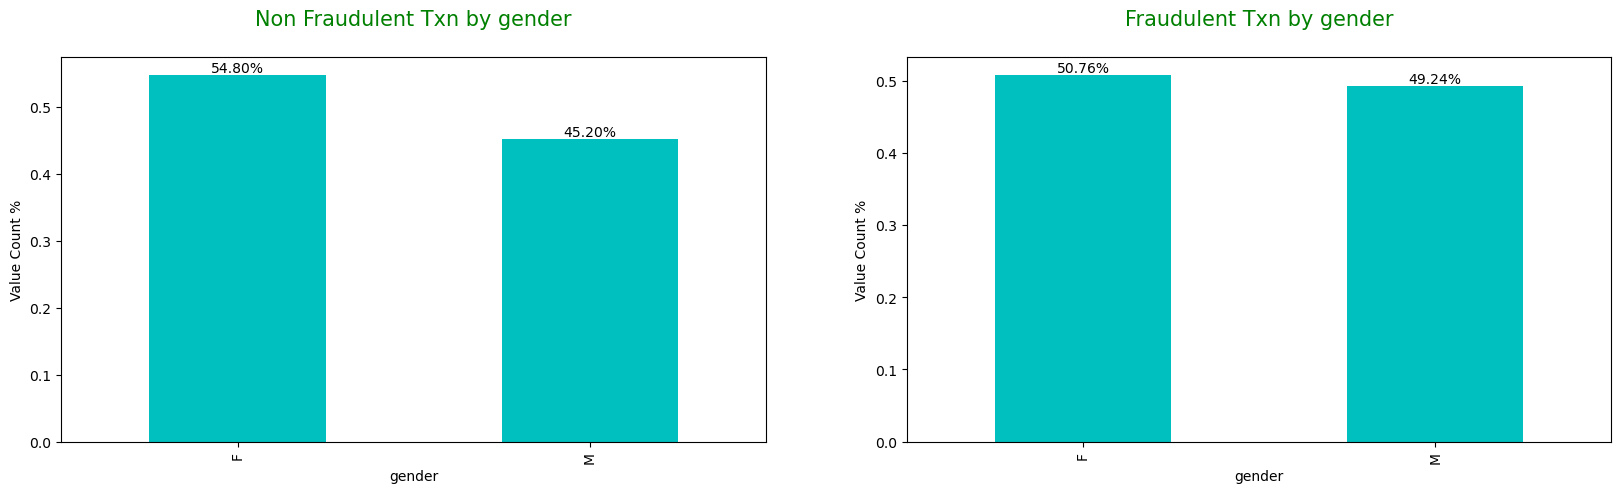

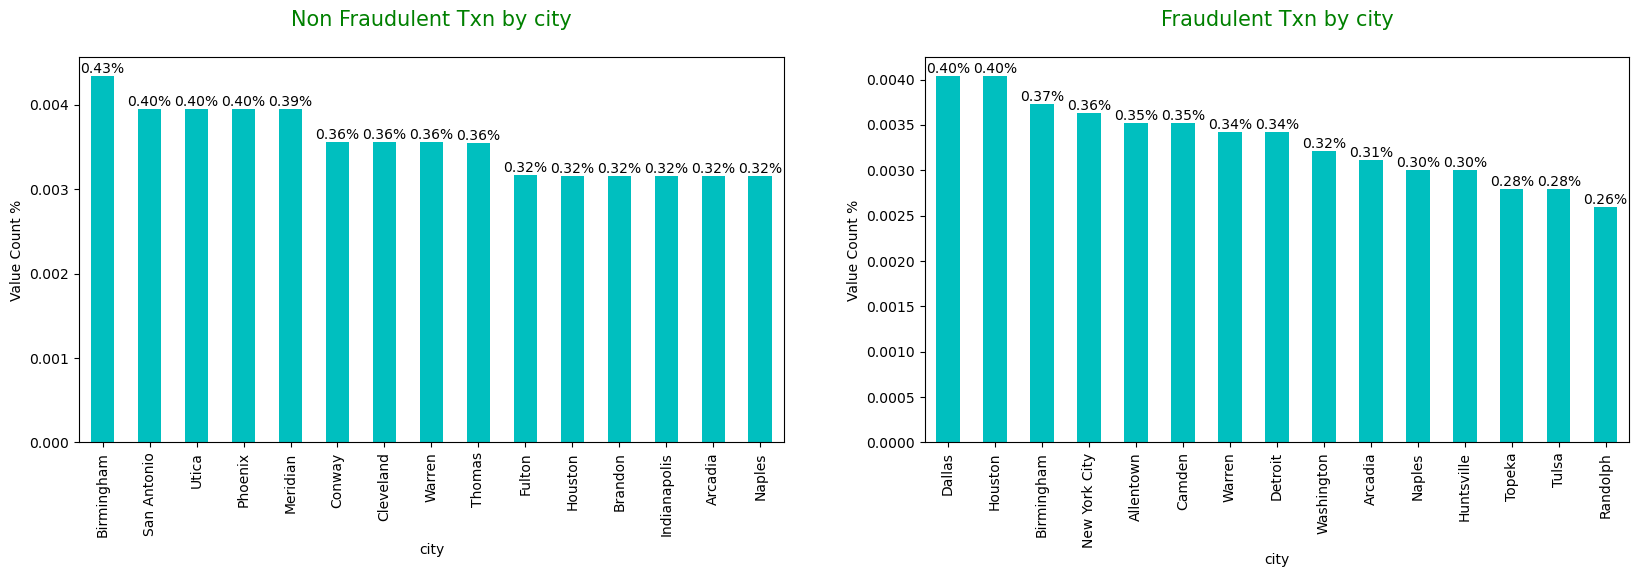

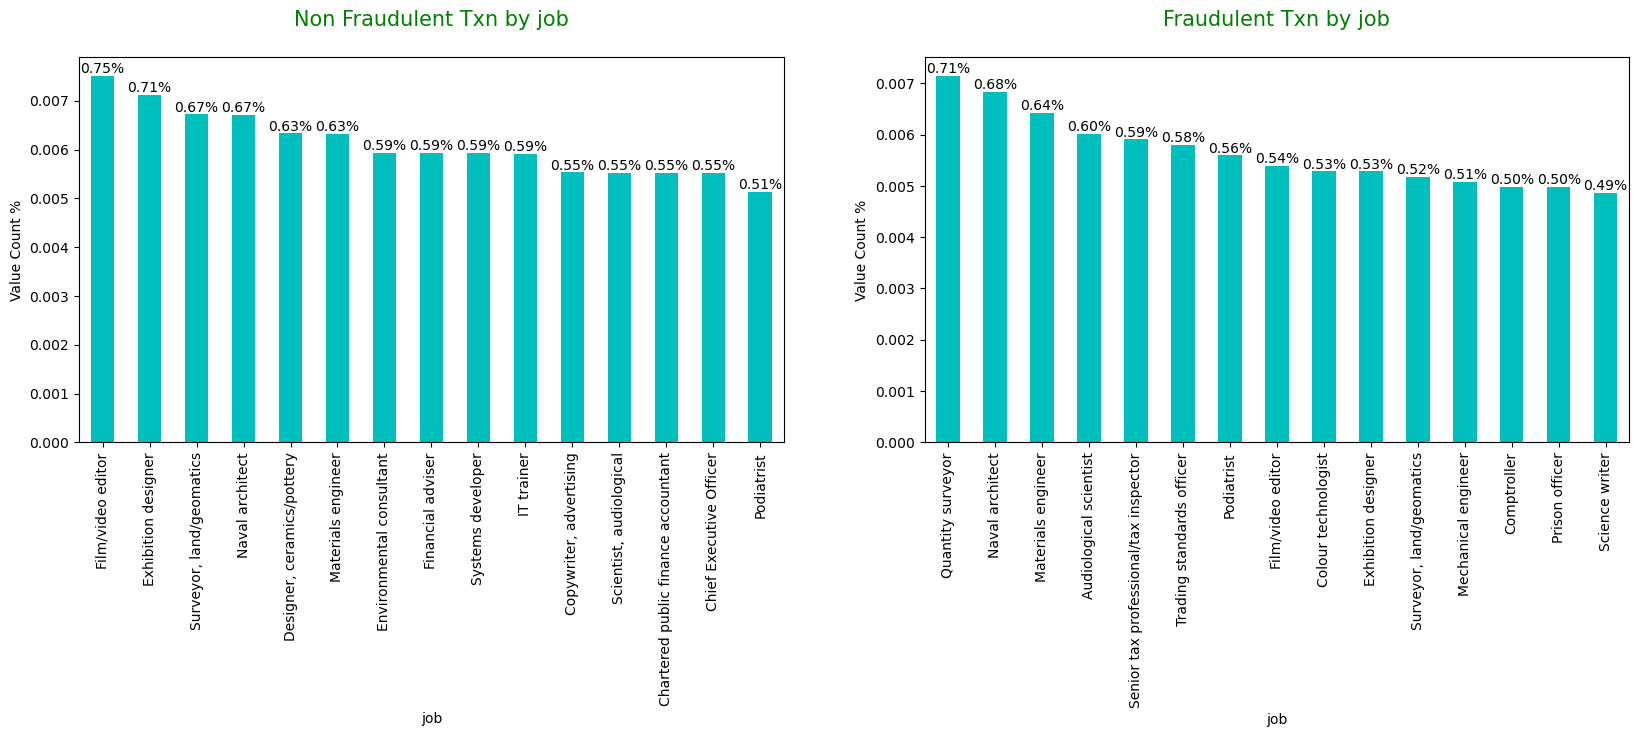

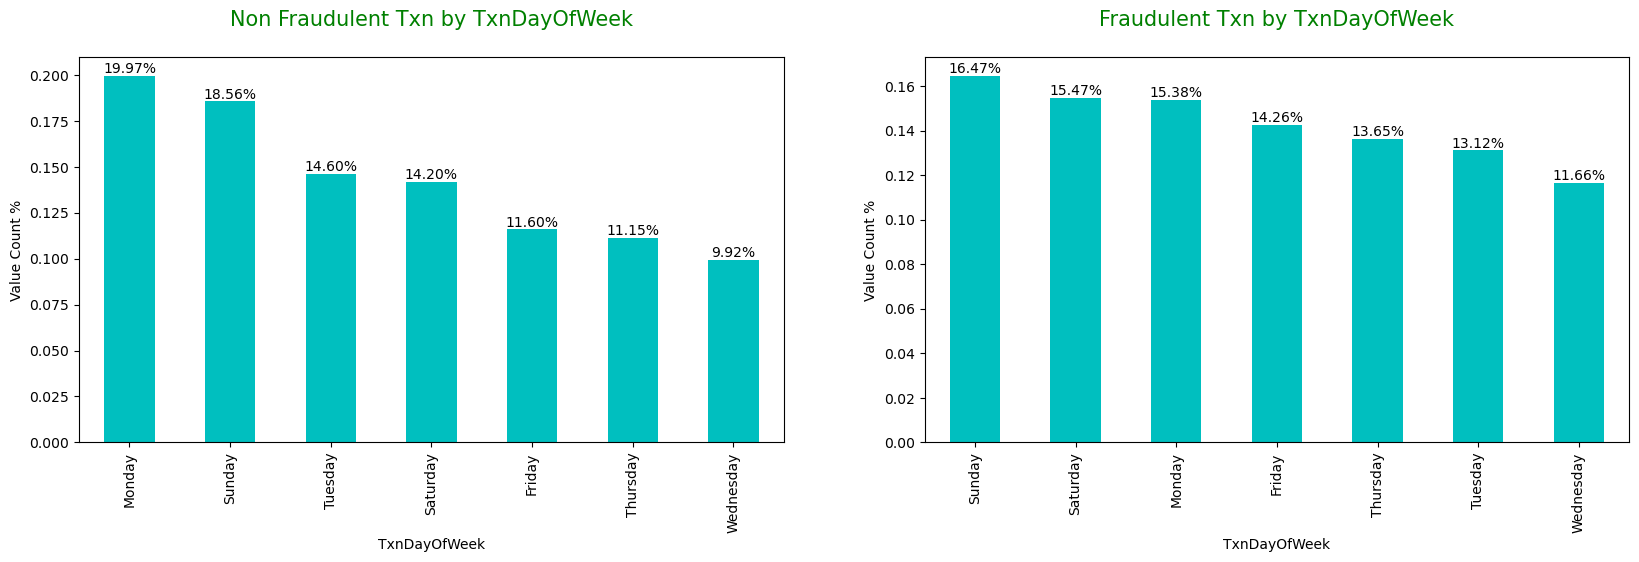

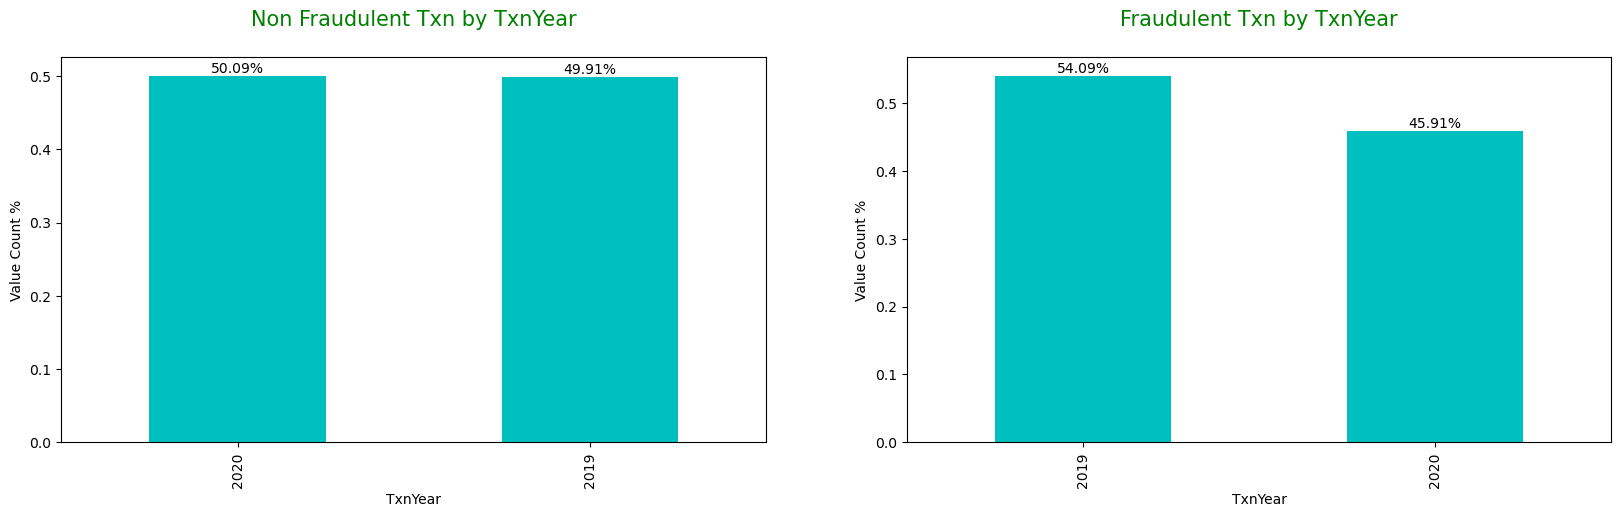

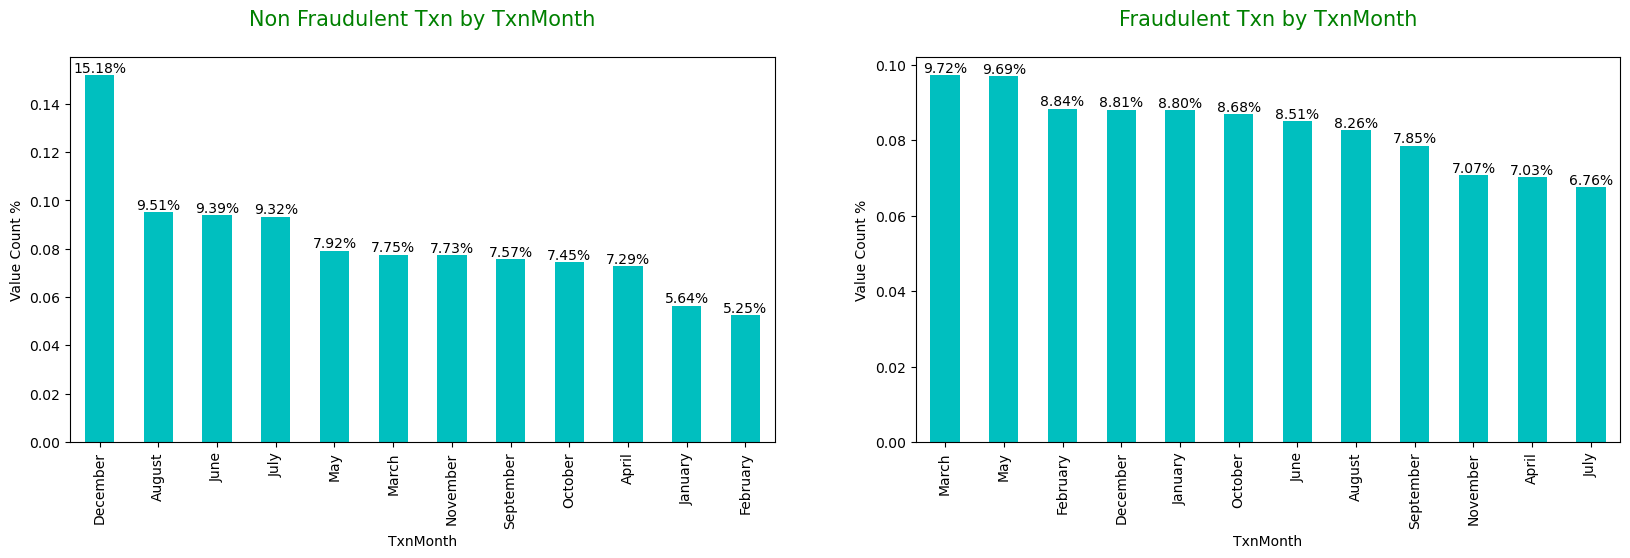

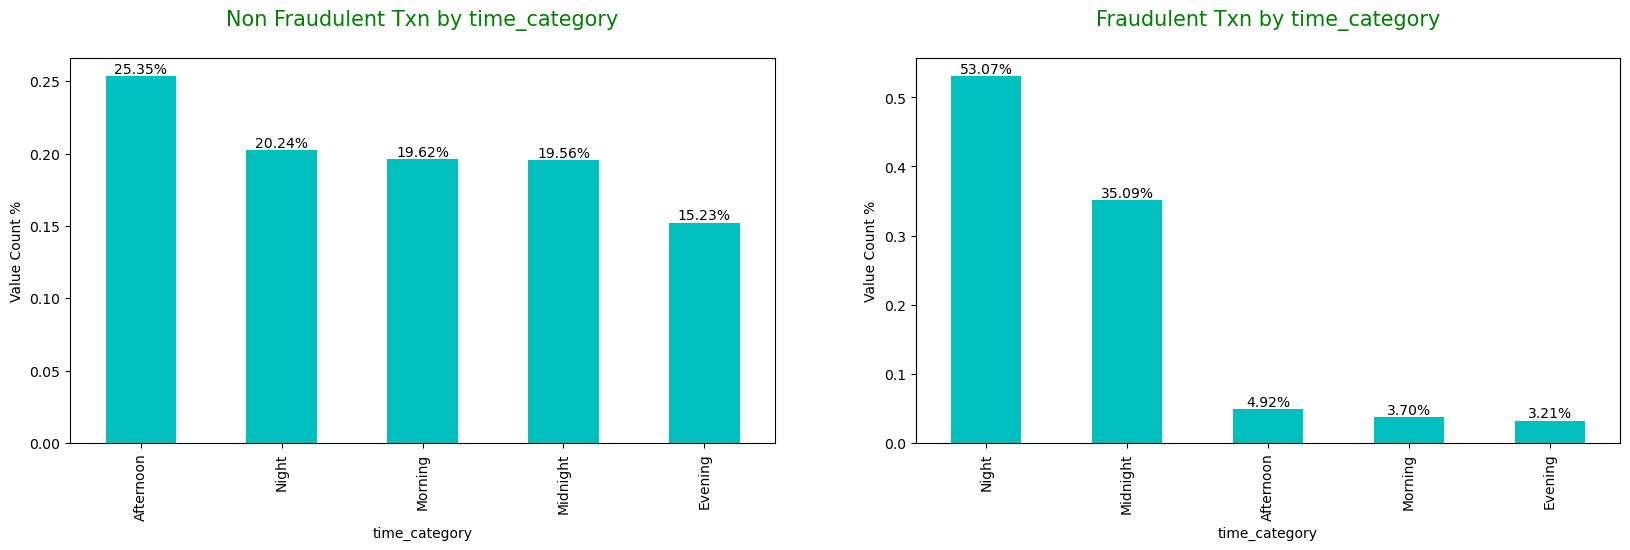

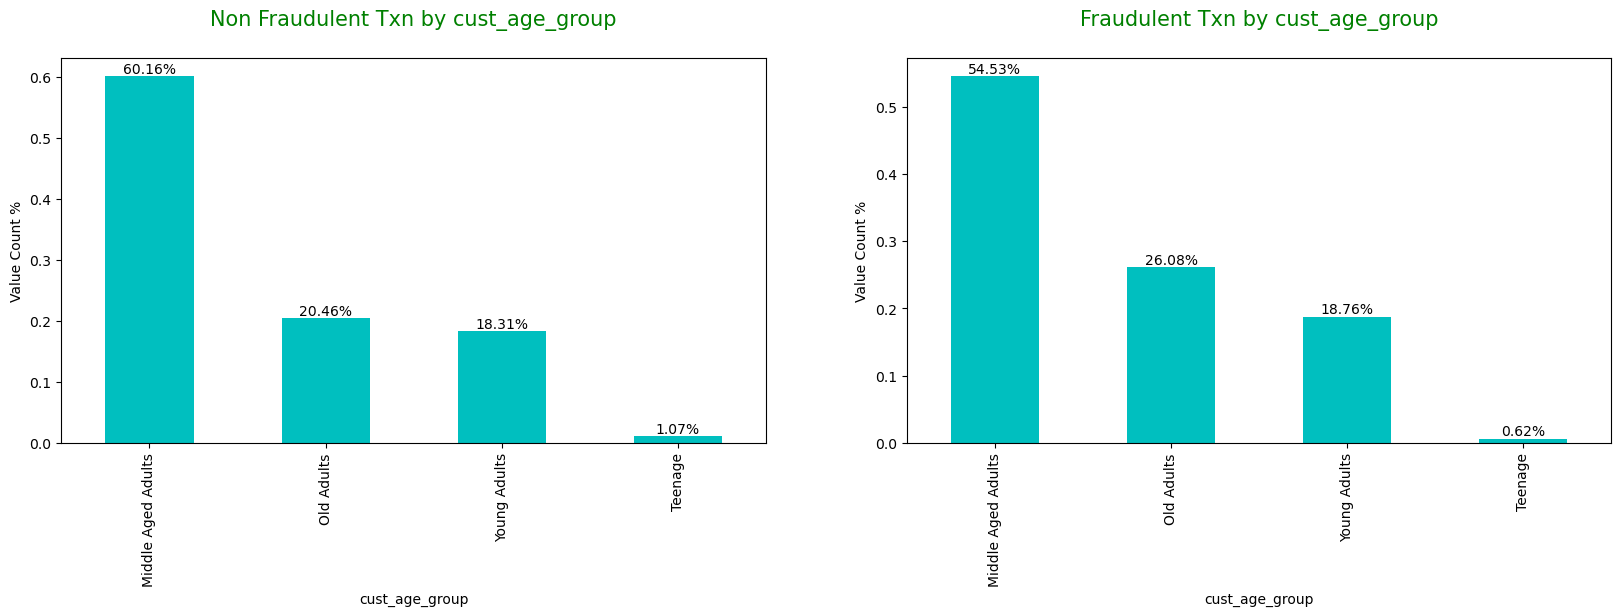

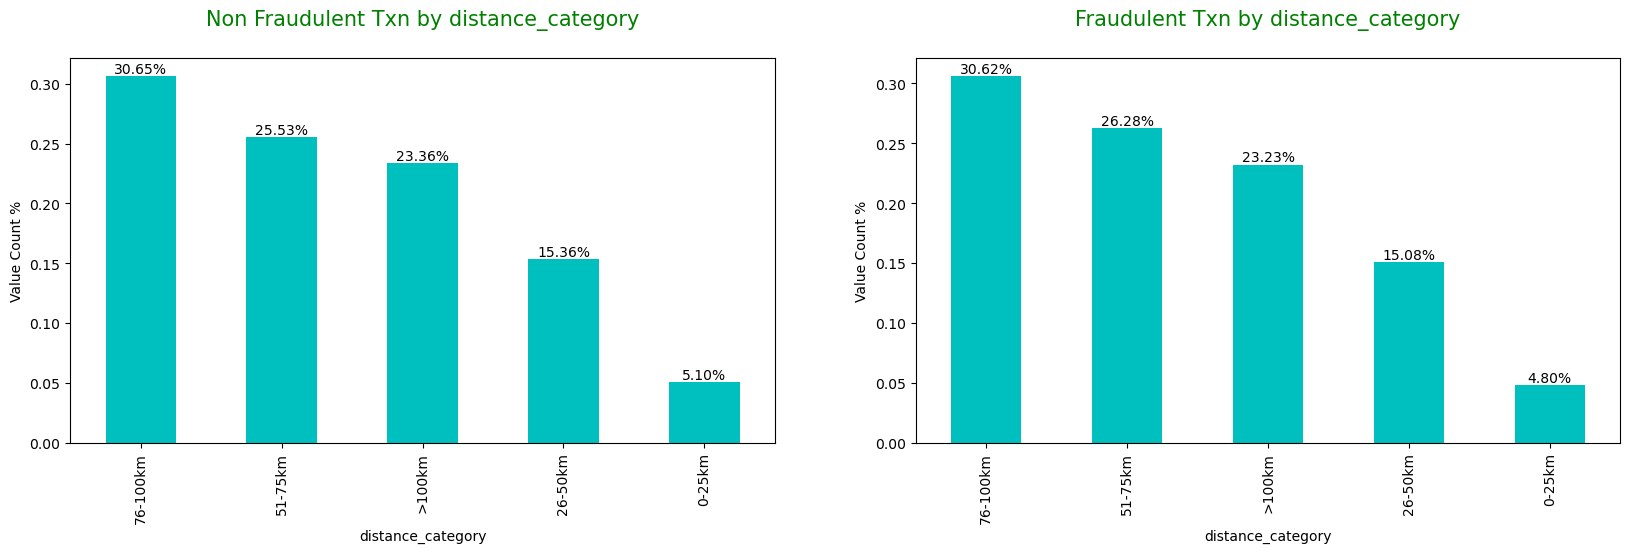

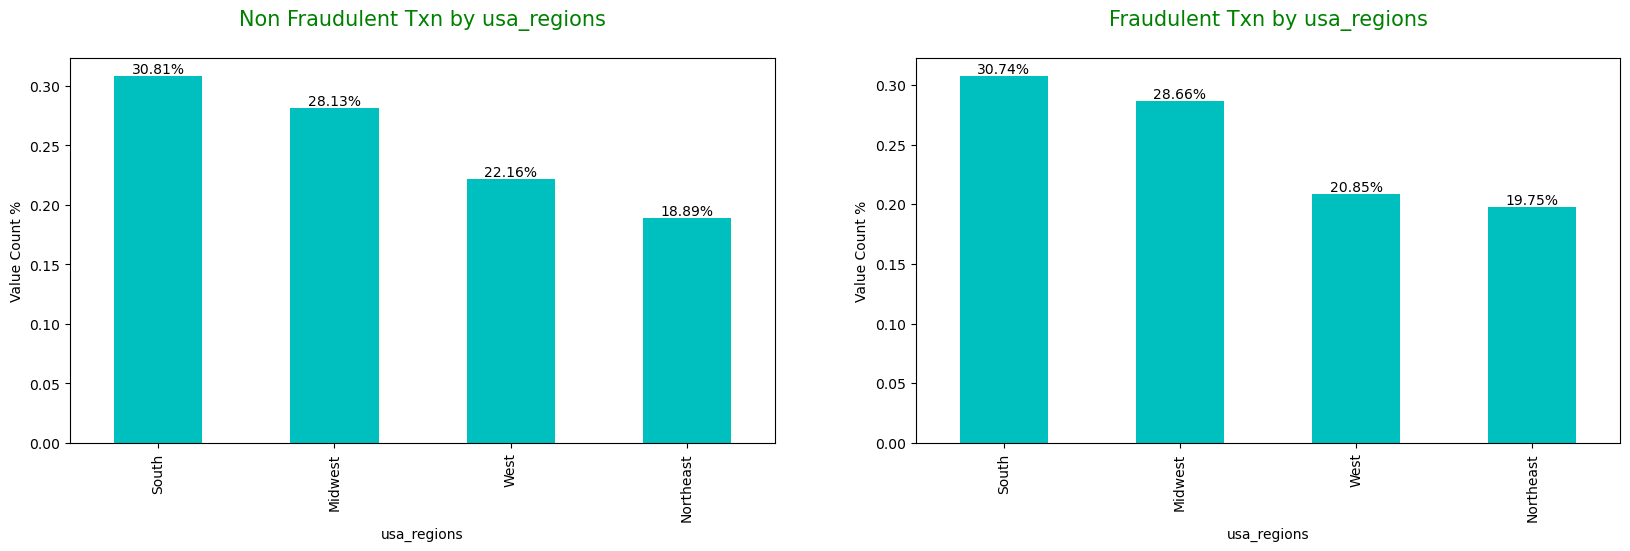

In [35]:
for i in cat_var:
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  df2[df2['is_fraud']==0][i].value_counts(normalize=True).head(15).plot.bar(color='c')
  plt.xlabel(f"{i}")
  plt.ylabel("Value Count %")
  plt.title(f"Non Fraudulent Txn by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
# Add bar labels
  counts_non_fraud = df2[df2['is_fraud'] == 0][i].value_counts(normalize=True).head(15)
  for j, count in enumerate(counts_non_fraud):
    plt.text(j, count, f"{count:.2%}", ha='center', va='bottom')

  plt.subplot(1,2,2)
  df2[df2['is_fraud']==1][i].value_counts(normalize=True).head(15).plot.bar(color='c')
  plt.xlabel(f"{i}")
  plt.ylabel("Value Count %")
  plt.title(f"Fraudulent Txn by {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})

  counts_fraud = df2[df2['is_fraud'] == 1][i].value_counts(normalize=True).head(15)
  for j, count in enumerate(counts_fraud):
    plt.text(j, count, f"{count:.2%}", ha='center', va='bottom')

  plt.show()

#### **Insight**
- **Spending categories such as grocery_pos,shopping_net, misc_net and shopping_pos seems indicative for fraudulent transactions**
- **Male gender sightly high susceptible to fraudulent transactions comapred to female**
- **Houston, Warren and Napless are cities observed more fraudulent transactions**
- **It seems customers of Materials engineer, Trading standards officer and Navel architect job profile targeted for fraud**
- **Non fraudulent transactions tend to happen more often on Monday whereas fraudulent transactions happens more on Saturday**
- **Fraudulent transactions observed more in month of January, February, May and March**
- **Nights and Midnights are highly prone to fraud while non fraudulent transactions happens more in afternoon**
- **old adults are more sensitive to frauds compare to other age groups**
- **South and Northeast regions shows incidents of more fraudulent transactions**
- **diatance and transaction year does not have any indication to fraudulent transactions**

#### **Numerical Variables**

In [36]:
num_var = df2.select_dtypes(include=[np.number]).columns
num_var = num_var[num_var != 'is_fraud']
print(num_var)

Index(['transaction_amount', 'city_pop', 'distance(km)', 'hist_trans_30d',
       'hist_trans_24h', 'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')


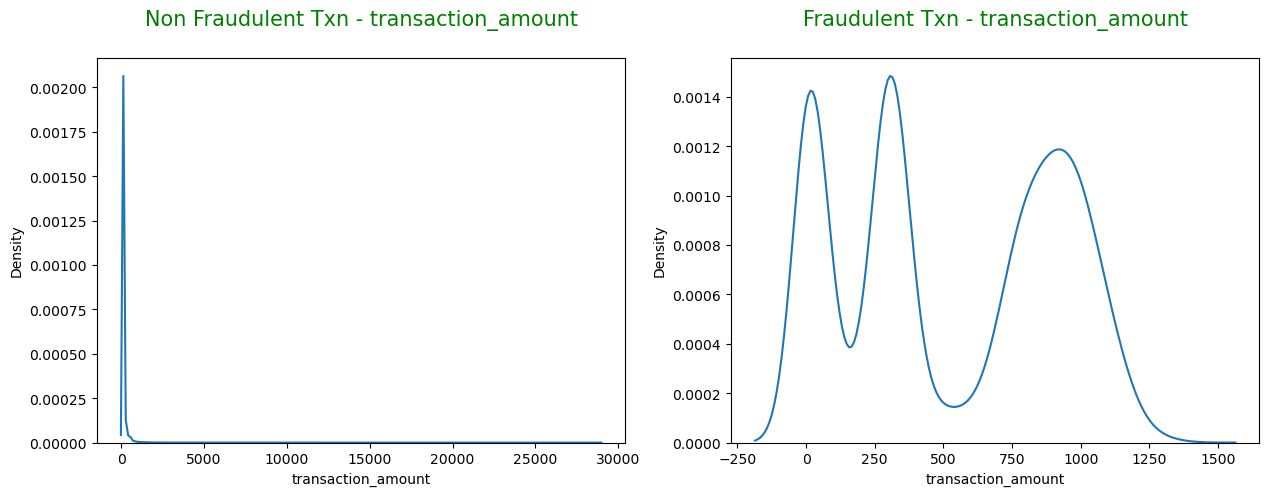

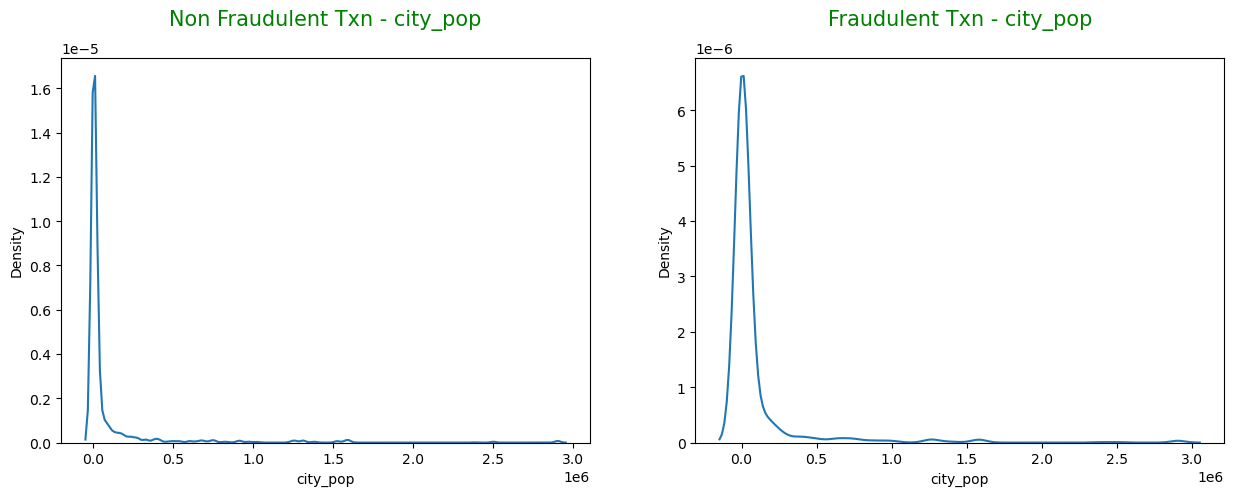

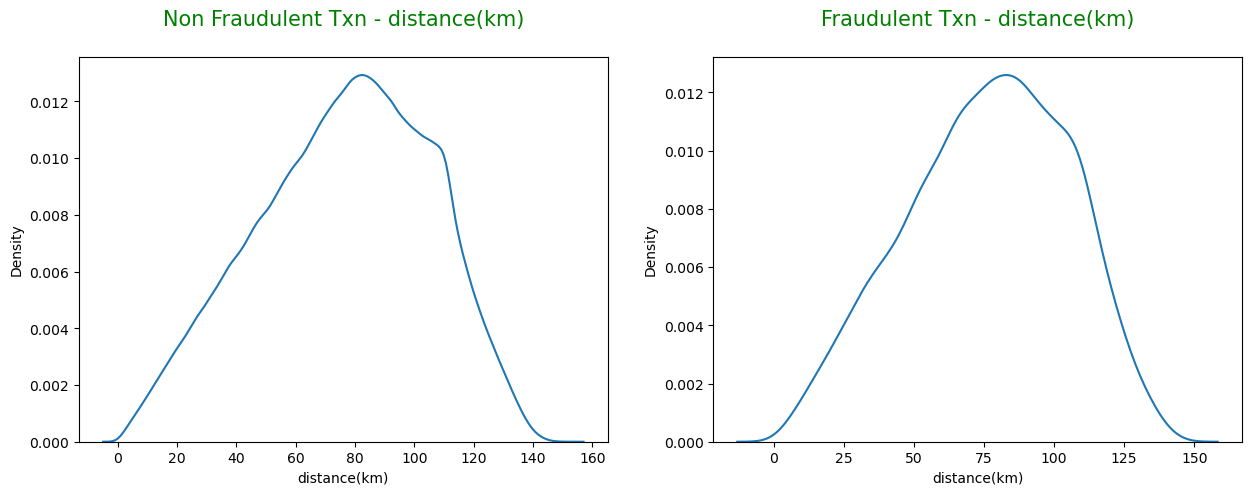

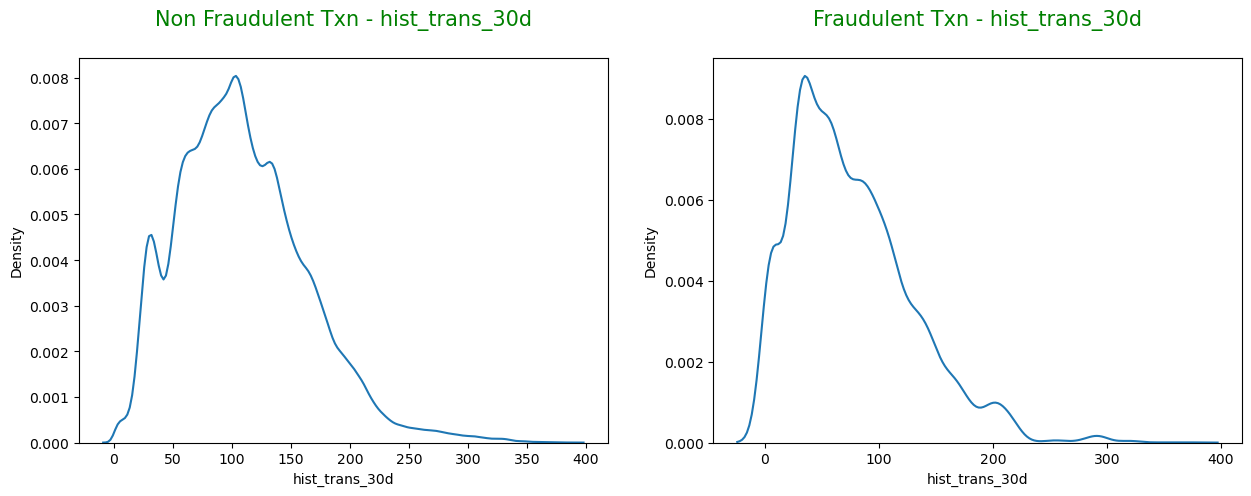

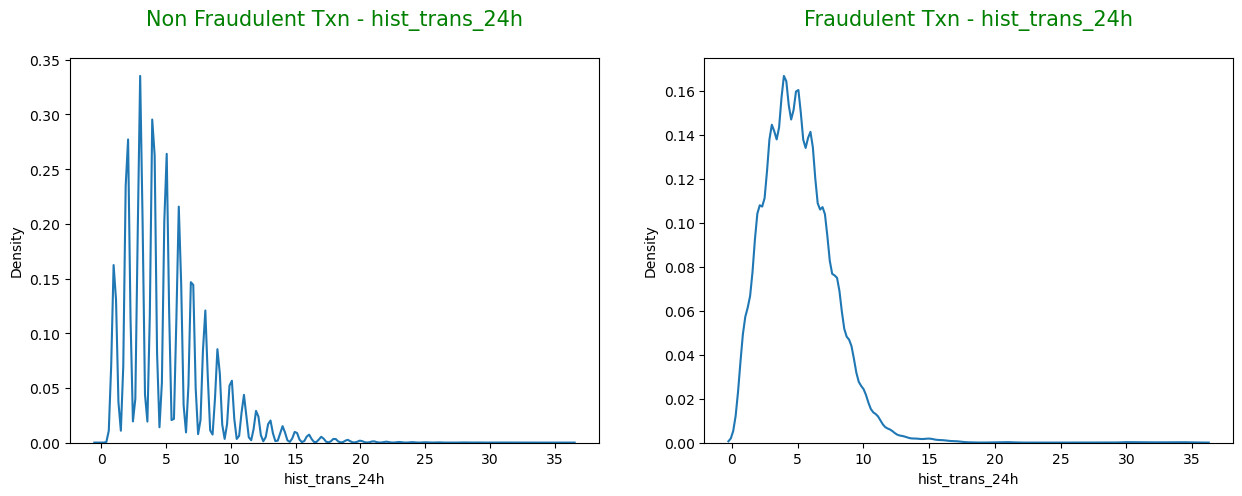

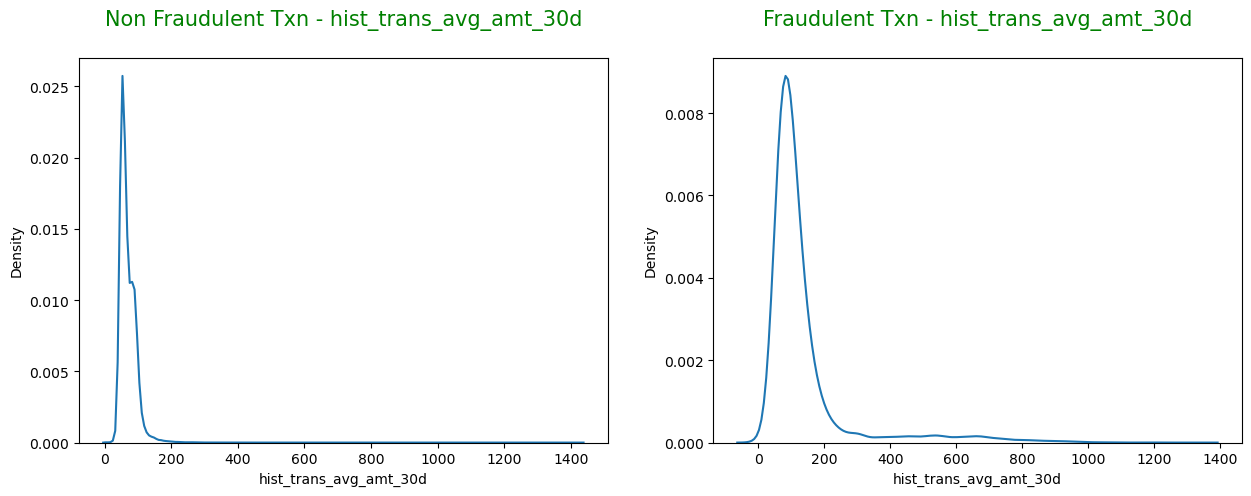

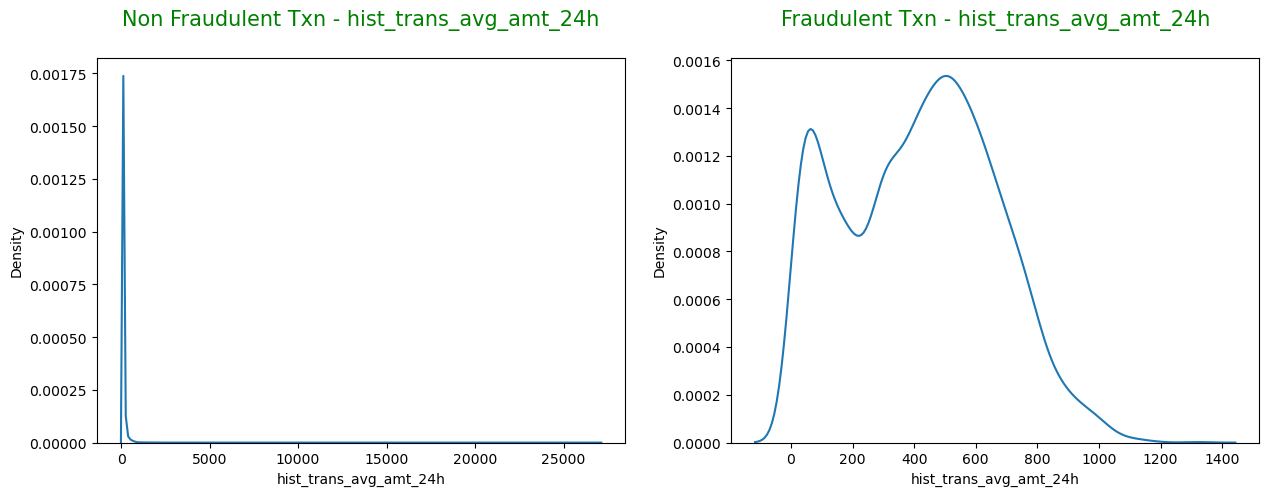

In [37]:
for i in num_var:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.kdeplot(data=df2[df2['is_fraud'] == 0],x=i)
  plt.title(f"Non Fraudulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.subplot(1,2,2)
  sns.kdeplot(data=df2[df2['is_fraud'] == 1],x=i)
  plt.title(f"Fraudulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.show()

#### **Insights**
- **no fraudulent transaction amount and city population feature is highly right skewed**
- **fraudulent transaction amount shows multimodel distribution however tree based models handles multimodel distribution**
- **distance between customer base and merchant shows identical distribution for fraudulent transactions and non fraudulent transactions**
- **moving average amount in both fraud and non fraudulent transactions are normally distributed**
- **distribution of 24 hours moving average transaction amount is widely spread for fraudulent transactions compared to non-fraudulent transactions**
- **distribution of 30 days moving average transaction amount slightly spread for fraudulent transactions compared to non-fraudulent transactions**
- **distribution of 24 hours moving average of transaction count is widely spread for fraudulent transactions compared to non-fraudulent transactions**

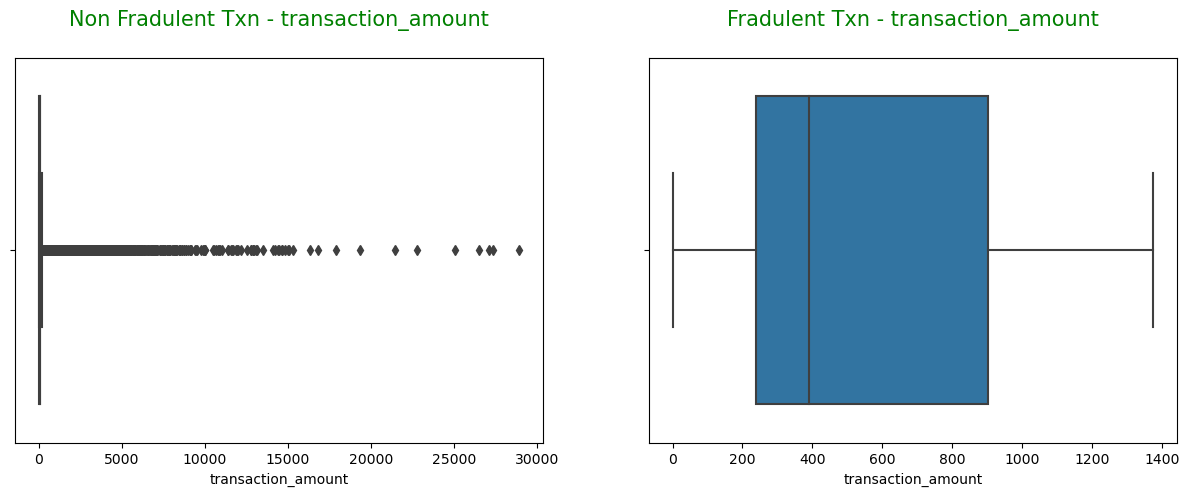

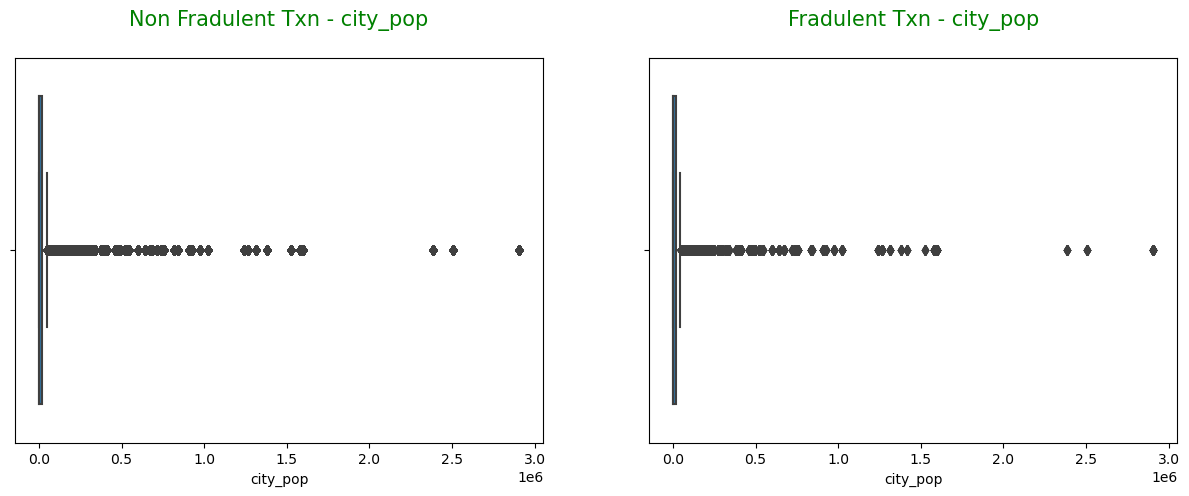

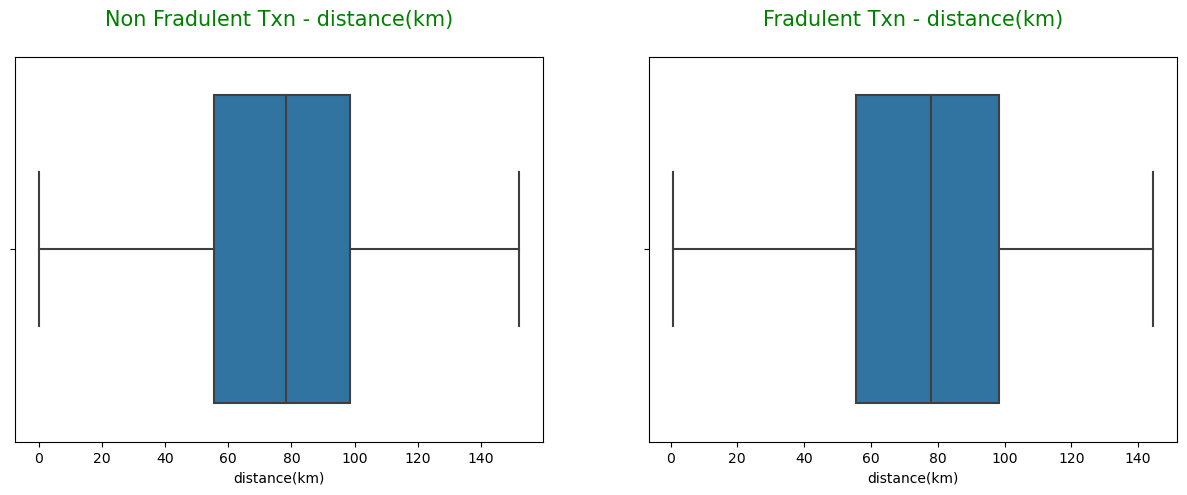

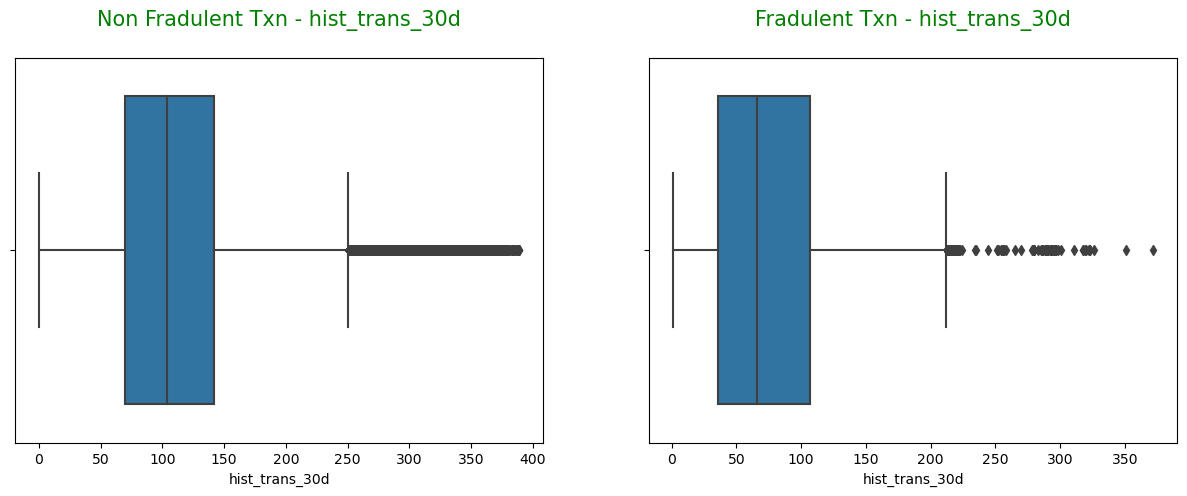

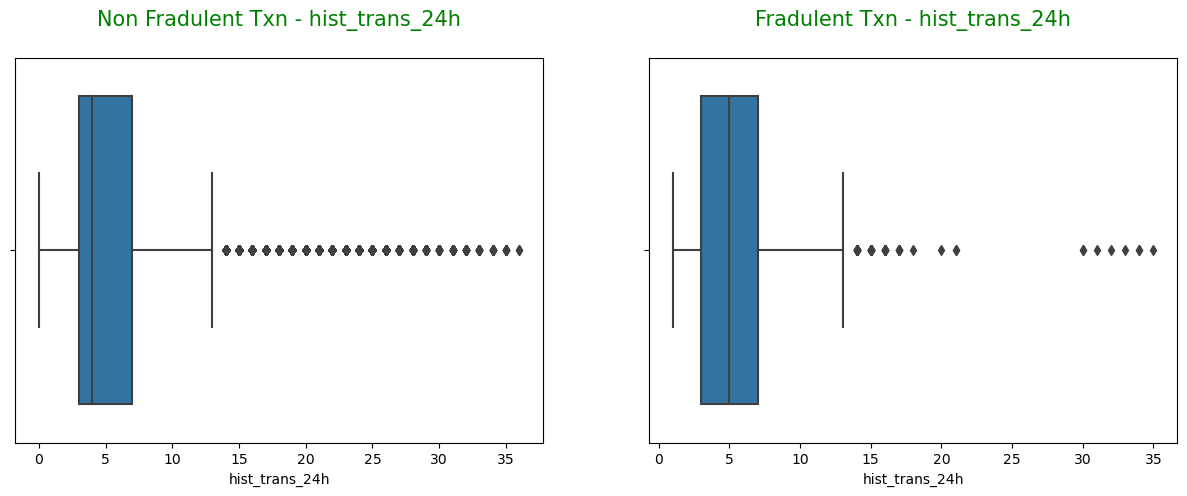

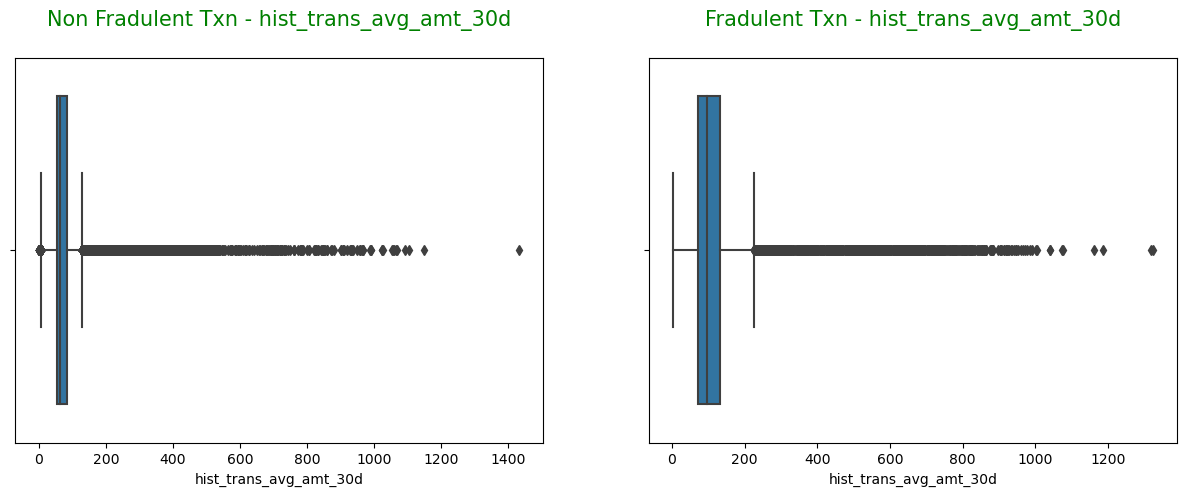

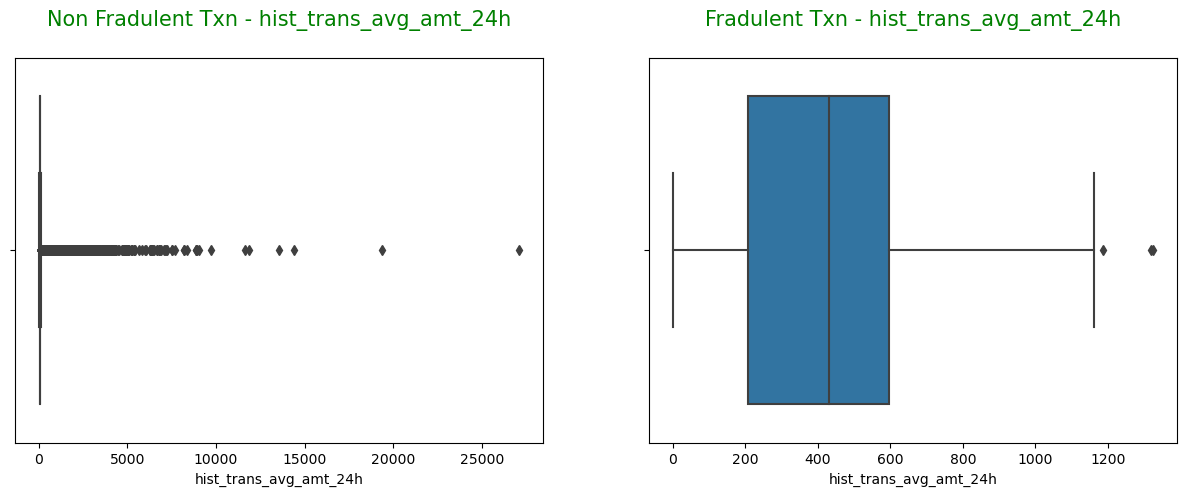

In [38]:
for i in num_var:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.boxplot(data=df2[df2['is_fraud'] == 0],x=i)
  plt.title(f"Non Fradulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.subplot(1,2,2)
  sns.boxplot(data=df2[df2['is_fraud'] == 1],x=i)
  plt.title(f"Fradulent Txn - {i}\n",fontdict={'fontsize': 15, 'fontweight' : 20, 'color' : 'Green'})
  plt.show()

#### **Insight**
- **non fraudulent transaction amount and city population both features have outliers and that can be handled during imputation**
- **Surprizingly, fraudulent transaction amount is is very less comapred to non fraudulent transaction amount**
- **distance does not have any outliers from fraudulent transactions**

### **Bivariate Analysis**

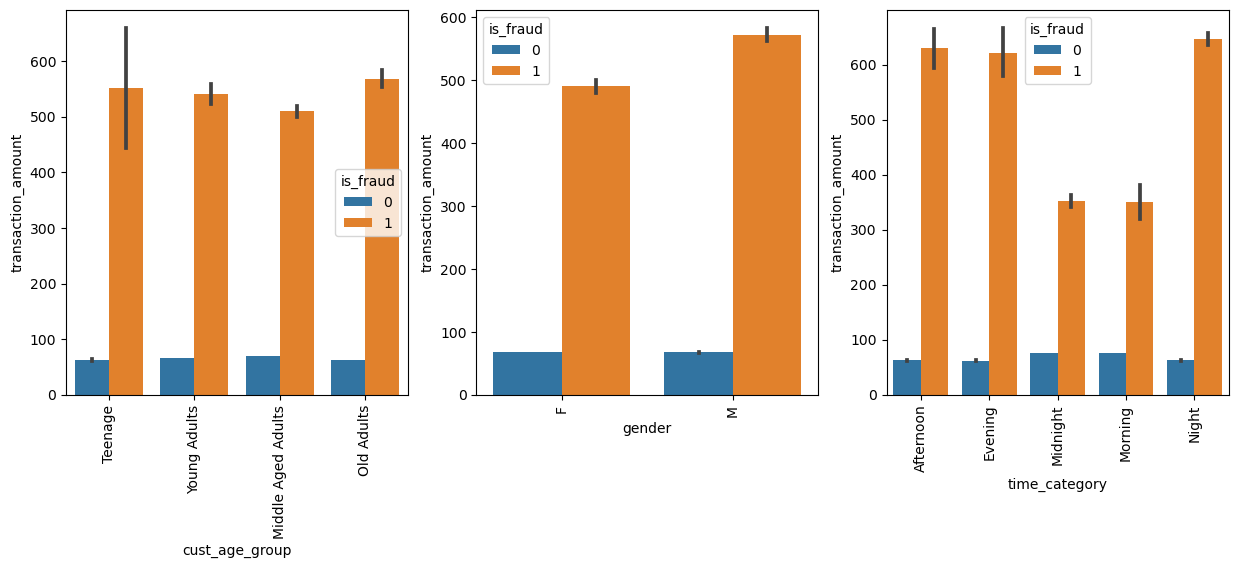

In [39]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x='cust_age_group', y='transaction_amount', hue='is_fraud', data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='gender',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='time_category',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)
plt.show()

plt.show()

#### **Insight**
- **Transaction amount of frauduent transactions done by old adults and teenage is high**
- **Transaction amount of frauduent transactions done by male customers is high**
- **Transaction amount of frauduent transactions done in the nights,afternoon and evening is high**

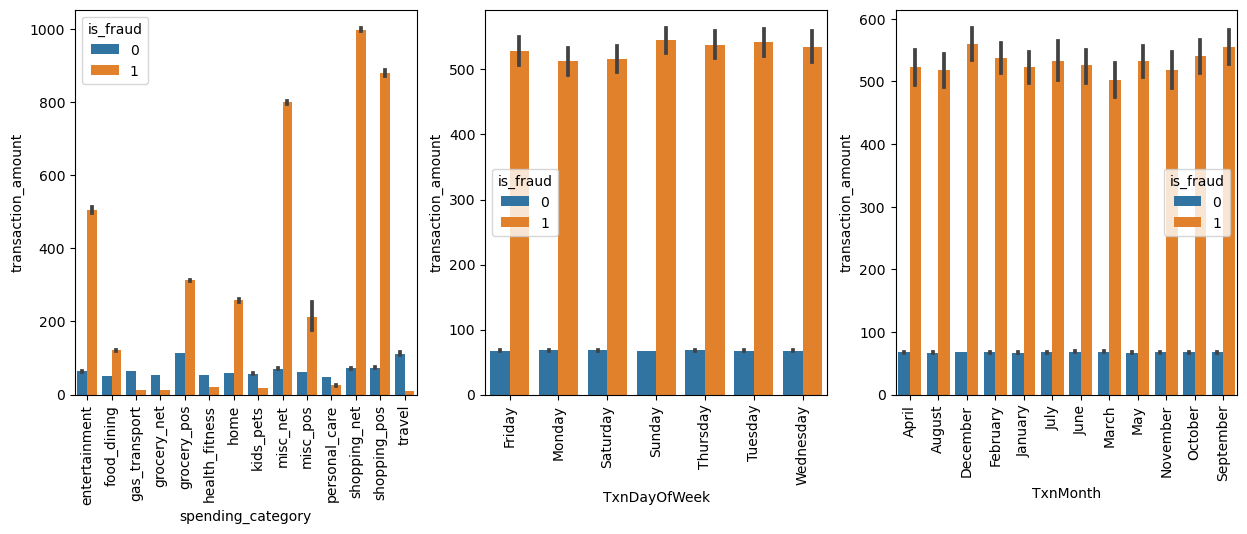

In [40]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x='spending_category', y='transaction_amount', hue='is_fraud', data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='TxnDayOfWeek',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='TxnMonth',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)
plt.show()

plt.show()

#### **Insight**
- **Transaction amount of frauduent transactions done by shopping_net and shopping_pos spending category is high**
- **Transaction amount of frauduent transactions done on Sunday is high**
- **Transaction amount of frauduent transactions done in October, Jule and December is high**

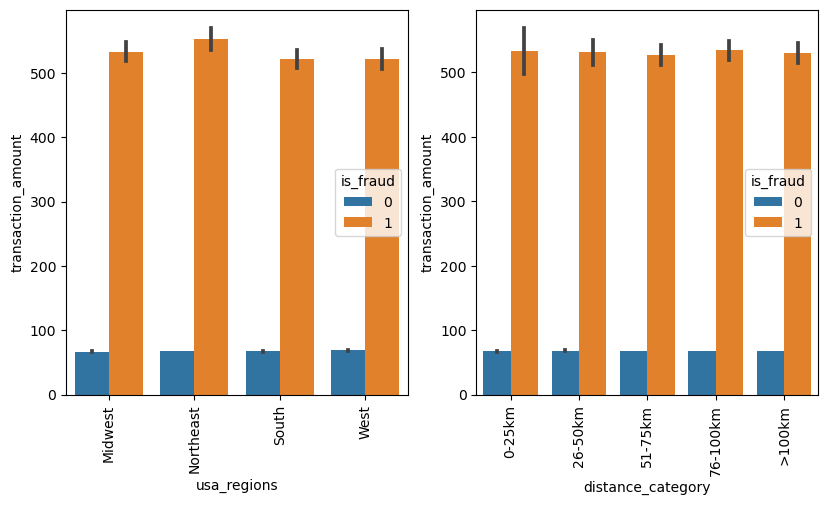

In [41]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(x='usa_regions', y='transaction_amount', hue='is_fraud', data=df2)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='distance_category',y='transaction_amount',hue='is_fraud',data=df2)
plt.xticks(rotation = 90)


plt.show()

#### **Insight**
- **Transaction amount of frauduent transactions done at Northeast region shopping_net is high**
- **Transaction amount of frauduent transactions done from any distance is same**

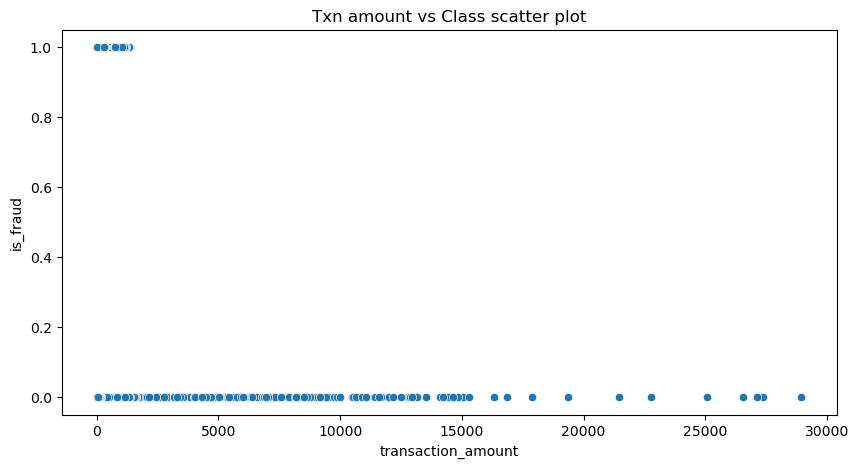

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="transaction_amount", y="is_fraud")
plt.title("Txn amount vs Class scatter plot")
plt.show()

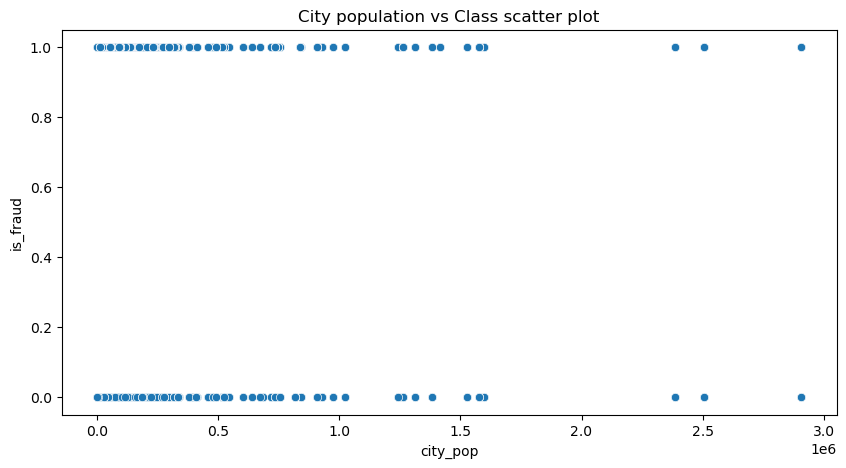

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="city_pop", y="is_fraud")
plt.title("City population vs Class scatter plot")
plt.show()

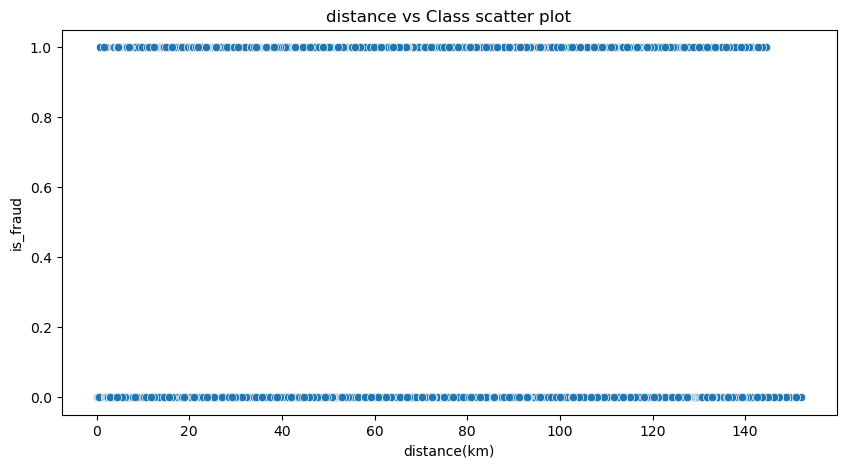

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="distance(km)", y="is_fraud")
plt.title("distance vs Class scatter plot")
plt.show()

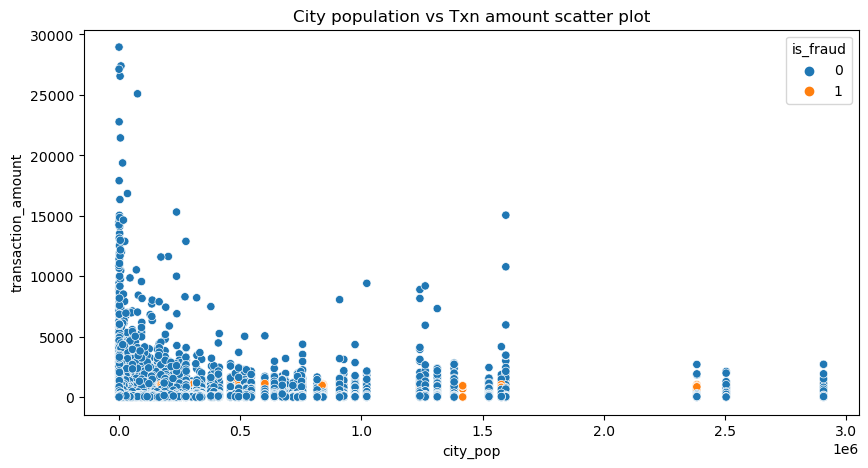

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df2, x="city_pop", y="transaction_amount",hue=df2['is_fraud'].astype('category'))
plt.title("City population vs Txn amount scatter plot")
plt.show()

<Figure size 600x500 with 0 Axes>

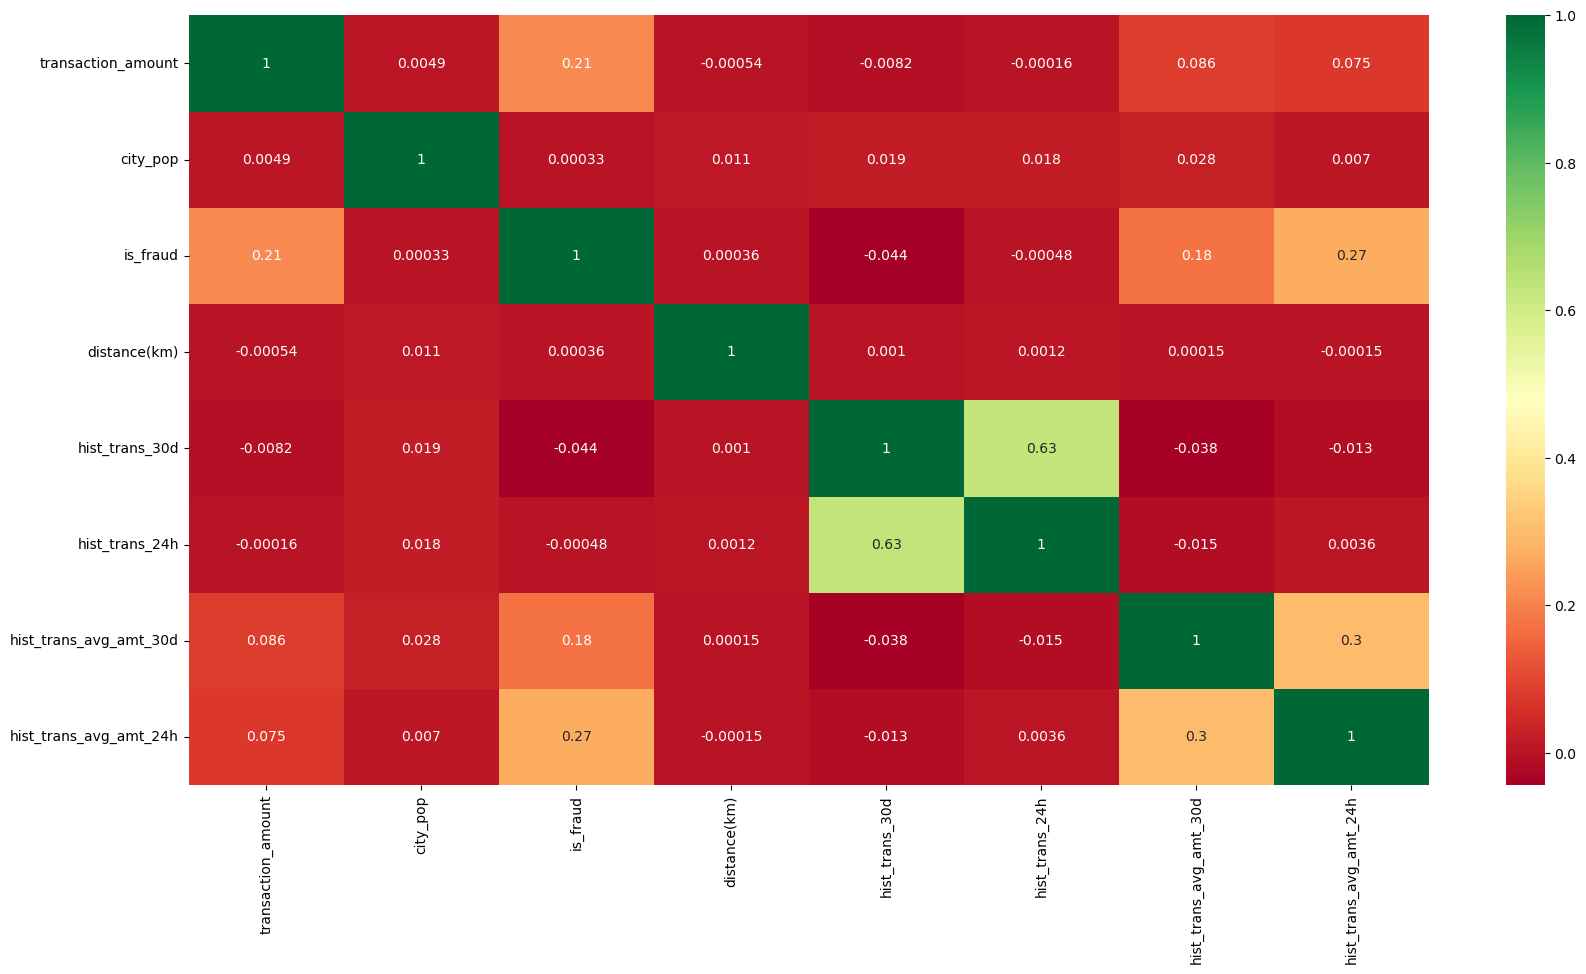

In [46]:
plt.figure(figsize=(6,5))
corr_matrix = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df2[corr_matrix.index].corr(),annot=True,cmap='RdYlGn')
plt.show()

#### **Insights**

- **It seems there is no relationship between fraud and city population**
- **transaction amount shows relationship with fraud**

## **Data Preparation for Model Building**

### **Drop unnecessary columns**

In [56]:
# dropping less important and unnecessay features from the data
drop_col = ['city','city_pop','TxnYear','job','distance_category','distance(km)','cust_age_group']
df3 = df2.drop(drop_col,axis=1)

df3.head()

spending_category  transaction_amount gender  is_fraud TxnDayOfWeek  \
0          misc_net             4.97000      F         0      Tuesday   
1       grocery_pos           107.23000      F         0      Tuesday   
2     entertainment           220.11000      M         0      Tuesday   
3     gas_transport            45.00000      M         0      Tuesday   
4          misc_pos            41.96000      M         0      Tuesday   

  TxnMonth time_category usa_regions  hist_trans_30d  hist_trans_24h  \
0  January      Midnight       South       109.00000         6.00000   
1  January      Midnight        West        53.00000         1.00000   
2  January      Midnight        West         8.00000         5.00000   
3  January      Midnight        West       181.00000         5.00000   
4  January      Midnight       South       218.00000         6.00000   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0                70.97459                95.64167  
1                50.88396                12.11000  
2               377.92500               445.77800  
3                59.30740                42.45400  
4                67.14899                78.12000

### **One-Hot Encoding: Create dummy features for categorical variables with multiple levels**

In [57]:
dummy_df = pd.get_dummies(df3[['spending_category','TxnDayOfWeek','TxnMonth','time_category','usa_regions']],drop_first=True)

df3 = pd.concat([df3,dummy_df],axis=1)

In [58]:
#drop the original features that converted into dummy variables

df3.drop(['spending_category','TxnDayOfWeek','TxnMonth','time_category','usa_regions'],axis=1,inplace=True)

### **Binary Mapping**

In [59]:
df3.gender=df3.gender.apply(lambda x: 1 if x=="M" else 0)

In [60]:
df3.gender = df3.gender.astype('int64')

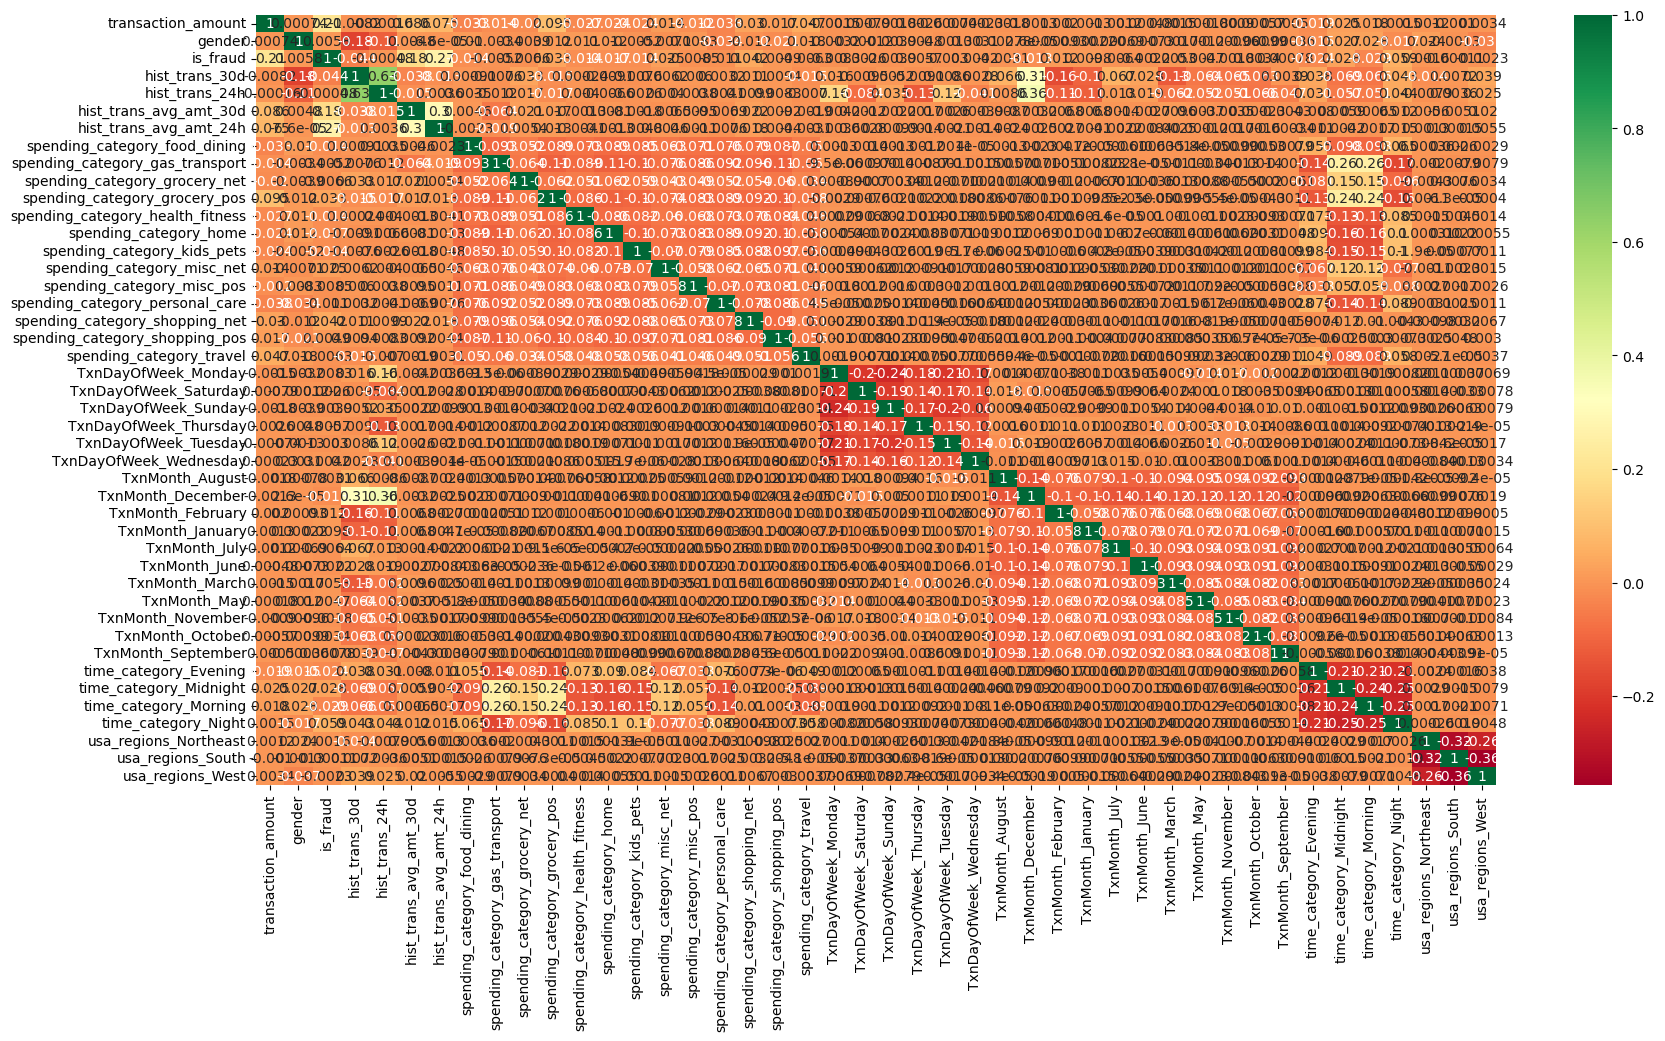

In [61]:
corr_matrix = df3.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df3[corr_matrix.index].corr(),annot=True,cmap='RdYlGn')
plt.show()

### **Train-Test Split**

In [62]:
X = df3.drop('is_fraud',axis=1)
y = df3['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80,stratify=y,random_state=0)
## Checking the split of the class lable
print("Total Class Lables", np.sum(y))
print("Train Class Lables", np.sum(y_train))
print("Test Class Lables", np.sum(y_test))

Total Class Lables 9651
Train Class Lables 7721
Test Class Lables 1930


### **Feature Scaling**

- **Though tree based algorithms such as decesion tree and random forest not sensitive to feature scale, it is necessary for gradient based optimization algorithms such as xgboost to converge fast**
- **Scaled features are used in decesion tree and random forest algorithms to maintain consistency with other models**
- **While feature scaling is generally not required for decision trees and random forests, but it is beneficial for interpretability, consistency, or visualization purposes**

In [63]:
# creating standard scaler object
scaler = StandardScaler()
# Scaling the train data
X_train[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h']] = scaler.fit_transform(X_train[['transaction_amount','hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h']])

In [39]:
X_train.head()

transaction_amount  gender  hist_trans_30d  hist_trans_24h  \
1836709            -0.38434       0         0.71342         1.50258   
482634             -0.40044       0        -0.79084        -0.03358   
1739783            -0.06106       0        -0.93760         1.19535   
1318787            -0.23436       1         0.45659         0.27365   
406382             -0.03912       1         1.13535         0.58088   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  \
1836709                 2.26568                -0.32405   
482634                  0.09360                -0.22927   
1739783                 0.10982                 0.08950   
1318787                -0.65501                -0.29671   
406382                 -0.34409                -0.44409   

         spending_category_food_dining  spending_category_gas_transport  \
1836709                              0                                0   
482634                               0                                0   
1739783                              0                                1   
1318787                              0                                0   
406382                               0                                1   

         spending_category_grocery_net  spending_category_grocery_pos  ...  \
1836709                              0                              0  ...   
482634                               0                              0  ...   
1739783                              0                              0  ...   
1318787                              1                              0  ...   
406382                               0                              0  ...   

         TxnMonth_November  TxnMonth_October  TxnMonth_September  \
1836709                  0                 0                   0   
482634                   0                 0                   0   
1739783                  0                 0                   0   
1318787                  0                 0                   0   
406382                   0                 0                   0   

         time_category_Evening  time_category_Midnight  time_category_Morning  \
1836709                      0                       0                      0   
482634                       0                       1                      0   
1739783                      0                       0                      1   
1318787                      0                       1                      0   
406382                       0                       0                      1   

         time_category_Night  usa_regions_Northeast  usa_regions_South  \
1836709                    0                      0                  1   
482634                     0                      0                  0   
1739783                    0                      0                  1   
1318787                    0                      0                  0   
406382                     0                      0                  0   

         usa_regions_West  
1836709                 0  
482634                  0  
1739783                 0  
1318787                 0  
406382                  0  

[5 rows x 43 columns]

In [64]:
# Scaling the train data
X_test[["transaction_amount",'hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h']] = scaler.transform(X_test[['transaction_amount','hist_trans_30d','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h']])

In [41]:
X_test.head()

transaction_amount  gender  hist_trans_30d  hist_trans_24h  \
1389499            -0.24673       0         1.52058         0.88812   
749780              0.11572       1         0.60335        -0.03358   
445236             -0.11750       0         0.40156         0.58088   
1190381             0.09303       1         0.10805        -0.03358   
753185             -0.22510       0         0.65839         2.11704   

         hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  \
1389499                -0.73565                -0.40568   
749780                 -0.80991                -0.36904   
445236                 -0.65389                -0.47572   
1190381                -0.69398                 0.18199   
753185                  0.24395                -0.24124   

         spending_category_food_dining  spending_category_gas_transport  \
1389499                              0                                0   
749780                               0                                0   
445236                               0                                0   
1190381                              0                                1   
753185                               0                                1   

         spending_category_grocery_net  spending_category_grocery_pos  ...  \
1389499                              0                              0  ...   
749780                               1                              0  ...   
445236                               1                              0  ...   
1190381                              0                              0  ...   
753185                               0                              0  ...   

         TxnMonth_November  TxnMonth_October  TxnMonth_September  \
1389499                  0                 0                   0   
749780                   1                 0                   0   
445236                   0                 0                   0   
1190381                  0                 0                   0   
753185                   1                 0                   0   

         time_category_Evening  time_category_Midnight  time_category_Morning  \
1389499                      0                       0                      0   
749780                       0                       1                      0   
445236                       0                       1                      0   
1190381                      0                       1                      0   
753185                       0                       1                      0   

         time_category_Night  usa_regions_Northeast  usa_regions_South  \
1389499                    0                      0                  1   
749780                     0                      0                  1   
445236                     0                      0                  0   
1190381                    0                      0                  1   
753185                     0                      0                  0   

         usa_regions_West  
1389499                 0  
749780                  0  
445236                  1  
1190381                 0  
753185                  0  

[5 rows x 43 columns]

In [42]:
num_var = X_train.select_dtypes(include='float64').columns
print(num_var)

Index(['transaction_amount', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')


### Skewness Checking and mitigating

- **Skewed data lead to biased model estimates and inaccurate predictions. By mitigating skewness, the data distribution becomes closer to normality**
- **Skewed data can lead to imbalanced classes, where one class has significantly more instances than the others. This imbalance can cause models to be biased towards the majority class and result in poor predictive performance on the minority class.**
- **Skewed features can have a disproportionate impact on the model's learning process. When features have different scales or exhibit extreme values due to skewness, they can dominate the learning process and overshadow other features. This can lead to suboptimal model performance and make it difficult to accurately assess the importance of different features**

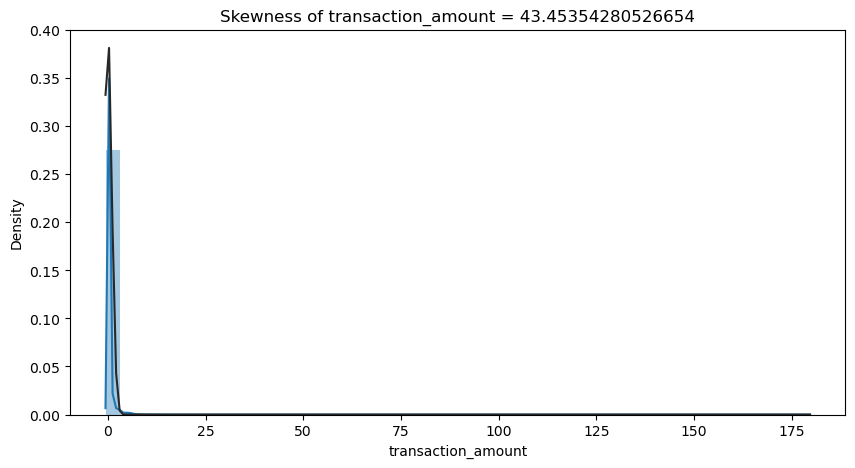

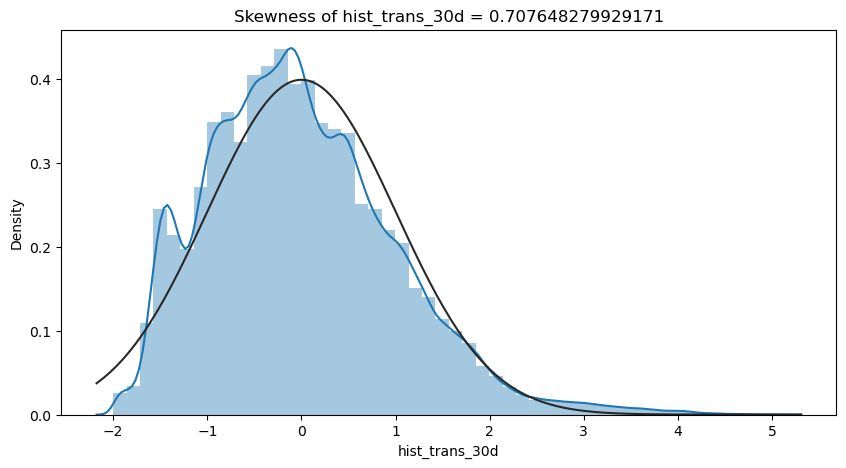

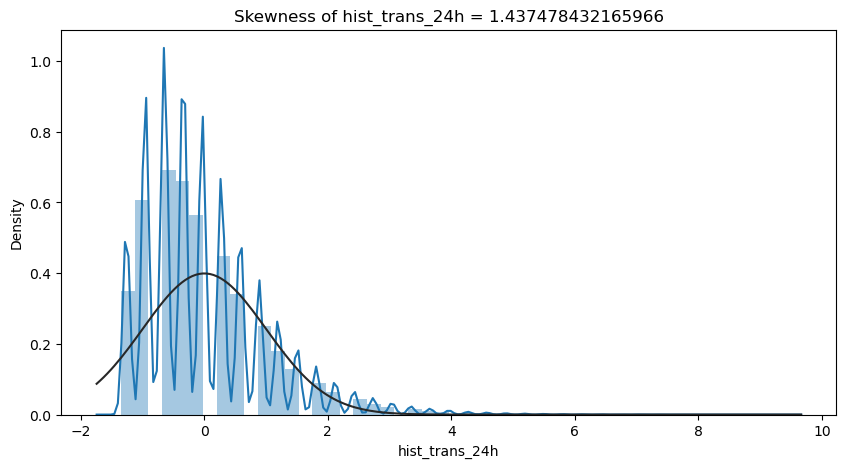

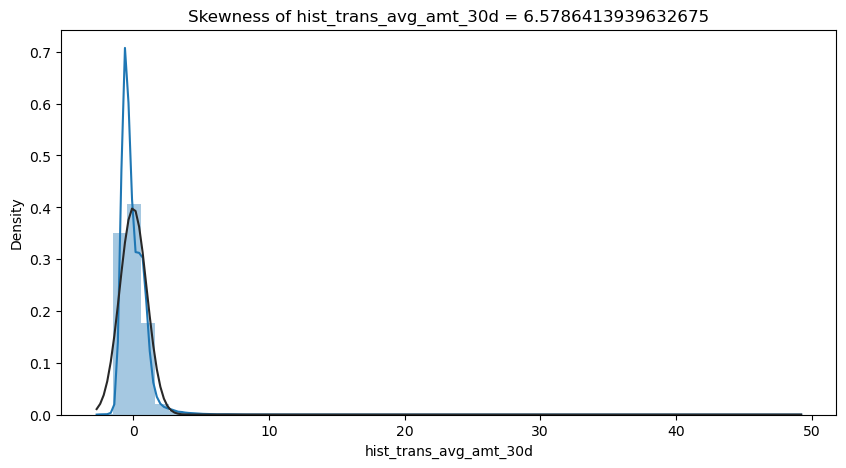

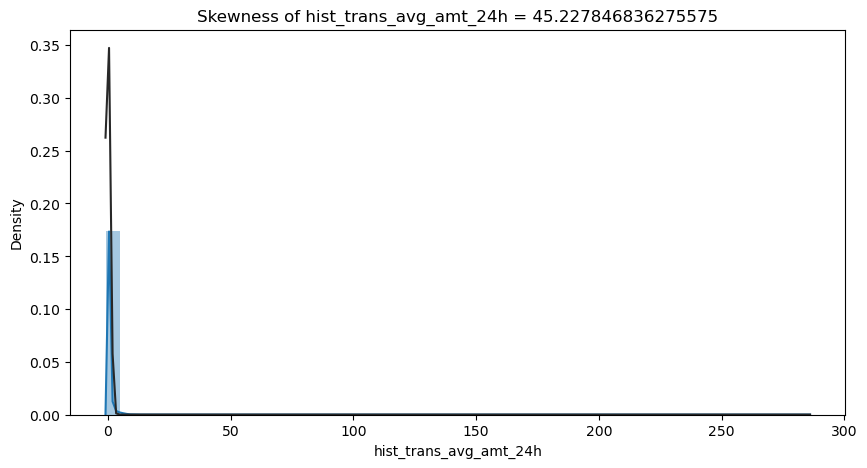

In [59]:
# Lets check the skewness of the continious features ,power transformations are not appropriate or necessary for binary variables
# Applying power transformations to binary variables would not make sense and could lead to incorrect interpretation or distortion of the data.
for i in num_var:
    plt.figure(figsize=(10,5))
    skewness = str(skew(X_train[i]))
    sns.distplot(X_train[i],fit = norm)
    plt.title(f"Skewness of {i}"+" = "+skewness)
    plt.show()

### Power Transformation

- **it is to be used to mitigate skewness of the data**

In [65]:
## Apply power transform for the train & test data whne skewness > 1 and < -1
pt = PowerTransformer(copy=False)

skewed_ftrs = ['transaction_amount','hist_trans_24h','hist_trans_avg_amt_30d','hist_trans_avg_amt_24h']


## Applying the power transformer to train data
X_train[skewed_ftrs] = pt.fit_transform(X_train[skewed_ftrs])


## Applying the power transformer to train data
X_test[skewed_ftrs] = pt.transform(X_test[skewed_ftrs])

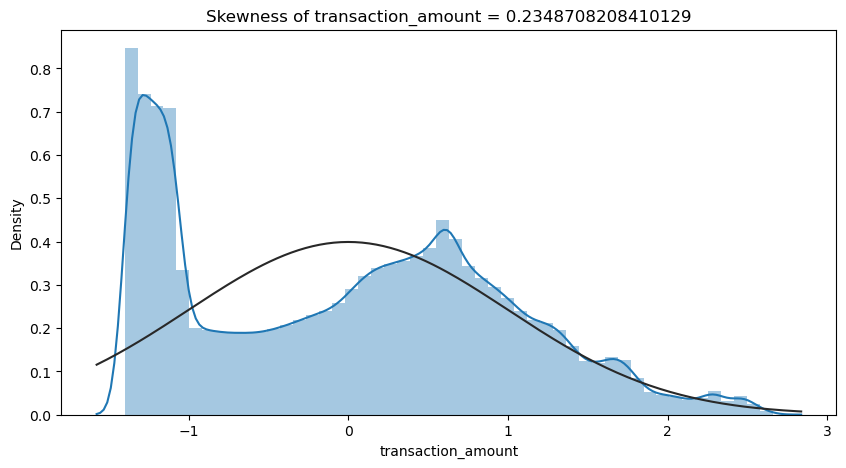

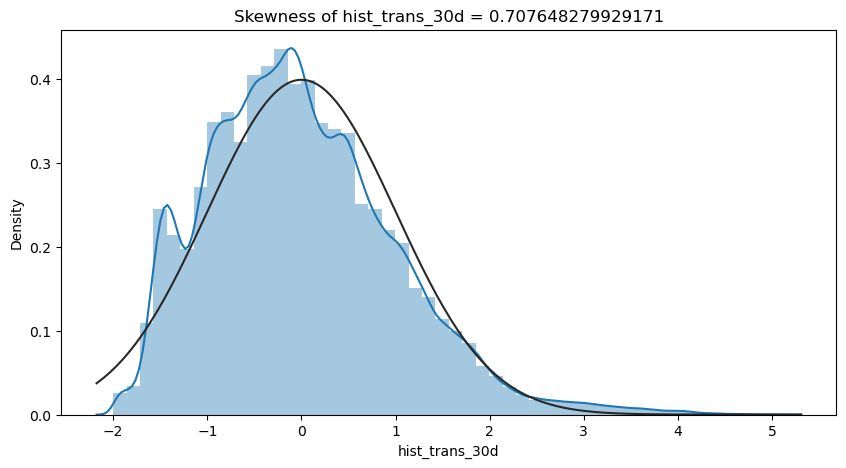

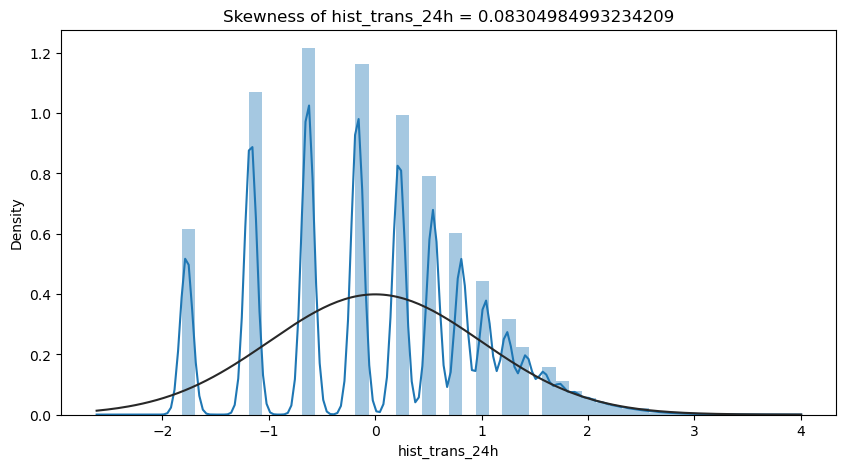

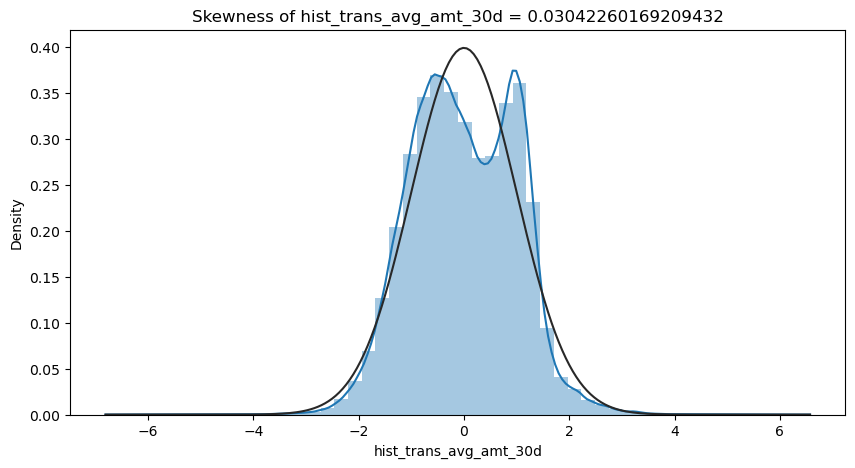

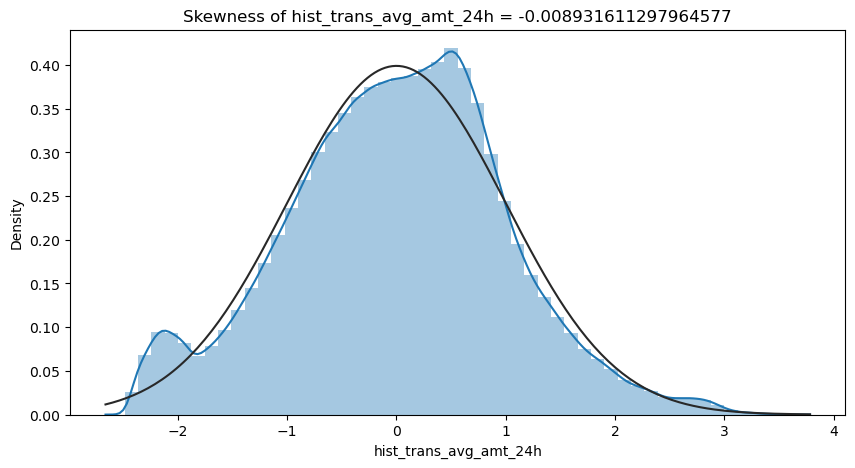

In [61]:
for i in num_var:
    plt.figure(figsize=(10,5))
    skewness = str(skew(X_train[i]))
    sns.distplot(X_train[i],fit = norm)
    plt.title(f"Skewness of {i}"+" = "+skewness)
    plt.show()

## **Model Building**
### **Build different models on the imbalanced dataset and see the result**

### **K-Fold validation with GridSearchCV**

- **It gives reliable and less biased performance estimation as comapred to a single train-test split**
- **This helps in selecting best hyperparameter tuning by comapring the performance of different sets of hyperparameters across multiple folds**
- **It helps in detecting overfitting, If the model consistently performs significantly worse on the validation folds compared to the training folds, it suggests that overfitting may be occurring.**

In [66]:
# we have 7720 1s in the training sets so if we create 4 folds the we can have atleast 1930 1s in each fold to get reliable estimate
k_folds = StratifiedKFold(n_splits=4,shuffle=True,random_state=0)

### **Specifying hyper parameters for grid search for all models**

In [67]:
# logistic regression hyperparameters
logreg_params = {

    'penalty': ['l1','l2'],
    'C'       : [0.01, 0.1, 1, 10, 100, 1000],
    'solver':['liblinear'],
    'max_iter':[1000],

}

# decesion tree hyperparameters
dt_params = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[50,100,150],
    'min_samples_split':[50,100,150],
}

# random forest hyperparameters

rf_params = {
    'max_depth': [10,20],
    'min_samples_leaf': [50,100],
    'n_estimators': [5,10],
    'min_samples_split': [50,100],
     }
# xgboost hyperparameters

xgboost_params = {
    'learning_rate':[0.01,0.05,0.1],
    'subsample':[0.3,0.6,0.9],
    'max_depth':[4,5,6]
}

### **Creating instances of all models**

In [68]:
# logistic regression
logreg = linear_model.LogisticRegression(random_state=0)

# decesion tree
dt = DecisionTreeClassifier(random_state=0)

# random forest
rf = RandomForestClassifier(random_state=0, n_jobs=-1,oob_score=True)

# xgboost
xgb = XGBClassifier(objective='binary:logistic',n_estimators=200,tree_method='gpu_hist',random_state=0)
    

### Creating function to display ROC-AUC score, f1 score and classification report

In [69]:
def display_scores(y_train, y_train_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_train, y_train_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_train, y_train_pred)}")

### Creating ROC Curve function

In [70]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### **Logistic Regression**

In [67]:
## Gridsearch for hyperparam tuning
logreg_imb_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'roc_auc',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_imb_model_cv.fit(X_train, y_train)

## Output of the evaluation result
print('Best ROC AUC score: ', logreg_imb_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_imb_model_cv.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: '

Best ROC AUC score:  0.9534503149053376
Best hyperparameters:  {'C': 1000, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [68]:
## Cross Validation results
cv_results = pd.DataFrame(logreg_imb_model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       20.22389       1.03023          0.24913         0.00778 0.01000   
1        9.42807       0.37990          0.24234         0.01692 0.01000   
2       47.64931       2.98008          0.29830         0.10571 0.10000   
3       12.60142       0.57037          0.23687         0.01125 0.10000   
4       71.53741       2.33763          0.24429         0.01006       1   

  param_max_iter param_penalty param_solver  \
0           1000            l1    liblinear   
1           1000            l2    liblinear   
2           1000            l1    liblinear   
3           1000            l2    liblinear   
4           1000            l1    liblinear   

                                              params  split0_test_score  ...  \
0  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1',...            0.94491  ...   
1  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...            0.94576  ...   
2  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', ...            0.95062  ...   
3  {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', ...            0.95005  ...   
4  {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 's...            0.95133  ...   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.95224          0.94806         0.00284               12   
1            0.95186          0.94819         0.00241               11   
2            0.95624          0.95282         0.00226                9   
3            0.95568          0.95227         0.00225               10   
4            0.95667          0.95338         0.00218                7   

   split0_train_score  split1_train_score  split2_train_score  \
0             0.94898             0.94805             0.94866   
1             0.94897             0.94835             0.94888   
2             0.95358             0.95308             0.95353   
3             0.95306             0.95254             0.95298   
4             0.95412             0.95363             0.95412   

   split3_train_score  mean_train_score  std_train_score  
0             0.94720           0.94822          0.00068  
1             0.94748           0.94842          0.00059  
2             0.95227           0.95312          0.00053  
3             0.95174           0.95258          0.00053  
4             0.95290           0.95369          0.00050  

[5 rows x 22 columns]

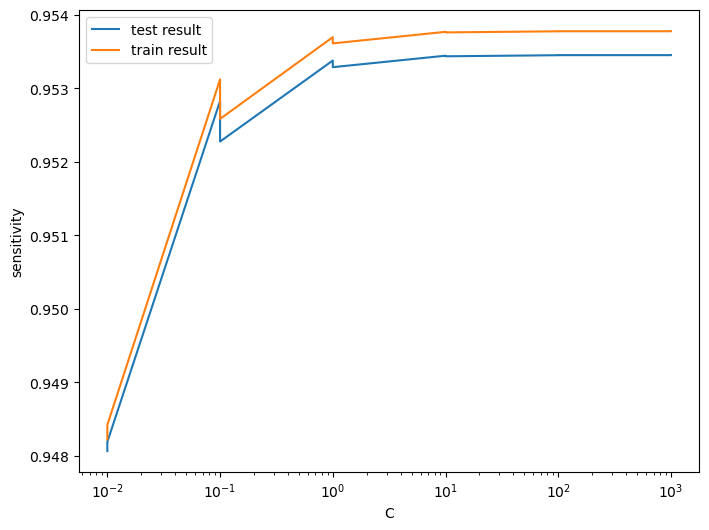

In [69]:
##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [70]:
#accessing best parameters to pass in logistic regression classifier

print('best parameters:',list(logreg_imb_model_cv.best_params_.items()))
c_val = list(logreg_imb_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_imb_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_imb_model_cv.best_params_.items())[2][1]
solver_val =list(logreg_imb_model_cv.best_params_.items())[3][1]

print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 1000), ('max_iter', 1000), ('penalty', 'l2'), ('solver', 'liblinear')]
1000
1000
l2
liblinear


In [71]:
## Logistic Regression with optimal C and penalty

logreg_imb_model_bestcv =linear_model.LogisticRegression(C=c_val,max_iter=mx_iter_val,penalty=penalty_val,solver=solver_val,n_jobs=-1,random_state=0)

## Fitting the best model on train dataset
logreg_imb_model_bestcv.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, random_state=0,
                   solver='liblinear')

### **Model Prediction**

F1 Score: 62.09%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       0.91      0.47      0.62      7721

    accuracy                           1.00   1481915
   macro avg       0.95      0.74      0.81   1481915
weighted avg       1.00      1.00      1.00   1481915

Confusion Matrix 
 [[1473841     353]
 [   4086    3635]]


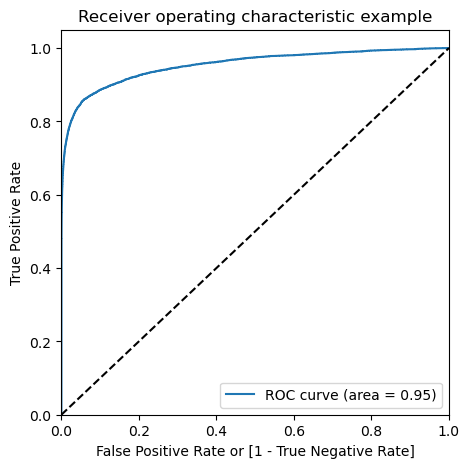

In [72]:
## Prediction on the train set
y_train_pred = logreg_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_pred_proba = logreg_imb_model_bestcv.predict_proba(X_train)[:,1]

## Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### **Model Evaluation**

F1 Score: 64.01%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.92      0.49      0.64      1930

    accuracy                           1.00    370479
   macro avg       0.96      0.75      0.82    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix 
 [[368465     84]
 [   982    948]]


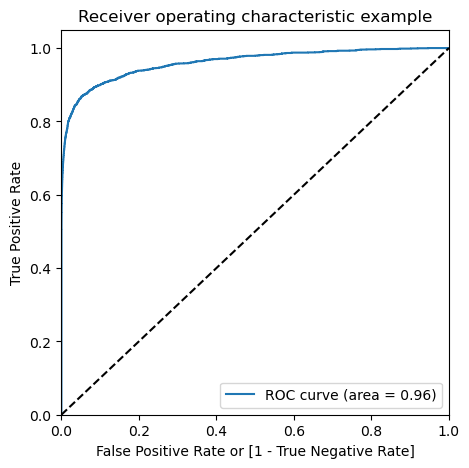

In [73]:
##Evaluating the model on the test set
y_test_pred = logreg_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = logreg_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 95%
- Recall = 47%
- Precesion = 91%
- F1 score = 62%

#### **Test set**
- ROC AUC score = 96%
- Recall = 49%
- Precesion = 92%
- F1 score = 64%

## **Decesion Tree**

In [74]:
## Gridsearch for hyperparam tuning
dt_imb_model_cv = GridSearchCV(estimator=dt,
                               param_grid=dt_params,
                               scoring='roc_auc',
                               cv=k_folds,
                               n_jobs=-1,
                               verbose=1)

## model training
dt_imb_model_cv.fit(X_train,y_train)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", dt_imb_model_cv.best_score_)
print("Best hyperparameters: ",dt_imb_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best roc auc score :  0.9840200515891445
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=150, min_samples_split=50,
                       random_state=0)


In [75]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_imb_model_cv.best_params_.items()))
max_depth = list(dt_imb_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_imb_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_imb_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 150), ('min_samples_split', 50)]
15
150
50


In [76]:
## Decision Tree with optimal hyperparameters

dt_imb_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

# training best model
dt_imb_model_bestcv.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=150, min_samples_split=50,
                       random_state=0)

### **Model Prediction**

F1 Score: 82.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       0.93      0.75      0.83      7721

    accuracy                           1.00   1481915
   macro avg       0.96      0.87      0.91   1481915
weighted avg       1.00      1.00      1.00   1481915

Confusion Matrix 
 [[1473757     437]
 [   1943    5778]]


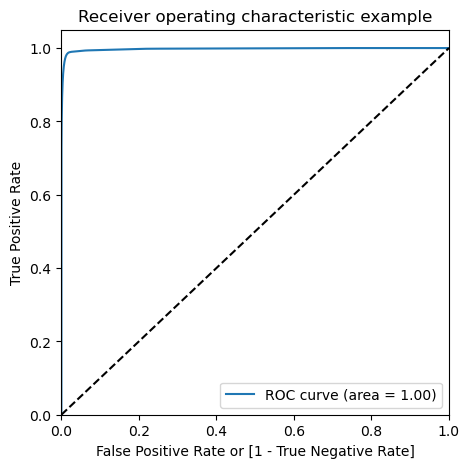

In [77]:
## Prediction on the train set
y_train_pred = dt_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = dt_imb_model_bestcv.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### **Model Evaluation**

F1 Score: 82.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.93      0.75      0.83      1930

    accuracy                           1.00    370479
   macro avg       0.96      0.87      0.91    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix 
 [[368439    110]
 [   490   1440]]


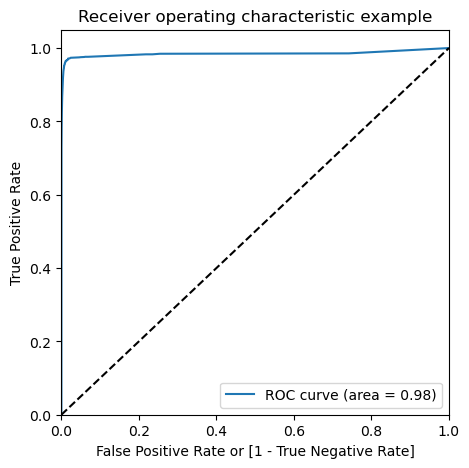

In [78]:
## Evaluating the model on the test set
y_test_pred = dt_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = dt_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 75%
- Precesion = 93%
- F1 score = 83%

#### **Test set**
- ROC AUC score = 98%
- Recall = 75%
- Precesion = 93%
- F1 score = 83%

## **Random Forest**

In [79]:
## Gridsearch for hyperparam tuning
rf_imb_model_cv = GridSearchCV(estimator=rf,
                               param_grid=rf_params,
                               scoring='roc_auc',
                               cv=k_folds,
                               n_jobs=-1,
                               verbose=1,
                               return_train_score=True)

## model training
rf_imb_model_cv.fit(X_train,y_train)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", rf_imb_model_cv.best_score_)
print("Best hyperparameters: ",rf_imb_model_cv.best_estimator_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

Best roc auc score :  0.9931823359930463
Best hyperparameters:  RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=0)


In [80]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(rf_imb_model_cv.best_params_.items()))
max_depth = list(rf_imb_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(rf_imb_model_cv.best_params_.items())[1][1]
min_samples_split =list(rf_imb_model_cv.best_params_.items())[2][1]
n_estimators =list(rf_imb_model_cv.best_params_.items())[3][1]

print(max_depth)
print(min_samples_leaf)
print(min_samples_split)
print(n_estimators)

best parameters: [('max_depth', 20), ('min_samples_leaf', 50), ('min_samples_split', 50), ('n_estimators', 10)]
20
50
50
10


In [81]:
## Random Forest with optimal hyperparameters

rf_imb_model_bestcv = RandomForestClassifier(criterion = "gini",
                                  random_state = 0,
                                  n_jobs=-1,
                                  max_depth=max_depth,
                                  verbose=1,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split,
                                  n_estimators=n_estimators)

# training best model
rf_imb_model_bestcv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.3s finished


RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=0, verbose=1)

### **Model Prediction**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.6s finished


F1 Score: 78.63%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       0.98      0.66      0.79      7721

    accuracy                           1.00   1481915
   macro avg       0.99      0.83      0.89   1481915
weighted avg       1.00      1.00      1.00   1481915

Confusion Matrix 
 [[1474099      95]
 [   2657    5064]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.6s finished


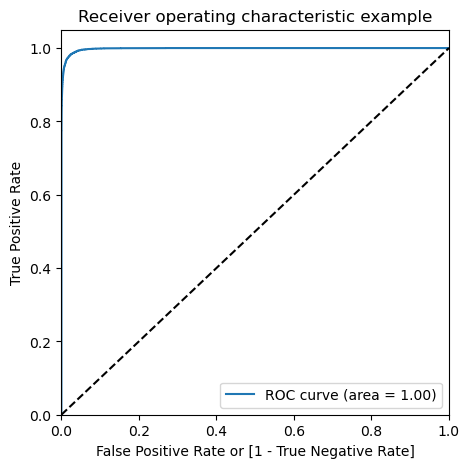

In [82]:
## Prediction on the train set
y_train_pred = rf_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = rf_imb_model_bestcv.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### **Model Evaluation**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished


F1 Score: 78.04%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.98      0.65      0.78      1930

    accuracy                           1.00    370479
   macro avg       0.99      0.82      0.89    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix 
 [[368524     25]
 [   679   1251]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished


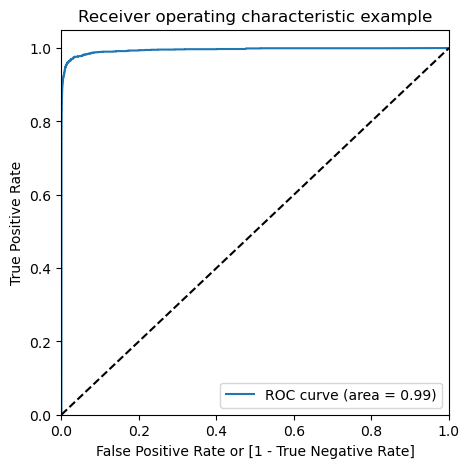

In [83]:
## Evaluating the model on the test set
y_test_pred = rf_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = rf_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 66%
- Precesion = 98%
- F1 score = 79%

#### **Test set**
- ROC AUC score = 99%
- Recall = 65%
- Precesion = 98%
- F1 score = 78%

## **XGBoost**

In [84]:
## Gridsearch for hyperparam tuning
xgb_imb_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_params,
                                      scoring='roc_auc',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_imb_model_cv.fit(X_train, y_train)

# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_imb_model_cv.best_score_)
print("Best hyperparameters: ",xgb_imb_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best roc auc score :  0.9990990280021761
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [85]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_imb_model_cv.best_params_.items()))

learning_rate = list(xgb_imb_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_imb_model_cv.best_params_.items())[1][1]
subsample =list(xgb_imb_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.9)]
0.1
6
0.9


In [86]:
# Model with optimal hyperparameter
xgb_imb_model_bestcv = XGBClassifier(learning_rate = learning_rate,
                                     max_depth=max_depth,
                                     subsample=subsample,
                                     n_jobs=-1,
                                     objective='binary:logistic',
                                     tree_method='gpu_hist',
                                     n_estimators=200,
                                     random_state=0)


xgb_imb_model_bestcv.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### **Model Prediction**

F1 Score: 93.25%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       0.97      0.90      0.93      7721

    accuracy                           1.00   1481915
   macro avg       0.99      0.95      0.97   1481915
weighted avg       1.00      1.00      1.00   1481915

Confusion Matrix 
 [[1473985     209]
 [    794    6927]]


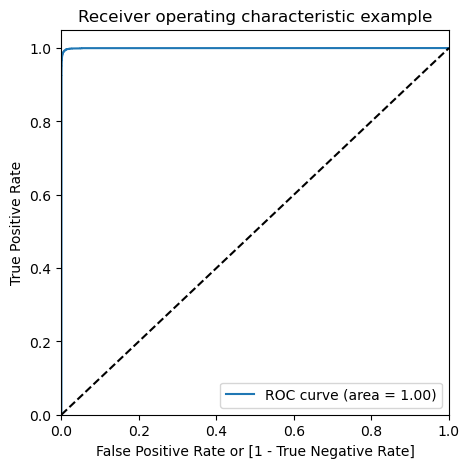

In [87]:
# Predicting on the train set
y_train_pred = xgb_imb_model_bestcv.predict(X_train)

# displaying F1 Score and classification report
display_scores(y_train, y_train_pred)

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = xgb_imb_model_bestcv.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### **Model Evaluation**

F1 Score: 90.55%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.95      0.86      0.91      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.93      0.95    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix 
 [[368463     86]
 [   262   1668]]


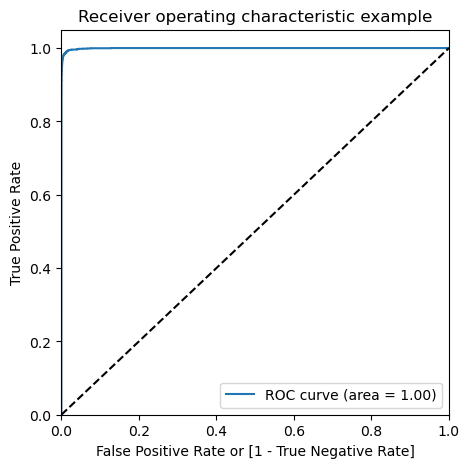

In [88]:
# model evaluation on test set
y_test_pred = xgb_imb_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

# confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = xgb_imb_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 90%
- Precesion = 97%
- F1 score = 93%

#### **Test set**
- ROC AUC score = 100%
- Recall = 86%
- Precesion = 95%
- F1 score = 91%

## **Model Building with Balance class**

**We will see follwoing three oversampling methods to balance the minority class**
- **Random Oversampling**
- **SMOTE**
- **ADASYN**

### **1: Random Oversampling**

In [71]:
# define oversampling strategy
random_oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_rndm, y_train_rndm = random_oversample.fit_resample(X_train, y_train)

In [90]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rndm))

Before sampling class distribution:- Counter({0: 1474194, 1: 7721})
New class distribution:- Counter({0: 1474194, 1: 1474194})


### **Logistic Regression**

In [91]:
## Gridsearch for hyperparam tuning
logreg_rndm_bal_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'recall',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_rndm_bal_model_cv.fit(X_train_rndm, y_train_rndm)

## Output of the evaluation result
print('Best recall score: ', logreg_rndm_bal_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_rndm_bal_model_cv.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  

Best recall score:  0.8856778681870743
Best hyperparameters:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


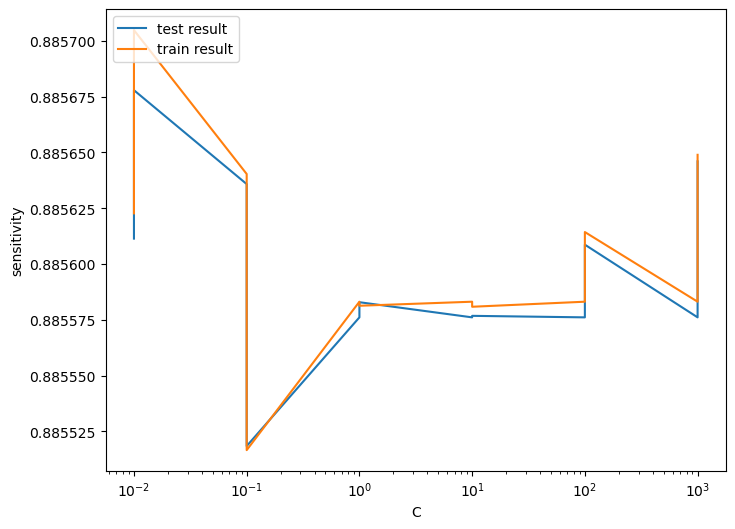

In [92]:
# cross validation results
cv_results = pd.DataFrame(logreg_rndm_bal_model_cv.cv_results_)

##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [93]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(logreg_rndm_bal_model_cv.best_params_.items()))

c_val = list(logreg_rndm_bal_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_rndm_bal_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_rndm_bal_model_cv.best_params_.items())[2][1]
solver_val = list(logreg_rndm_bal_model_cv.best_params_.items())[3][1]

print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 0.01), ('max_iter', 1000), ('penalty', 'l2'), ('solver', 'liblinear')]
0.01
1000
l2
liblinear


In [94]:
## Logistic Regression with optimal hyperparameters
logreg_rndm_bal_model_bestcv =linear_model.LogisticRegression(C=c_val,max_iter=mx_iter_val,penalty=penalty_val,solver=solver_val,n_jobs=-1,random_state=0)

## Fitting the model on train dataset
logreg_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

LogisticRegression(C=0.01, max_iter=1000, n_jobs=-1, random_state=0,
                   solver='liblinear')

### **Model Prediction**

F1 Score: 89.35%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90   1474194
           1       0.90      0.89      0.89   1474194

    accuracy                           0.89   2948388
   macro avg       0.89      0.89      0.89   2948388
weighted avg       0.89      0.89      0.89   2948388

Confusion Matrix 
 [[1331467  142727]
 [ 168659 1305535]]


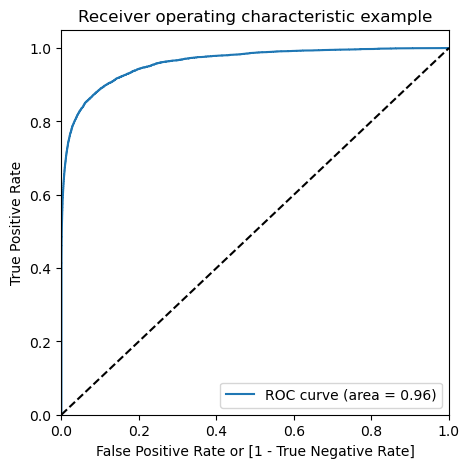

In [95]:
# Predicting on the train set
y_train_rndm_pred = logreg_rndm_bal_model_bestcv.predict(X_train_rndm)

# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_rndm_pred_proba = logreg_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

## Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

### **Model Evaluation**

F1 Score: 8.85%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    368549
           1       0.05      0.90      0.09      1930

    accuracy                           0.90    370479
   macro avg       0.52      0.90      0.52    370479
weighted avg       0.99      0.90      0.94    370479

Confusion Matrix 
 [[332864  35685]
 [   188   1742]]


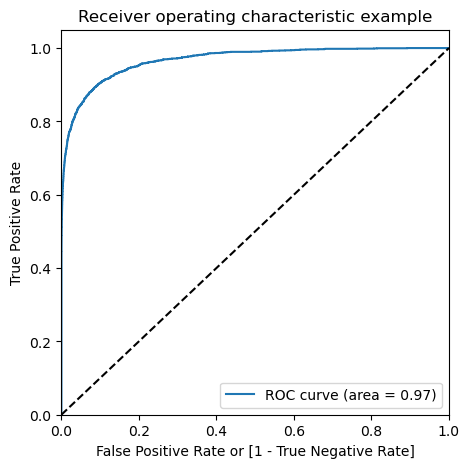

In [96]:
##Evaluating the model on the test set
y_test_rndm_pred = logreg_rndm_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = logreg_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]

## Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 96%
- Recall = 89%
- Precesion = 90%
- F1 score = 89%

#### **Test set**
- ROC AUC score = 97%
- Recall = 90%
- Precesion = 5%
- F1 score = 9%

### **Decesion Tree**

In [97]:
dt_rndm_bal_model_cv = GridSearchCV(estimator=dt,
                                    param_grid=dt_params,
                                    scoring='recall',
                                    cv=k_folds,
                                    n_jobs=-1,
                                    verbose=1)

## model training
dt_rndm_bal_model_cv.fit(X_train_rndm,y_train_rndm)

# Printing the optimal score and hyperparameters
print("Best recall score : ", dt_rndm_bal_model_cv.best_score_)
print("Best hyperparameters: ",dt_rndm_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best recall score :  0.9959435460341777
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=50,
                       random_state=0)


In [98]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_rndm_bal_model_cv.best_params_.items()))
max_depth = list(dt_rndm_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_rndm_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_rndm_bal_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 100), ('min_samples_split', 50)]
15
100
50


In [99]:
## Decision Tree with optimal hyperparameters

dt_rndm_bal_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

dt_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=50,
                       random_state=0)

### **Model Prediction**

F1 Score: 99.34%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1474194
           1       0.99      1.00      0.99   1474194

    accuracy                           0.99   2948388
   macro avg       0.99      0.99      0.99   2948388
weighted avg       0.99      0.99      0.99   2948388

Confusion Matrix 
 [[1460721   13473]
 [   6070 1468124]]


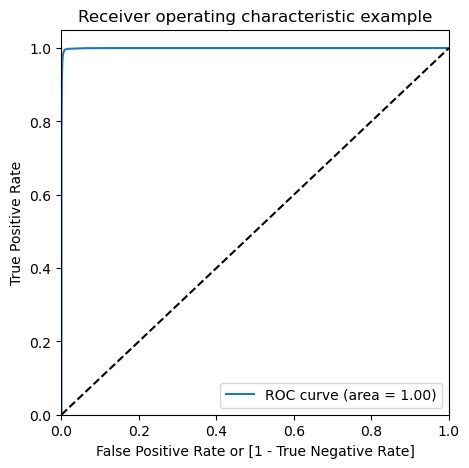

In [100]:
## Prediction on the train set
y_train_rndm_pred = dt_rndm_bal_model_bestcv.predict(X_train_rndm)

# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_rndm_pred_proba = dt_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

# Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

### **Model Evaluation**

F1 Score: 51.86%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    368549
           1       0.35      0.97      0.52      1930

    accuracy                           0.99    370479
   macro avg       0.68      0.98      0.76    370479
weighted avg       1.00      0.99      0.99    370479

Confusion Matrix 
 [[365120   3429]
 [    54   1876]]


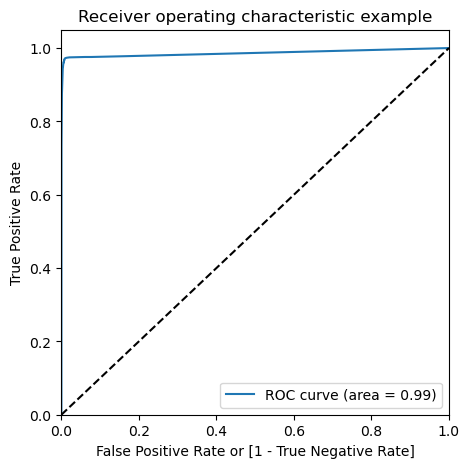

In [101]:
## Evaluating the model on the test set
y_test_rndm_pred = dt_rndm_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = dt_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 99%
- F1 score = 99%

#### **Test set**
- ROC AUC score = 99%
- Recall = 97%
- Precesion = 35%
- F1 score = 52%

## **Random Forest**

In [102]:
## Gridsearch for hyperparam tuning
rf_rndm_bal_model_cv = GridSearchCV(estimator=rf,
                                    param_grid=rf_params,
                                    scoring='recall',
                                    cv=k_folds,
                                    n_jobs=-1,
                                    verbose=1,
                                    return_train_score=True)

## model training
rf_rndm_bal_model_cv.fit(X_train_rndm, y_train_rndm)

# Printing the optimal score and hyperparameters
print("Best recall score : ", rf_rndm_bal_model_cv.best_score_)
print("Best hyperparameters: ",rf_rndm_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

Best recall score :  0.9989533266259907
Best hyperparameters:  RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=0)


In [103]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(rf_rndm_bal_model_cv.best_params_.items()))
max_depth = list(rf_rndm_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(rf_rndm_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(rf_rndm_bal_model_cv.best_params_.items())[2][1]
n_estimators =list(rf_rndm_bal_model_cv.best_params_.items())[3][1]

print(max_depth)
print(min_samples_leaf)
print(min_samples_split)
print(n_estimators)

best parameters: [('max_depth', 20), ('min_samples_leaf', 50), ('min_samples_split', 50), ('n_estimators', 10)]
20
50
50
10


In [104]:
## Random Forest with optimal hyperparameters

rf_rndm_bal_model_bestcv = RandomForestClassifier(criterion = "gini",
                                  random_state = 0,
                                  n_jobs=-1,
                                  max_depth=max_depth,
                                  verbose=1,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split,
                                  n_estimators=n_estimators)

# training best model
rf_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.9s finished


RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=0, verbose=1)

### **Model Prediction**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.7s finished


F1 Score: 99.7%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1474194
           1       0.99      1.00      1.00   1474194

    accuracy                           1.00   2948388
   macro avg       1.00      1.00      1.00   2948388
weighted avg       1.00      1.00      1.00   2948388

Confusion Matrix 
 [[1466573    7621]
 [   1296 1472898]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.6s finished


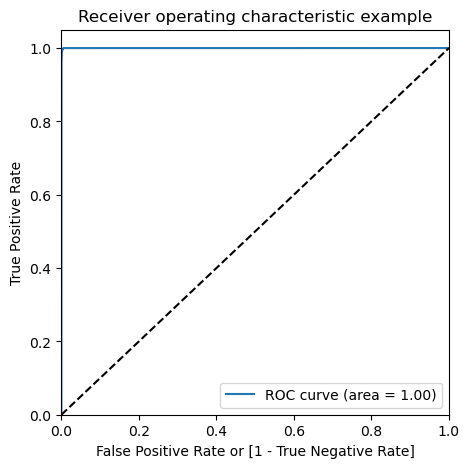

In [105]:
## Prediction on the train set
y_train_rndm_pred = rf_rndm_bal_model_bestcv.predict(X_train_rndm)


# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_rndm_pred_proba = rf_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

# Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

### **Model Evaluation**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished


F1 Score: 63.71%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    368549
           1       0.48      0.95      0.64      1930

    accuracy                           0.99    370479
   macro avg       0.74      0.97      0.82    370479
weighted avg       1.00      0.99      1.00    370479

Confusion Matrix 
 [[366541   2008]
 [    89   1841]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished


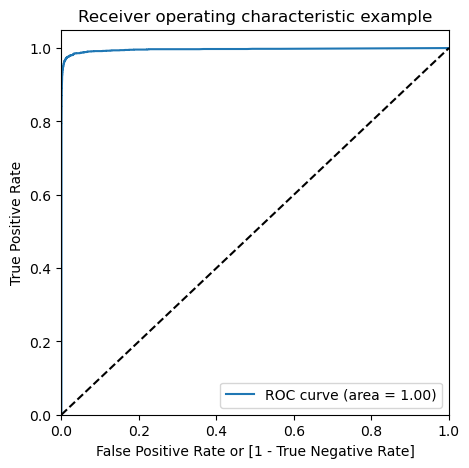

In [106]:
## Evaluating the model on the test set
y_test_rndm_pred = rf_rndm_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = rf_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 99%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 95%
- Precesion = 48%
- F1 score = 64%

## **XGBoost**

In [72]:
## Gridsearch for hyperparam tuning
xgb_rndm_bal_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_params,
                                      scoring='recall',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_rndm_bal_model_cv.fit(X_train_rndm, y_train_rndm)


# Printing the optimal score and hyperparameters
print("Best recall score : ", xgb_rndm_bal_model_cv.best_score_)
print('Best hyperparameters: ',xgb_rndm_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best recall score :  0.9999443764601179
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [73]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_rndm_bal_model_cv.best_params_.items()))

learning_rate = list(xgb_rndm_bal_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_rndm_bal_model_cv.best_params_.items())[1][1]
subsample =list(xgb_rndm_bal_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.3)]
0.1
6
0.3


In [74]:
# Model with optimal hyperparameter

xgb_rndm_bal_model_bestcv = XGBClassifier(learning_rate = learning_rate,
                                          max_depth=max_depth,
                                          subsample=subsample,
                                          n_jobs=-1,
                                          objective='binary:logistic',
                                          tree_method='gpu_hist',
                                          n_estimators=200,
                                          random_state=0)


xgb_rndm_bal_model_bestcv.fit(X_train_rndm, y_train_rndm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### **Model Prediction**

F1 Score: 99.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       1.00      1.00      1.00   1474194

    accuracy                           1.00   2948388
   macro avg       1.00      1.00      1.00   2948388
weighted avg       1.00      1.00      1.00   2948388

Confusion Matrix 
 [[1467376    6818]
 [    358 1473836]]


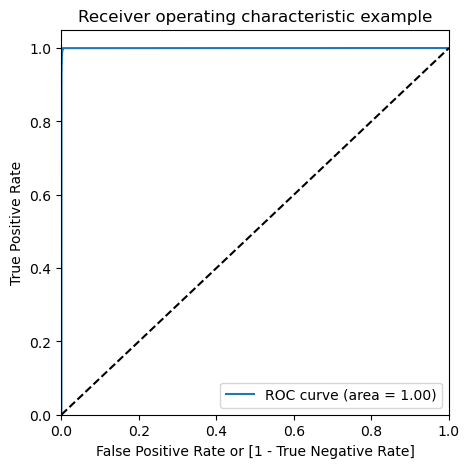

In [75]:
# Predicting on the train set
y_train_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_train_rndm)

# displaying F1 Score and classification report
display_scores(y_train_rndm, y_train_rndm_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_rndm_pred_proba = xgb_rndm_bal_model_bestcv.predict_proba(X_train_rndm)[:,1]

# Plot the ROC curve
draw_roc(y_train_rndm, y_train_rndm_pred_proba)

### **Model Evaluation**

F1 Score: 68.28%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.52      0.98      0.68      1930

    accuracy                           1.00    370479
   macro avg       0.76      0.99      0.84    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix 
 [[366839   1710]
 [    43   1887]]


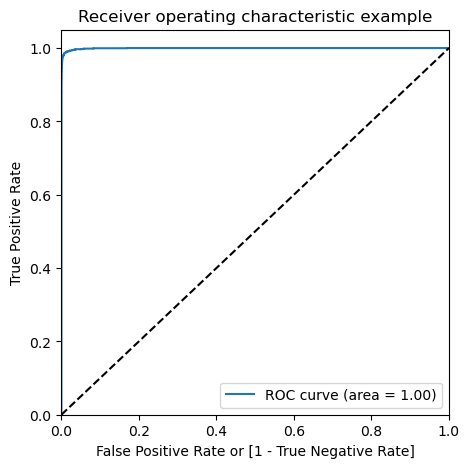

In [76]:
# model evaluation on test set
y_test_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_rndm_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_rndm_pred_proba = xgb_rndm_bal_model_bestcv.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_rndm_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 100%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 98%
- Precesion = 53%
- F1 score = 69%

## **2: SMOTE Oversampling**

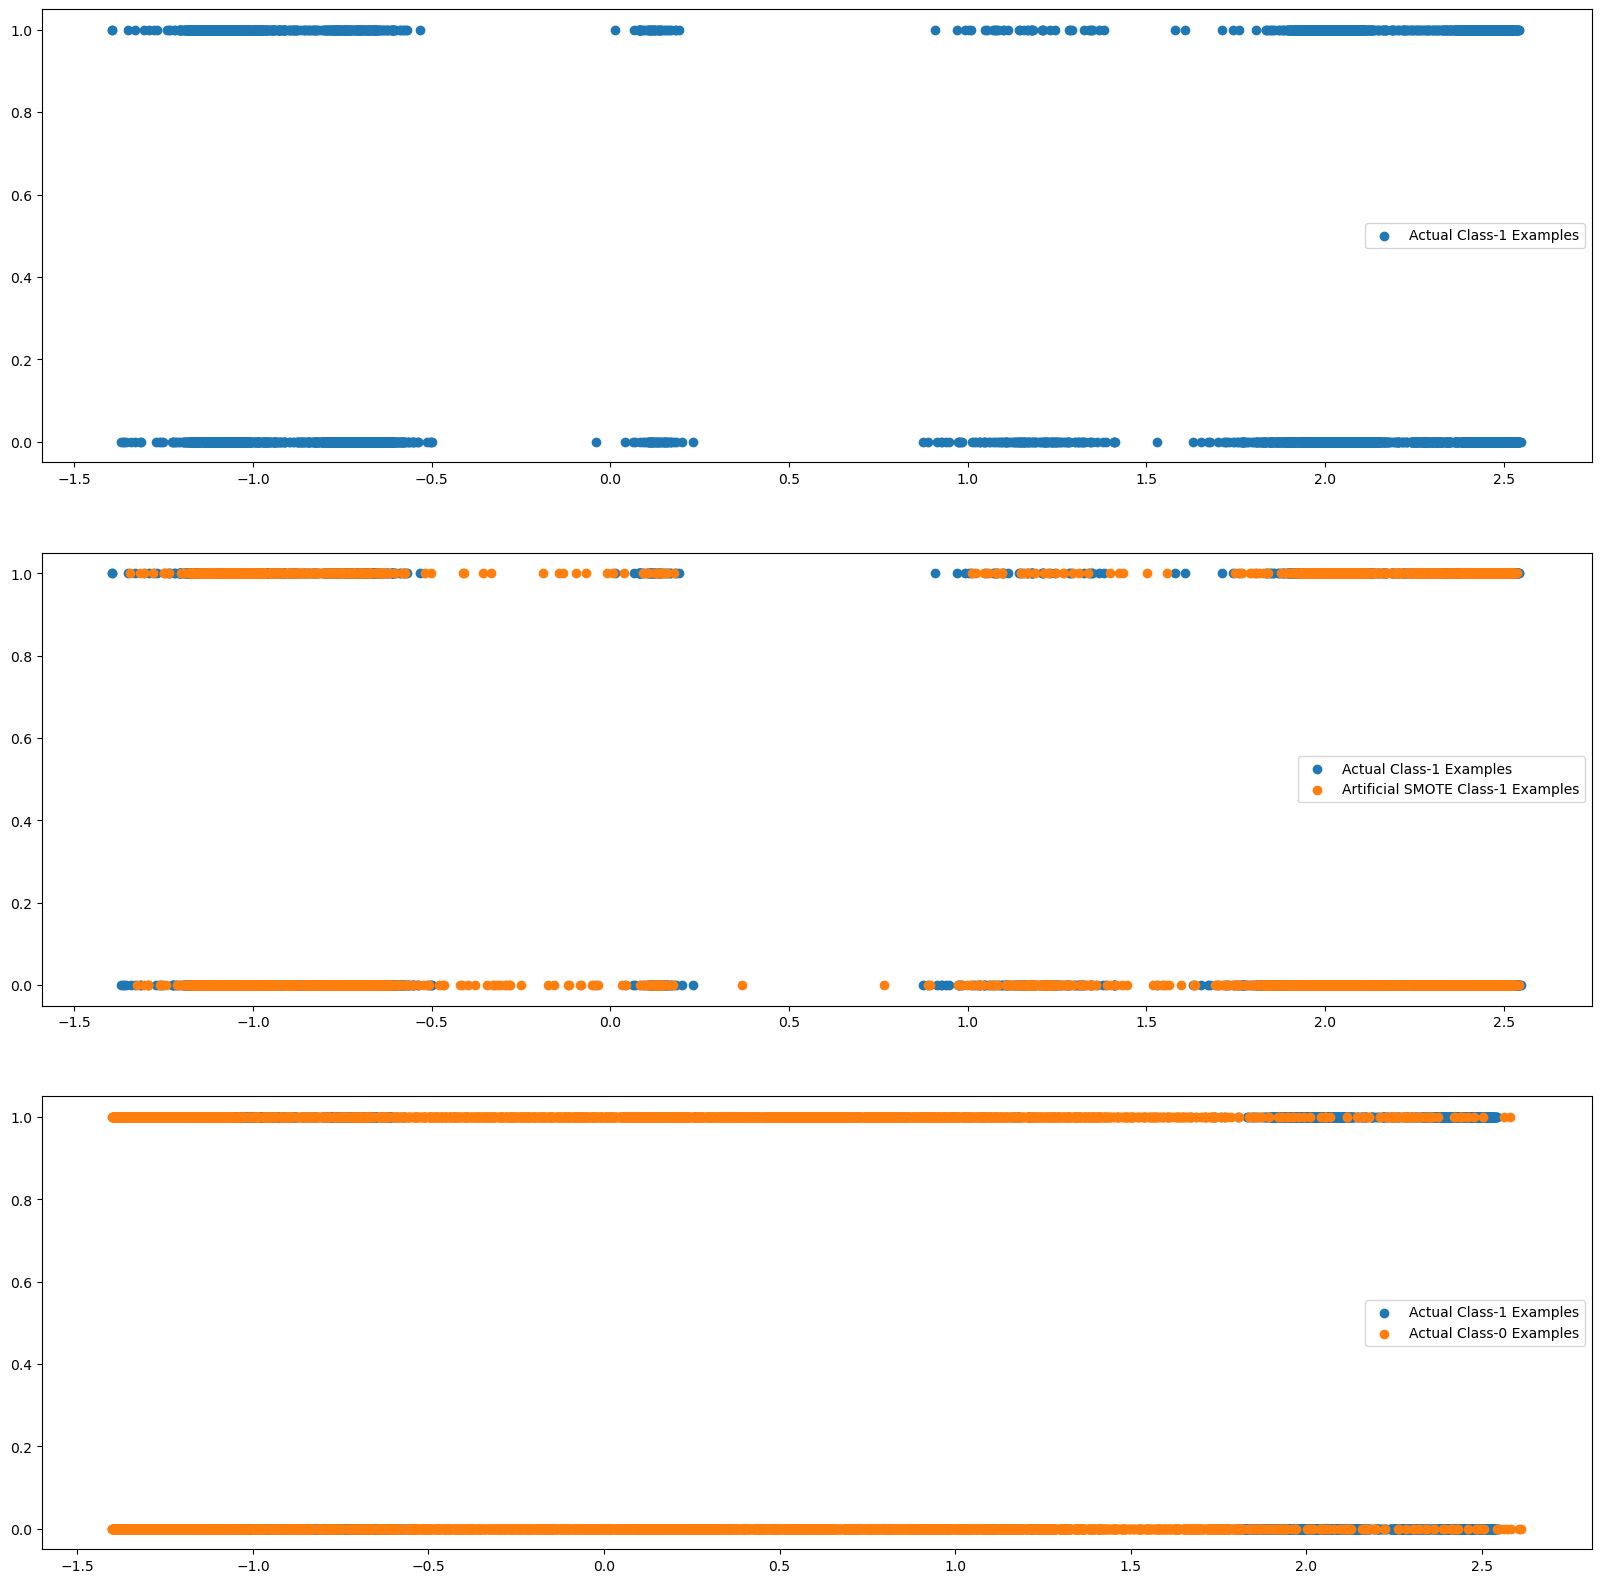

In [112]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **Logistic Regression**

In [113]:
## Gridsearch for hyperparam tuning
logreg_smote_bal_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'recall',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_smote_bal_model_cv.fit(X_train_smote, y_train_smote)

## Output of the evaluation result
print('Best recall score: ', logreg_smote_bal_model_cv.best_score_)
## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_smote_bal_model_cv.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  

Best recall score:  0.9432232123974192
Best hyperparameters:  {'C': 1000, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


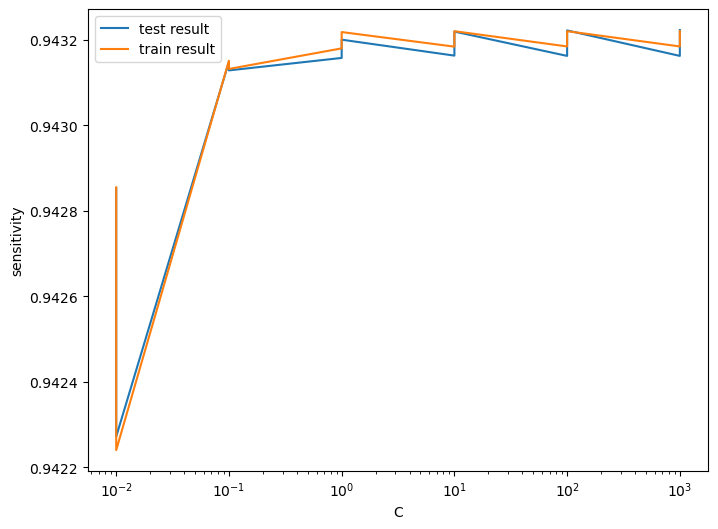

In [114]:
#cross validation results
cv_results = pd.DataFrame(logreg_smote_bal_model_cv.cv_results_)

##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [115]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(logreg_smote_bal_model_cv.best_params_.items()))

c_val = list(logreg_smote_bal_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_smote_bal_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_smote_bal_model_cv.best_params_.items())[2][1]
solver_val = list(logreg_smote_bal_model_cv.best_params_.items())[3][1]


print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 1000), ('max_iter', 1000), ('penalty', 'l2'), ('solver', 'liblinear')]
1000
1000
l2
liblinear


In [116]:
## Logistic Regression with optimal hyperparameters
logreg_smote_bal_model_bestcv =linear_model.LogisticRegression(C=c_val,
                                                               max_iter=mx_iter_val,
                                                               penalty=penalty_val,
                                                               solver=solver_val,
                                                               n_jobs=-1,
                                                               random_state=0)

## Fitting the model on train dataset
logreg_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, random_state=0,
                   solver='liblinear')

### **Model Prediction**

F1 Score: 94.24%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94   1474194
           1       0.94      0.94      0.94   1474194

    accuracy                           0.94   2948388
   macro avg       0.94      0.94      0.94   2948388
weighted avg       0.94      0.94      0.94   2948388

Confusion Matrix 
 [[1387799   86395]
 [  83703 1390491]]


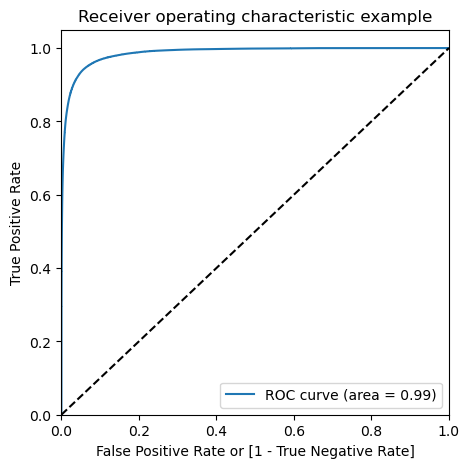

In [117]:
# Predicting on the train set
y_train_smote_pred = logreg_smote_bal_model_bestcv.predict(X_train_smote)

# displaying F1 Score and classification report
display_scores(y_train_smote, y_train_smote_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_smote_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_smote_pred_proba = logreg_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

## Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba)

### **Model Evaluation**

F1 Score: 11.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    368549
           1       0.06      0.77      0.12      1930

    accuracy                           0.94    370479
   macro avg       0.53      0.85      0.54    370479
weighted avg       0.99      0.94      0.96    370479

Confusion Matrix 
 [[346829  21720]
 [   453   1477]]


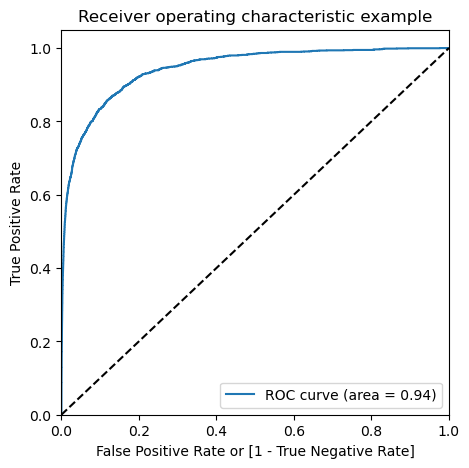

In [118]:
##Evaluating the model on the test set
y_test_smote_pred = logreg_smote_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_smote_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = logreg_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

## Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 99%
- Recall = 94%
- Precesion = 94%
- F1 score = 94%

#### **Test set**
- ROC AUC score = 94%
- Recall = 77%
- Precesion = 6%
- F1 score = 12%

### **Decesion Tree**

In [119]:
## Gridsearch for hyperparam tuning
dt_smote_bal_model_cv = GridSearchCV(estimator=dt,
                                     param_grid=dt_params,
                                     scoring='recall',
                                     cv=k_folds,
                                     n_jobs=-1,
                                     verbose=1)

## model training
dt_smote_bal_model_cv.fit(X_train_smote,y_train_smote)

# Printing the optimal score and hyperparameters
print("Best recall score : ", dt_smote_bal_model_cv.best_score_)
print('Best hyperparameters: ',dt_smote_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best recall score :  0.988244424179797
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)


In [120]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_smote_bal_model_cv.best_params_.items()))
max_depth = list(dt_smote_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_smote_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_smote_bal_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 50), ('min_samples_split', 50)]
15
50
50


In [121]:
## Decision Tree with optimal hyperparameters

dt_smote_bal_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

dt_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)

### **Model Prediction**

F1 Score: 99.0%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1474194
           1       0.99      0.99      0.99   1474194

    accuracy                           0.99   2948388
   macro avg       0.99      0.99      0.99   2948388
weighted avg       0.99      0.99      0.99   2948388

Confusion Matrix 
 [[1459167   15027]
 [  14377 1459817]]


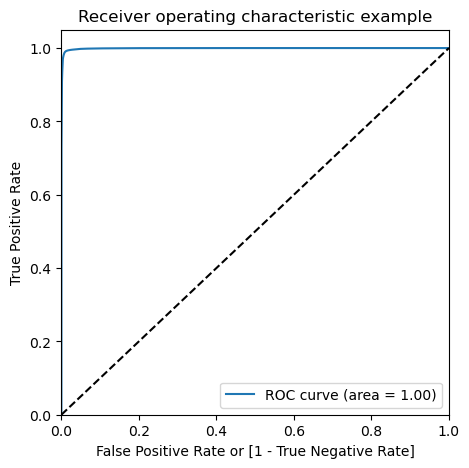

In [122]:
## Prediction on the train set
y_train_smote_pred = dt_smote_bal_model_bestcv.predict(X_train_smote)

# displaying F1 Score and classification report
display_scores(y_train_smote, y_train_smote_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_smote_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_smote_pred_proba = dt_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba)

### **Model Evaluation**

F1 Score: 48.8%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    368549
           1       0.33      0.96      0.49      1930

    accuracy                           0.99    370479
   macro avg       0.66      0.98      0.74    370479
weighted avg       1.00      0.99      0.99    370479

Confusion Matrix 
 [[364726   3823]
 [    73   1857]]


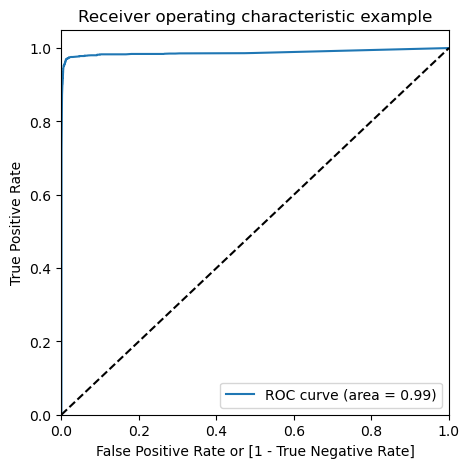

In [123]:
## Evaluating the model on the test set
y_test_smote_pred = dt_smote_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_smote_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = dt_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 99%
- Precesion = 99%
- F1 score = 99%

#### **Test set**
- ROC AUC score = 99%
- Recall = 96%
- Precesion = 33%
- F1 score = 49%

## **Random Forest**

In [124]:
## Gridsearch for hyperparam tuning
rf_smote_bal_model_cv = GridSearchCV(estimator=rf,
                                     param_grid=rf_params,
                                     scoring='recall',
                                     cv=k_folds,
                                     n_jobs=-1,
                                     verbose=1,
                                     return_train_score=True)

## model training
rf_smote_bal_model_cv.fit(X_train_smote,y_train_smote)

# Printing the optimal score and hyperparameters
print("Best recall score : ", rf_smote_bal_model_cv.best_score_)
print("Best hyperparameters: ",rf_smote_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

Best recall score :  0.9863145548868291
Best hyperparameters:  RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=0)


In [125]:
## Random Forest with optimal hyperparameters

rf_smote_bal_model_bestcv = RandomForestClassifier(criterion = "gini",
                                  random_state = 0,
                                  n_jobs=-1,
                                  max_depth=max_depth,
                                  verbose=1,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split,
                                  n_estimators=n_estimators)

# training best model
rf_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.3s finished


RandomForestClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=0, verbose=1)

### **Model Prediction**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.4s finished


F1 Score: 98.56%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99   1474194
           1       0.99      0.98      0.99   1474194

    accuracy                           0.99   2948388
   macro avg       0.99      0.99      0.99   2948388
weighted avg       0.99      0.99      0.99   2948388

Confusion Matrix 
 [[1459646   14548]
 [  27843 1446351]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.3s finished


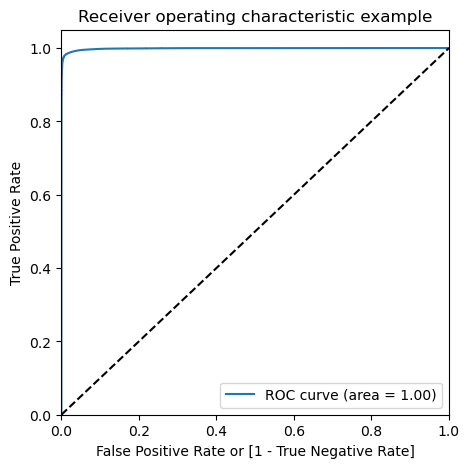

In [126]:
## Prediction on the train set
y_train_pred = rf_smote_bal_model_bestcv.predict(X_train_smote)

# displaying F1 Score and classification report
display_scores(y_train_smote, y_train_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = rf_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

### **Model Evaluation**

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished


F1 Score: 48.74%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    368549
           1       0.33      0.95      0.49      1930

    accuracy                           0.99    370479
   macro avg       0.66      0.97      0.74    370479
weighted avg       1.00      0.99      0.99    370479

Confusion Matrix 
 [[364766   3783]
 [    89   1841]]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished


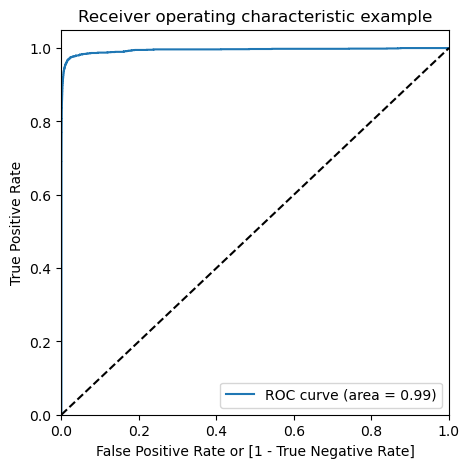

In [127]:
## Evaluating the model on the test set
y_test_pred = rf_smote_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = rf_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 98%
- Precesion = 99%
- F1 score = 99%

#### **Test set**
- ROC AUC score = 99%
- Recall = 95%
- Precesion = 33%
- F1 score = 49%

## **XGBoost**

In [128]:
## Gridsearch for hyperparam tuning
xgb_smote_bal_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_params,
                                      scoring='recall',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_smote_bal_model_cv.fit(X_train_smote, y_train_smote)


# Printing the optimal score and hyperparameters
print("Best recall score : ", xgb_smote_bal_model_cv.best_score_)
print('Best hyperparameters: ',xgb_smote_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best recall score :  0.9975410292208466
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [129]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_smote_bal_model_cv.best_params_.items()))

learning_rate = list(xgb_smote_bal_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_smote_bal_model_cv.best_params_.items())[1][1]
subsample =list(xgb_smote_bal_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.6)]
0.1
6
0.6


In [130]:
# Model with optimal hyperparameter
xgb_smote_bal_model_bestcv = XGBClassifier(learning_rate = learning_rate,
                                           max_depth=max_depth,
                                           subsample=subsample,
                                           n_jobs=-1,
                                           random_state=0,
                                           objective='binary:logistic',
                                           n_estimators=200,
                                           tree_method='gpu_hist')


xgb_smote_bal_model_bestcv.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### **Model Prediction**

F1 Score: 99.72%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1474194
           1       1.00      1.00      1.00   1474194

    accuracy                           1.00   2948388
   macro avg       1.00      1.00      1.00   2948388
weighted avg       1.00      1.00      1.00   2948388

Confusion Matrix 
 [[1469182    5012]
 [   3350 1470844]]


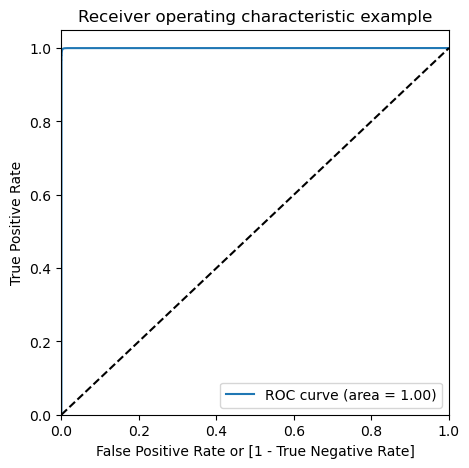

In [131]:
# Predicting on the train set
y_train_smote_pred = xgb_smote_bal_model_bestcv.predict(X_train_smote)

# displaying F1 Score and classification report
display_scores(y_train_smote, y_train_smote_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_smote, y_train_smote_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_smote_pred_proba = xgb_smote_bal_model_bestcv.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba)

### **Model Evaluation**

F1 Score: 71.75%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.57      0.96      0.72      1930

    accuracy                           1.00    370479
   macro avg       0.79      0.98      0.86    370479
weighted avg       1.00      1.00      1.00    370479

Confusion Matrix 
 [[367181   1368]
 [    85   1845]]


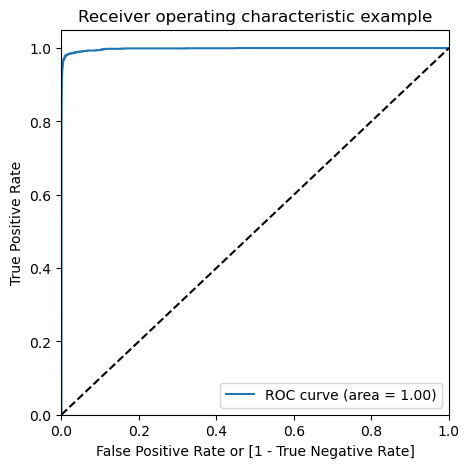

In [132]:
# model evaluation on test set
y_test_smote_pred = xgb_smote_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_smote_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_smote_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_smote_pred_proba = xgb_smote_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 100%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 96%
- Precesion = 57%
- F1 score = 72%

## **3: ADASYN Oversampling**

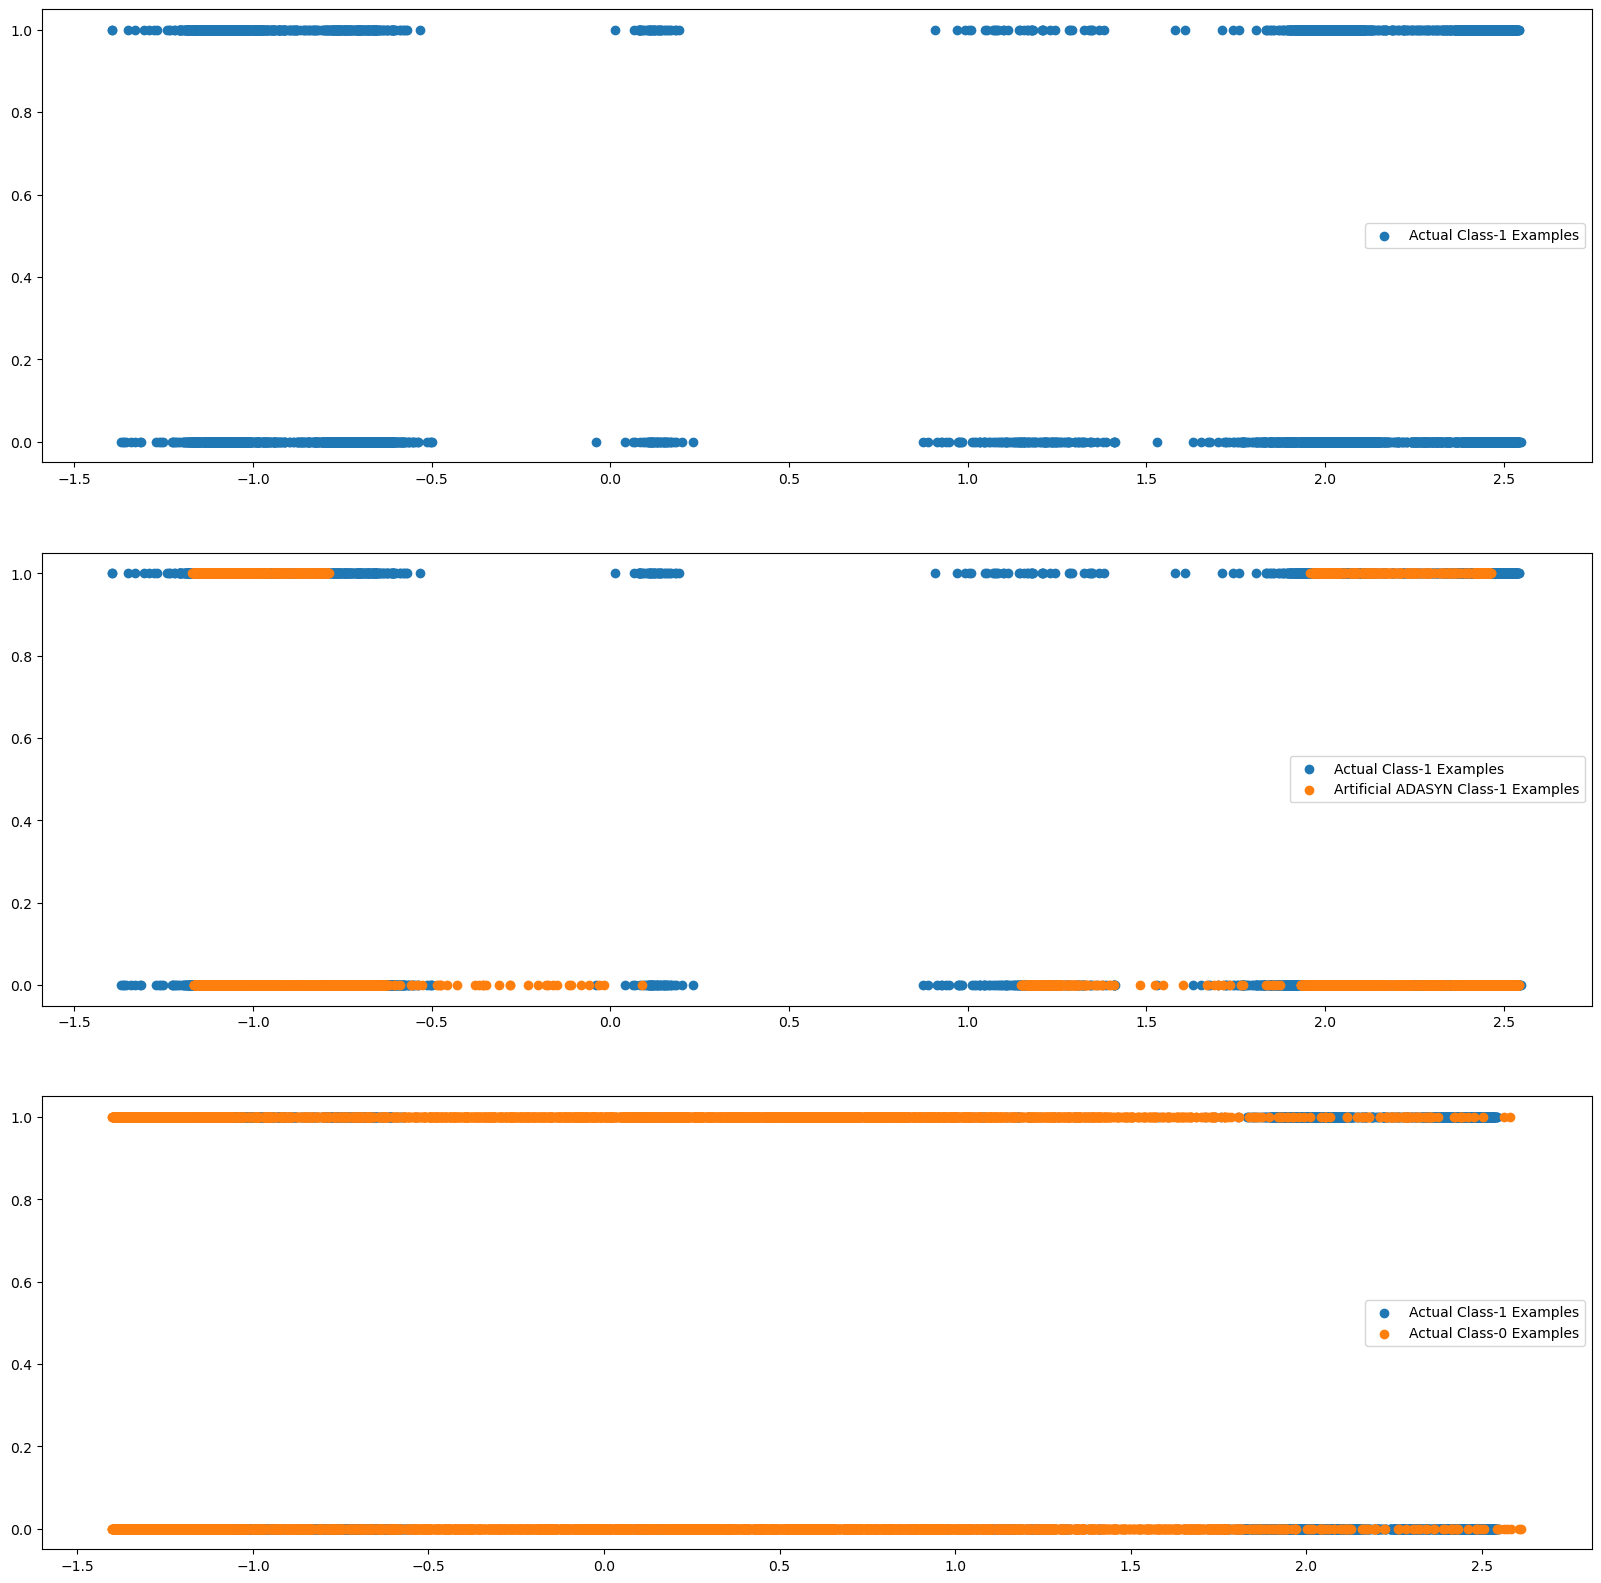

In [47]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### **1: Logistic Regression**

In [51]:
## Gridsearch for hyperparam tuning
logreg_adasyn_bal_model_cv = GridSearchCV(estimator = logreg,
                        param_grid = logreg_params,
                        scoring= 'recall',
                        cv = k_folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)


## model training
logreg_adasyn_bal_model_cv.fit(X_train_adasyn, y_train_adasyn)

## Output of the evaluation result
print('Best recall score: ', logreg_adasyn_bal_model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', logreg_adasyn_bal_model_cv.best_params_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best recall score:  0.9249171207290108
Best hyperparameters:  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


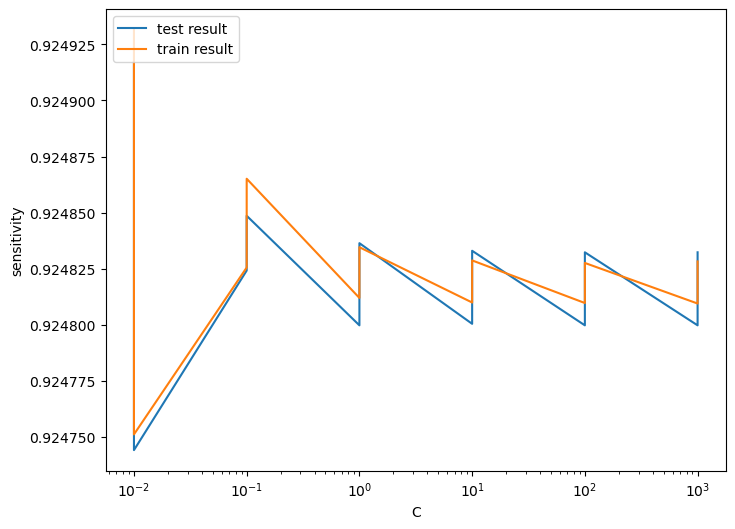

In [52]:
# cross validation results
cv_results = pd.DataFrame(logreg_adasyn_bal_model_cv.cv_results_)

##Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [53]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(logreg_adasyn_bal_model_cv.best_params_.items()))

c_val = list(logreg_adasyn_bal_model_cv.best_params_.items())[0][1]
mx_iter_val =list(logreg_adasyn_bal_model_cv.best_params_.items())[1][1]
penalty_val =list(logreg_adasyn_bal_model_cv.best_params_.items())[2][1]
solver_val = list(logreg_adasyn_bal_model_cv.best_params_.items())[3][1]


print(c_val)
print(mx_iter_val)
print(penalty_val)
print(solver_val)

best parameters: [('C', 0.01), ('max_iter', 1000), ('penalty', 'l1'), ('solver', 'liblinear')]
0.01
1000
l1
liblinear


In [54]:
## Logistic Regression with optimal hyperparameters
logreg_adasyn_bal_model_bestcv =linear_model.LogisticRegression(C=c_val,
                                                                max_iter=mx_iter_val,
                                                                penalty=penalty_val,
                                                                solver=solver_val,
                                                                n_jobs=-1,
                                                                random_state=0)

## Fitting the model on train dataset
logreg_adasyn_bal_model_bestcv.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.01, max_iter=1000, n_jobs=-1, penalty='l1',
                   random_state=0, solver='liblinear')

### **Model Prediction**

F1 Score: 91.82%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92   1474194
           1       0.91      0.92      0.92   1473838

    accuracy                           0.92   2948032
   macro avg       0.92      0.92      0.92   2948032
weighted avg       0.92      0.92      0.92   2948032

Confusion Matrix 
 [[1342070  132124]
 [ 110624 1363214]]


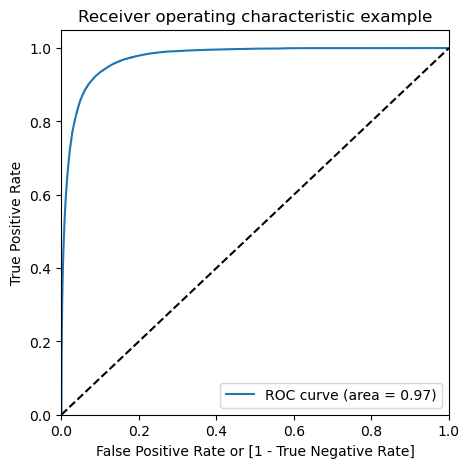

In [55]:
# ## Prediction on the train set
y_train_adasyn_pred = logreg_adasyn_bal_model_bestcv.predict(X_train_adasyn)

# displaying F1 Score and classification report
display_scores(y_train_adasyn, y_train_adasyn_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_train)

## Predicted probability
y_train_adasyn_pred_proba = logreg_adasyn_bal_model_bestcv.predict_proba(X_train_adasyn)[:,1]

## Plot the ROC curve
draw_roc(y_train_adasyn, y_train_adasyn_pred_proba)

### **Model Evaluation**

F1 Score: 8.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    368549
           1       0.04      0.78      0.08      1930

    accuracy                           0.91    370479
   macro avg       0.52      0.84      0.52    370479
weighted avg       0.99      0.91      0.95    370479

Confusion Matrix 
 [[335391  33158]
 [   427   1503]]


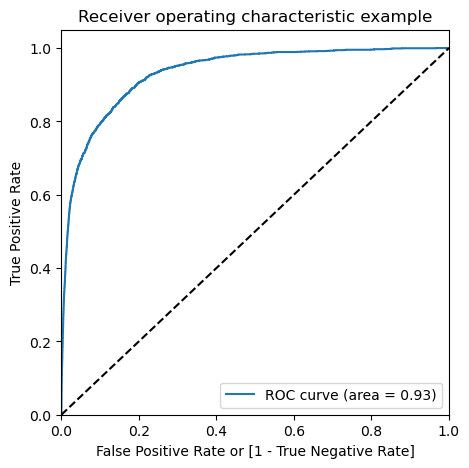

In [56]:
##Evaluating the model on the test set
y_test_adasyn_pred = logreg_adasyn_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

## Predicted probability
y_test_adasyn_pred_proba = logreg_adasyn_bal_model_bestcv.predict_proba(X_test)[:,1]

## Plot the ROC curve
draw_roc(y_test, y_test_adasyn_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 97%
- Recall = 92%
- Precesion = 91%
- F1 score = 92%

#### **Test set**
- ROC AUC score = 93%
- Recall = 78%
- Precesion = 4%
- F1 score = 8%

## **2: Decesion Tree**

In [57]:
## Gridsearch for hyperparam tuning
dt_adasyn_bal_model_cv = GridSearchCV(estimator=dt,
                                      param_grid=dt_params,
                                      scoring='recall',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1)

## model training
dt_adasyn_bal_model_cv.fit(X_train_adasyn,y_train_adasyn)

# Printing the optimal roc score and hyperparameters
print("Best recall score : ", dt_adasyn_bal_model_cv.best_score_)
print('Best hyperparameters: ',dt_adasyn_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best recall score :  0.9820190553548713
Best hyperparameters:  DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)


In [58]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(dt_adasyn_bal_model_cv.best_params_.items()))
max_depth = list(dt_adasyn_bal_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(dt_adasyn_bal_model_cv.best_params_.items())[1][1]
min_samples_split =list(dt_adasyn_bal_model_cv.best_params_.items())[2][1]


print(max_depth)
print(min_samples_leaf)
print(min_samples_split)

best parameters: [('max_depth', 15), ('min_samples_leaf', 50), ('min_samples_split', 50)]
15
50
50


In [59]:
# Model with optimal hyperparameters
dt_adasyn_bal_model_bestcv = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 0,
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)

dt_adasyn_bal_model_bestcv.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50,
                       random_state=0)

### **Model Prediction**

F1 Score: 98.21%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98   1474194
           1       0.98      0.98      0.98   1473838

    accuracy                           0.98   2948032
   macro avg       0.98      0.98      0.98   2948032
weighted avg       0.98      0.98      0.98   2948032

Confusion Matrix 
 [[1446064   28130]
 [  24774 1449064]]


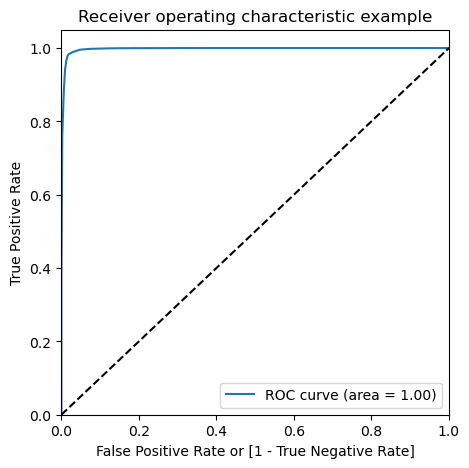

In [60]:
# ## Prediction on the train set
y_train_adasyn_pred = dt_adasyn_bal_model_bestcv.predict(X_train_adasyn)

# displaying F1 Score and classification report
display_scores(y_train_adasyn, y_train_adasyn_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_adasyn_pred_proba = dt_adasyn_bal_model_bestcv.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_adasyn_pred_proba)

### **Model Evaluation**

F1 Score: 34.26%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    368549
           1       0.21      0.97      0.34      1930

    accuracy                           0.98    370479
   macro avg       0.60      0.98      0.67    370479
weighted avg       1.00      0.98      0.99    370479

Confusion Matrix 
 [[361423   7126]
 [    58   1872]]


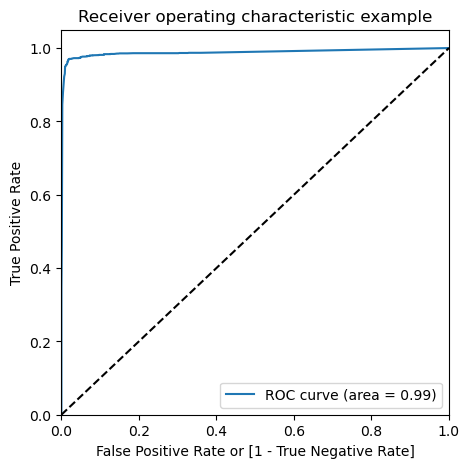

In [61]:
# Evaluating model on the test data
y_test_adasyn_pred = dt_adasyn_bal_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_adasyn_pred_proba = dt_adasyn_bal_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_adasyn_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 98%
- Precesion = 98%
- F1 score = 98%

#### **Test set**
- ROC AUC score = 99%
- Recall = 97%
- Precesion = 21%
- F1 score = 34%

## **3: Random Forest**

In [62]:
## Gridsearch for hyperparam tuning
rf_bal_adasyn_model_cv = GridSearchCV(estimator=rf,
                                      param_grid=rf_params,
                                      scoring='recall',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

## model training
rf_bal_adasyn_model_cv.fit(X_train_adasyn,y_train_adasyn)

# Printing the optimal score and hyperparameters
print("Best recall score : ", rf_bal_adasyn_model_cv.best_score_)
print("Best hyperparameters: ",rf_bal_adasyn_model_cv.best_estimator_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of Sci

Best recall score :  0.9863309262923379
Best hyperparameters:  RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=0)


In [63]:
#accessing best parameters to pass in decesion tree classifier

print('best parameters:',list(rf_bal_adasyn_model_cv.best_params_.items()))
max_depth = list(rf_bal_adasyn_model_cv.best_params_.items())[0][1]
min_samples_leaf =list(rf_bal_adasyn_model_cv.best_params_.items())[1][1]
min_samples_split =list(rf_bal_adasyn_model_cv.best_params_.items())[2][1]
n_estimators =list(rf_bal_adasyn_model_cv.best_params_.items())[3][1]

print(max_depth)
print(min_samples_leaf)
print(min_samples_split)
print(n_estimators)

best parameters: [('max_depth', 20), ('min_samples_leaf', 50), ('min_samples_split', 50), ('n_estimators', 10)]
20
50
50
10


In [64]:
## Random Forest with optimal hyperparameters

rf_bal_adasyn_model_bestcv = RandomForestClassifier(criterion = "gini",
                                  random_state = 0,
                                  n_jobs=-1,
                                  max_depth=max_depth,
                                  verbose=1,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split,
                                  n_estimators=n_estimators)

# training best model
rf_bal_adasyn_model_bestcv.fit(X_train_adasyn, y_train_adasyn)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.9s finished


RandomForestClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=50,
                       n_estimators=10, n_jobs=-1, random_state=0, verbose=1)

### **Model Prediction**

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.8s finished


F1 Score: 98.78%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1474194
           1       0.99      0.99      0.99   1473838

    accuracy                           0.99   2948032
   macro avg       0.99      0.99      0.99   2948032
weighted avg       0.99      0.99      0.99   2948032

Confusion Matrix 
 [[1457392   16802]
 [  19064 1454774]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.7s finished


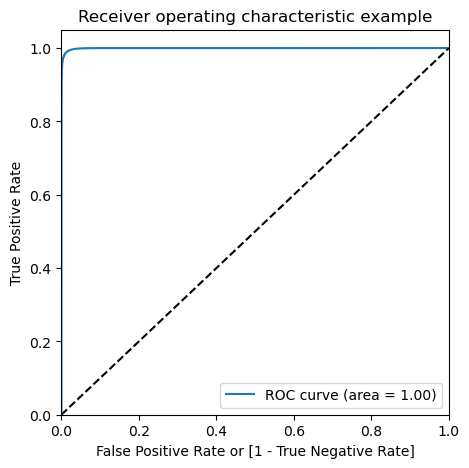

In [65]:
## Prediction on the train set
y_train_pred = rf_bal_adasyn_model_bestcv.predict(X_train_adasyn)

# displaying F1 Score and classification report
display_scores(y_train_adasyn, y_train_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_pred_proba = rf_bal_adasyn_model_bestcv.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

### **Model Evaluation**

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


F1 Score: 45.49%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    368549
           1       0.30      0.96      0.45      1930

    accuracy                           0.99    370479
   macro avg       0.65      0.97      0.72    370479
weighted avg       1.00      0.99      0.99    370479

Confusion Matrix 
 [[364178   4371]
 [    75   1855]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


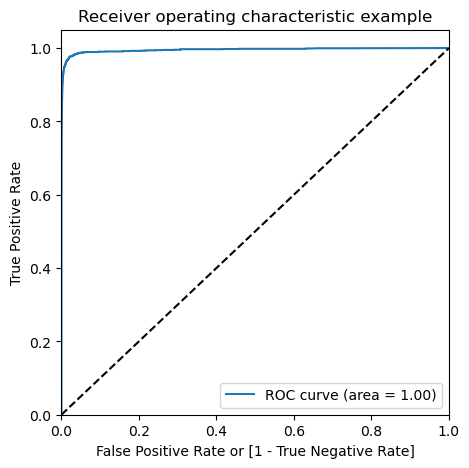

In [66]:
## Evaluating the model on the test set
y_test_pred = rf_bal_adasyn_model_bestcv.predict(X_test)

# displaying F1 Score and classification report
display_scores(y_test, y_test_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_pred_proba = rf_bal_adasyn_model_bestcv.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 100%
- Precesion = 99%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 96%
- Precesion = 48%
- F1 score = 64%

## **4: XGBoost**

In [48]:
## Gridsearch for hyperparam tuning
xgb_adasyn_bal_model_cv = GridSearchCV(estimator=xgb,
                                      param_grid=xgboost_params,
                                      scoring='recall',
                                      cv=k_folds,
                                      n_jobs=-1,
                                      verbose=1,
                                      return_train_score=True)

#model training
xgb_adasyn_bal_model_cv.fit(X_train_adasyn, y_train_adasyn)

# Printing the optimal score and hyperparameters
print("Best recall score : ", xgb_adasyn_bal_model_cv.best_score_)
print('Best hyperparameters: ',xgb_adasyn_bal_model_cv.best_estimator_)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best recall score :  0.9976924193498775
Best hyperparameters:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [49]:
#accessing best parameters to pass in xgboost classifier

print('best parameters:',list(xgb_adasyn_bal_model_cv.best_params_.items()))

learning_rate = list(xgb_adasyn_bal_model_cv.best_params_.items())[0][1]
max_depth =list(xgb_adasyn_bal_model_cv.best_params_.items())[1][1]
subsample =list(xgb_adasyn_bal_model_cv.best_params_.items())[2][1]


print(learning_rate)
print(max_depth)
print(subsample)

best parameters: [('learning_rate', 0.1), ('max_depth', 6), ('subsample', 0.3)]
0.1
6
0.3


In [50]:
# Model with optimal hyperparameter
xgb_adasyn_bal_model_bestcv = XGBClassifier(learning_rate = learning_rate,
                                            max_depth=max_depth,
                                            subsample=subsample,
                                            n_jobs=-1,
                                            objective='binary:logistic',
                                            tree_method='gpu_hist',
                                            n_estimators=200,random_state=0)


xgb_adasyn_bal_model_bestcv.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

### **Model Prediction**

F1 Score: 99.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1474194
           1       0.99      1.00      1.00   1473838

    accuracy                           1.00   2948032
   macro avg       1.00      1.00      1.00   2948032
weighted avg       1.00      1.00      1.00   2948032

Confusion Matrix 
 [[1466471    7723]
 [   3568 1470270]]


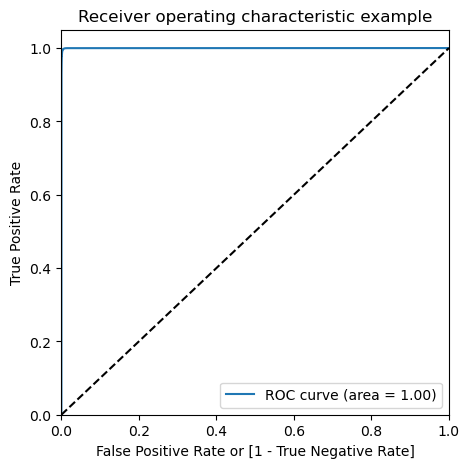

In [51]:
# Predicting on the train set
y_train_adasyn_pred = xgb_adasyn_bal_model_bestcv.predict(X_train_adasyn)

# Printing the scores
display_scores(y_train_adasyn, y_train_adasyn_pred)

#confusion matrix
confusion_matrix_train = confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_train)

# Predicted probability
y_train_adasyn_pred_proba = xgb_adasyn_bal_model_bestcv.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_adasyn_pred_proba)

### **Model Evaluation**

F1 Score: 63.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    368549
           1       0.48      0.96      0.64      1930

    accuracy                           0.99    370479
   macro avg       0.74      0.98      0.82    370479
weighted avg       1.00      0.99      1.00    370479

Confusion Matrix 
 [[366524   2025]
 [    76   1854]]


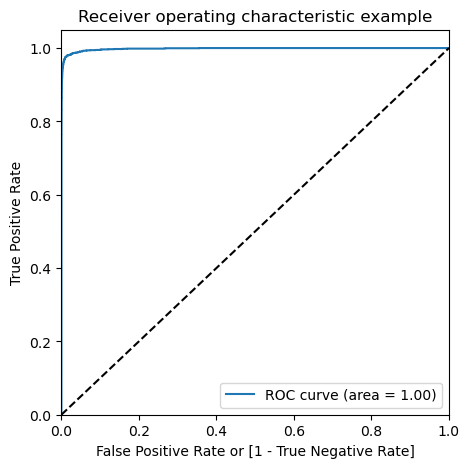

In [52]:
# model evaluation on test set
y_test_adasyn_pred = xgb_adasyn_bal_model_bestcv.predict(X_test)

#displaying scores
display_scores(y_test, y_test_adasyn_pred)

#confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_adasyn_pred)
print("Confusion Matrix \n",confusion_matrix_test)

# Predicted probability
y_test_adasyn_pred_proba = xgb_adasyn_bal_model_bestcv.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_adasyn_pred_proba)

### **Model Summary**
#### **Train set**
- ROC AUC score = 100%
- Recall = 1000%
- Precesion = 99%
- F1 score = 100%

#### **Test set**
- ROC AUC score = 100%
- Recall = 96%
- Precesion = 48%
- F1 score = 64%

## Evaluation Metrics of all Models

In [1]:
evalution_metric_dict = {'Sampling Method': {0: 'Imbalanced Dataset', 1: 'Imbalanced Dataset', 2: 'Imbalanced Dataset', 3: 'Imbalanced Dataset', 4: 'Imbalanced Dataset', 5: 'Imbalanced Dataset', 6: 'Imbalanced Dataset', 7: 'Imbalanced Dataset', 8: 'Random Oversampling', 9: 'Random Oversampling', 10: 'Random Oversampling', 11: 'Random Oversampling', 12: 'Random Oversampling', 13: 'Random Oversampling', 14: 'Random Oversampling', 15: 'Random Oversampling', 16: 'SMOTE', 17: 'SMOTE', 18: 'SMOTE', 19: 'SMOTE', 20: 'SMOTE', 21: 'SMOTE', 22: 'SMOTE', 23: 'SMOTE', 24: 'ADASYN', 25: 'ADASYN', 26: 'ADASYN', 27: 'ADASYN', 28: 'ADASYN', 29: 'ADASYN', 30: 'ADASYN', 31: 'ADASYN'}, 'Model': {0: 'Logistic Regression', 1: 'Logistic Regression', 2: 'Decesion Tree', 3: 'Decesion Tree', 4: 'Random Forest', 5: 'Random Forest', 6: 'XGBoost', 7: 'XGBoost', 8: 'Logistic Regression', 9: 'Logistic Regression', 10: 'Decesion Tree', 11: 'Decesion Tree', 12: 'Random Forest', 13: 'Random Forest', 14: 'XGBoost', 15: 'XGBoost', 16: 'Logistic Regression', 17: 'Logistic Regression', 18: 'Decesion Tree', 19: 'Decesion Tree', 20: 'Random Forest', 21: 'Random Forest', 22: 'XGBoost', 23: 'XGBoost', 24: 'Logistic Regression', 25: 'Logistic Regression', 26: 'Decesion Tree', 27: 'Decesion Tree', 28: 'Random Forest', 29: 'Random Forest', 30: 'XGBoost', 31: 'XGBoost'}, 'Dataset': {0: 'Train', 1: 'Test', 2: 'Train', 3: 'Test', 4: 'Train', 5: 'Test', 6: 'Train', 7: 'Test', 8: 'Train', 9: 'Test', 10: 'Train', 11: 'Test', 12: 'Train', 13: 'Test', 14: 'Train', 15: 'Test', 16: 'Train', 17: 'Test', 18: 'Train', 19: 'Test', 20: 'Train', 21: 'Test', 22: 'Train', 23: 'Test', 24: 'Train', 25: 'Test', 26: 'Train', 27: 'Test', 28: 'Train', 29: 'Test', 30: 'Train', 31: 'Test'}, 'ROC AUC': {0: 0.95, 1: 0.96, 2: 1.0, 3: 0.98, 4: 1.0, 5: 0.99, 6: 1.0, 7: 1.0, 8: 0.96, 9: 0.97, 10: 1.0, 11: 0.99, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 0.99, 17: 0.94, 18: 1.0, 19: 0.99, 20: 1.0, 21: 0.99, 22: 1.0, 23: 1.0, 24: 0.97, 25: 0.93, 26: 1.0, 27: 0.99, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0}, 'Recall': {0: 0.47, 1: 0.49, 2: 0.75, 3: 0.75, 4: 0.66, 5: 0.65, 6: 0.9, 7: 0.86, 8: 0.89, 9: 0.9, 10: 1.0, 11: 0.97, 12: 1.0, 13: 0.95, 14: 1.0, 15: 0.98, 16: 0.94, 17: 0.77, 18: 0.99, 19: 0.96, 20: 0.98, 21: 0.95, 22: 1.0, 23: 0.96, 24: 0.92, 25: 0.78, 26: 0.98, 27: 0.97, 28: 0.99, 29: 0.96, 30: 1.0, 31: 0.96}, 'Precesion': {0: 0.91, 1: 0.92, 2: 0.93, 3: 0.93, 4: 0.98, 5: 0.98, 6: 0.97, 7: 0.95, 8: 0.9, 9: 0.05, 10: 0.99, 11: 0.35, 12: 0.99, 13: 0.48, 14: 1.0, 15: 0.53, 16: 0.94, 17: 0.06, 18: 0.99, 19: 0.33, 20: 0.99, 21: 0.33, 22: 1.0, 23: 0.57, 24: 0.91, 25: 0.04, 26: 0.98, 27: 0.21, 28: 0.99, 29: 0.3, 30: 0.99, 31: 0.48}, 'F1 Score': {0: 0.62, 1: 0.64, 2: 0.83, 3: 0.83, 4: 0.79, 5: 0.78, 6: 0.93, 7: 0.91, 8: 0.89, 9: 0.09, 10: 1.0, 11: 0.52, 12: 1.0, 13: 0.64, 14: 1.0, 15: 0.69, 16: 0.94, 17: 0.12, 18: 0.99, 19: 0.49, 20: 0.99, 21: 0.49, 22: 1.0, 23: 0.72, 24: 0.92, 25: 0.08, 26: 0.98, 27: 0.34, 28: 0.99, 29: 0.45, 30: 1.0, 31: 0.64}}

In [4]:
evalution_metric_df = pd.DataFrame(evalution_metric_dict)
evalution_metric_df[evalution_metric_df['Dataset']=='Test'].sort_values(by='Recall',ascending=False)

Sampling Method                Model Dataset  ROC AUC  Recall  \
15  Random Oversampling              XGBoost    Test     1.00    0.98   
11  Random Oversampling        Decesion Tree    Test     0.99    0.97   
27               ADASYN        Decesion Tree    Test     0.99    0.97   
19                SMOTE        Decesion Tree    Test     0.99    0.96   
23                SMOTE              XGBoost    Test     1.00    0.96   
29               ADASYN        Random Forest    Test     1.00    0.96   
31               ADASYN              XGBoost    Test     1.00    0.96   
13  Random Oversampling        Random Forest    Test     1.00    0.95   
21                SMOTE        Random Forest    Test     0.99    0.95   
9   Random Oversampling  Logistic Regression    Test     0.97    0.90   
7    Imbalanced Dataset              XGBoost    Test     1.00    0.86   
25               ADASYN  Logistic Regression    Test     0.93    0.78   
17                SMOTE  Logistic Regression    Test     0.94    0.77   
3    Imbalanced Dataset        Decesion Tree    Test     0.98    0.75   
5    Imbalanced Dataset        Random Forest    Test     0.99    0.65   
1    Imbalanced Dataset  Logistic Regression    Test     0.96    0.49   

    Precesion  F1 Score  
15       0.53      0.69  
11       0.35      0.52  
27       0.21      0.34  
19       0.33      0.49  
23       0.57      0.72  
29       0.30      0.45  
31       0.48      0.64  
13       0.48      0.64  
21       0.33      0.49  
9        0.05      0.09  
7        0.95      0.91  
25       0.04      0.08  
17       0.06      0.12  
3        0.93      0.83  
5        0.98      0.78  
1        0.92      0.64

### **From the above Compilation of evaluation metrics from all models, it is clear that XGBoost (Random Oversampling) model performs well**

**Since our buisness objective is to identifying fraud transactions accurately than the no_fraud transactions. Hence, we have selected recall metric so High recall means model will correctly identify almost all transactions who are likely to fraud.**


    
### Model Consideration:-
    
- **Based on the `ROC AUC` and `RECALL` and `Precesion` of different models, we will use hyper tuned XGBoost model using Random oversampling method as our final model for performing test on unseen data.**


- **Model Summary of Xgboost(Random Oversampling)**

    - ROC AUC score = 100%
    - Recall = 98%
    - Precesion = 53%
    - F1 score = 69%

### Features with its importance from XGBoost (Random Oversampling) model

In [77]:
imp_df = pd.DataFrame({
    "Varname": X_train_rndm.columns,
    "Imp": xgb_rndm_bal_model_bestcv.feature_importances_
})

imp_ftrs= imp_df.sort_values(by="Imp", ascending=False)
imp_ftrs.head(10)

Varname     Imp
5            hist_trans_avg_amt_24h 0.32497
0                transaction_amount 0.10145
7   spending_category_gas_transport 0.09801
9     spending_category_grocery_pos 0.04545
11           spending_category_home 0.03824
6     spending_category_food_dining 0.03532
17   spending_category_shopping_pos 0.03218
39              time_category_Night 0.03013
8     spending_category_grocery_net 0.02901
16   spending_category_shopping_net 0.02809

## **Cost benefit analysis**
**The Cost Benefit Analysis is done on the complete dataset to analyse the business impact and present them to relevant business stakeholders.**

### **Part 1: Analysis before model deployed**
#### **Let us take a look at what we need to do in order to perform the cost-benefit analysis step by step:**
**Part I: Analyse the dataset and find the following figures:**

1. Average number of transactions per month
2. Average number of fraudulent transactions per month
3. Average amount per fraudulent transaction

#### 1: Average number of transactions per month

In [78]:
# Total number of Transactions can be found by checking the shape of the dataset
# Avg Transactions per month can be found by dividing it by 24 (since the dataset is of 24 months from Jan 2019 to Dec 2020)

Avg_Trans_Pm = df3.shape[0]//24

print("1. Average Number of Transactions per month are :",Avg_Trans_Pm)

1. Average Number of Transactions per month are : 77183


#### 2: Average number of fraudulent transactions per month

In [79]:
# Average Fraudulent Transactions

Avg_Fraud_Trans_Pm = df3[df3['is_fraud']==1].shape[0]//24

print("2. Average Number of Fraudulent Transactions per month are :",Avg_Fraud_Trans_Pm)

2. Average Number of Fraudulent Transactions per month are : 402


#### 3: Average amount per fraudulent transaction

In [81]:
# Average amount Per Fraudulent Transaction

Avg_Fraud_Amt = df3[df3['is_fraud']==1].transaction_amount.sum()//df3[df3['is_fraud']==1].shape[0]
print("3. Average Amount Per Fraudulent Transactions is : ",Avg_Fraud_Amt)

3. Average Amount Per Fraudulent Transactions is :  530.0


<div class="alert alert-block alert-success">
    
####                           **Summary of Cost Benefit Analysis(Part 1)**

In [82]:
cost_benifit_dict1 = {
    'Average number of transactions per month':[Avg_Trans_Pm],
    'Average number of fraudulent transactions per month':[Avg_Fraud_Trans_Pm],
    'Average amount per fraudulent transaction':[Avg_Fraud_Amt]
}

cost_benifit1_df = pd.DataFrame(cost_benifit_dict1)

index_ = ['Value']
cost_benifit1_df.index = index_
cost_benifit1_df = cost_benifit1_df.transpose()
cost_benifit1_df = cost_benifit1_df.reset_index().rename(columns={'index':'metric'})
pd.set_option('max_colwidth', 400)
cost_benifit1_df

metric       Value
0             Average number of transactions per month 77183.00000
1  Average number of fraudulent transactions per month   402.00000
2            Average amount per fraudulent transaction   530.00000

### **Part 2: Analysis after model deployed**

**Compare the cost incurred per month by the bank before and after the model deployment:**


* Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month.

* Cost incurred per month after the model is built and deployed:


Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

  * Total cost of providing customer support per month for  fraudulent transactions detected by the model = 1.5 * TF.

Let FN be the average number of transactions per month that are fraudulent but not detected by the model

  * Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
  * Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN
  * Final savings = Cost incurred before - Cost incurred after.


In [83]:
# Confusion matrix of XGBoost (Random)
y_train_rndm_pred = xgb_rndm_bal_model_bestcv.predict(X_train_rndm)
confusion_matrix_train = confusion_matrix(y_train_rndm, y_train_rndm_pred)
print("Confusion Matrix \n",confusion_matrix_train)

TP = confusion_matrix_train[1,1] # true positive
TN = confusion_matrix_train[0,0] # true negative
FN = confusion_matrix_train[1,0] # false negative
FP = confusion_matrix_train[0,1] # false positive

print('True Positives for train data:', TP)
print('True Negatives for train data:', TN)
print('False Negatives for train data:', FN)
print('False Positives for train data:', FP)

Confusion Matrix 
 [[1467376    6818]
 [    358 1473836]]
True Positives for train data: 1473836
True Negatives for train data: 1467376
False Negatives for train data: 358
False Positives for train data: 6818


In [84]:
###### Average number of transactions per month detected as fraudulent by the model(TF)
TF = (TP + FP)/24
print('Average number of transactions per month detected by the model: ',TF)

Average number of transactions per month detected by the model:  61693.916666666664


In [85]:
###### Total cost of providing customer support per month for fraudulent transactions detected by the model
TC = TF * 1.5
print('Total Cost of providing customer support per month for fraud transactions detected by model: ',TC)

Total Cost of providing customer support per month for fraud transactions detected by model:  92540.875


In [86]:
###### Average number of transactions per month that are fraudulent but not detected by the model (FN)
AFN = FN/24
print('Average number of transactions per month that are fraudulent but not detected by the model: ',AFN)

Average number of transactions per month that are fraudulent but not detected by the model:  14.916666666666666


In [87]:
##### Cost incurred due to fraudulent transactions left undetected by the model
Unditected_cost = AFN * Avg_Fraud_Amt
print('Cost incurred due to fraudulent transactions left undetected by the model: ',Unditected_cost)

Cost incurred due to fraudulent transactions left undetected by the model:  7905.833333333333


In [88]:
##### Cost incurred per month before the model was deployed
Cost_incurred_before = Avg_Fraud_Amt*Avg_Fraud_Trans_Pm

print('Cost incurred per month before the model was deployed: ',Cost_incurred_before)

Cost incurred per month before the model was deployed:  213060.0


In [89]:
##### Cost incurred per month after the model is built and deployed
Cost_incurred_after = TC + Unditected_cost
print('Cost incurred per month after the model is built and deployed: ',Cost_incurred_after)

Cost incurred per month after the model is built and deployed:  100446.70833333333


In [90]:
##### **Final savings**
final_saving = Cost_incurred_before - Cost_incurred_after
print('Final Savings: ',final_saving)

Final Savings:  112613.29166666667


<div class="alert alert-block alert-success">
    
####                           **Summary of Cost Benefit Analysis(Part 2)**

In [91]:
cost_benifit_dict2 = {
    'Cost incurred per month before the model was deployed':[Cost_incurred_before],
    'Average number of transactions per month detected as fraudulent by the model':[TF],
    'cost of providing customer executive support per fraudulent transaction detected by the model':['$1.5'],
    'Total Cost of providing customer support per month for fraudulent transactions detected by model':[TC],
    'Average number of transactions per month that are fraudulent but not detected by the model':[AFN],
    'Cost incurred due to fraudulent transactions left undetected by the model':[Unditected_cost],
    'Cost incurred per month after the model is built and deployed':[Cost_incurred_after],
    'Final Savings':[final_saving]
}

cost_benifit2_df = pd.DataFrame(cost_benifit_dict2)

index_ = ['Value']
cost_benifit2_df.index = index_
cost_benifit2_df = cost_benifit2_df.transpose()
cost_benifit2_df = cost_benifit2_df.reset_index().rename(columns={'index':'metric'})
cost_benifit2_df

metric  \
0                                             Cost incurred per month before the model was deployed   
1                      Average number of transactions per month detected as fraudulent by the model   
2     cost of providing customer executive support per fraudulent transaction detected by the model   
3  Total Cost of providing customer support per month for fraudulent transactions detected by model   
4        Average number of transactions per month that are fraudulent but not detected by the model   
5                         Cost incurred due to fraudulent transactions left undetected by the model   
6                                     Cost incurred per month after the model is built and deployed   
7                                                                                     Final Savings   

         Value  
0 213060.00000  
1  61693.91667  
2         $1.5  
3  92540.87500  
4     14.91667  
5   7905.83333  
6 100446.70833  
7 112613.29167